### _1. Introduction_
----------------------

The aim of this project is to predict the outcome of 9 English Premier League (EPL) football matches  that will take place on the weekend of the 12th January 2019. The goal is to be able to "Beat the Bookie" who usually are able to predict the match outcomes 53% of the times. 

The first section of this notebook consists of Data Import where the provided (training, testing) as well as additional data (2018-2019 season traning data, previous years standings) will be imported and converted into dataframes. After that, Data transformation and exploration is carried out where through different visualisation methods, the important features will be selected and the redudant data will be discarded. Additional features will also be constructed from the available featues.

Furthermore, in the Methodology Section, the training and testing dataframes will be constructed by adding the important features and analysing the correlation heat map of this data. In the model training and validation section, a description of the different models and methods used to train and evaluate our classifier is given. Finally, the results of different models are compared and our final predictions for the upcoming matches are given.

By conducting a thorough data exploration and transformation, we were able to identify the most important features needed to predict the full time result of a fixture. We also created our own features, using both provided and external data. By then building the training and testing dataframes, testing different models and using cross validation with GridSearch, we were able to successfully "Beat the Bookie" and get an accuracy of 55.75% on the testing data. 

### _2. Data Import_
----------------------
In this section, the provided training data file (2005-2017 season data) is imported along with additional external data such as the 2018-2019 season information as well as previous EPL teams standings. Now, for libraries imports, we used datetime to create datetime objects that can be used for filtering, numpy for basic mathematical manipulations, Pandas for the overall data import and manipulation through dataframes and Matplotlib for visulisation.

In [4]:
# Import all the necessary libraries
from datetime import datetime as dt
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import training data from csv file
raw_training_data = pd.read_csv("Data/epl-training.csv")

In [6]:
current_season_data = pd.read_csv("Data/epl-2018-2019.csv").drop(columns=["Div"]) # Droping the Division column so that the dataset matches the provided one

Below we can see the format of the provided training data file, which lists all football matches from 2005 along with their associated features. Pandas is used to convert the csv file into a dataframe that can be easily manipulated and visualised.

In [7]:
raw_training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13-Aug-05,Aston Villa,Bolton,2,2,D,2,2,D,M Riley,...,2,6,14,16,7,8,0,2,0,0
1,13-Aug-05,Everton,Man United,0,2,A,0,1,A,G Poll,...,5,5,15,14,8,6,3,1,0,0
2,13-Aug-05,Fulham,Birmingham,0,0,D,0,0,D,R Styles,...,7,4,12,13,6,6,1,2,0,0
3,13-Aug-05,Man City,West Brom,0,0,D,0,0,D,C Foy,...,8,3,13,11,3,6,2,3,0,0
4,13-Aug-05,Middlesbrough,Liverpool,0,0,D,0,0,D,M Halsey,...,2,7,17,11,5,0,2,3,1,0


Below we can see the format of the 2018-2019 season data file. As we can see the format is slightly different from the previous seasons file (Date column format is different) but has all the necessary features (and some additional ones that can be discarded).

In [8]:
current_season_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


We can also visualise the previous EPL standings for some teams (including the ones that are playing on the weekend of the 12th of Jan). The file was created manually since we could not find online datasets.

In [10]:
previous_standings_data = pd.read_csv("Data/epl-standings.csv")
previous_standings_data.set_index(['Team'], inplace=True)
previous_standings_data = previous_standings_data.fillna(18) # fill empty cells

In [11]:
previous_standings_data.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Team,,,,,,,,,,,,,,
Arsenal,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,2.0,6.0,5.0
Aston Villa,10.0,16.0,11.0,6.0,6.0,6.0,9.0,16.0,15.0,15.0,17.0,20.0,18.0,18.0
Birmingham,12.0,18.0,18.0,19.0,18.0,9.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackburn,15.0,6.0,10.0,7.0,15.0,10.0,15.0,19.0,18.0,18.0,18.0,18.0,18.0,18.0
Blackpool,18.0,18.0,18.0,18.0,18.0,18.0,19.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


### _3. Data Transformation and Exploration_
----------------------
This section is all about transforming the data that we have as well building new features while analysing their effect on the full time result. We will propose and analyse 4 different features: Home Advantage, Effect of past n games, Effect of points difference (ELO system) and Past head to head encounters. 

After importing the datasets as dataframes, we need to do some data transformation to convert the datasets to a usable format. 

We start by converting the dates into datetime objects that can be used for filtering by date (essential for season dividing).

In [12]:
# Convert dates into datetime objects for season sorting
raw_training_data['Date'] = pd.to_datetime(raw_training_data.Date)
current_season_data['Date'] = pd.to_datetime(current_season_data.Date)

# Since the current season data Date format is different than the raw training
# dataset, we need to convert the format so that the two formats match
for row in current_season_data.itertuples():
    current_season_data.at[row.Index,'Date'] = dt.strftime(row.Date,
                                                                '%d/%m/%y')

In [13]:
raw_training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2005-08-13,Aston Villa,Bolton,2,2,D,2,2,D,M Riley,...,2,6,14,16,7,8,0,2,0,0
1,2005-08-13,Everton,Man United,0,2,A,0,1,A,G Poll,...,5,5,15,14,8,6,3,1,0,0
2,2005-08-13,Fulham,Birmingham,0,0,D,0,0,D,R Styles,...,7,4,12,13,6,6,1,2,0,0
3,2005-08-13,Man City,West Brom,0,0,D,0,0,D,C Foy,...,8,3,13,11,3,6,2,3,0,0
4,2005-08-13,Middlesbrough,Liverpool,0,0,D,0,0,D,M Halsey,...,2,7,17,11,5,0,2,3,1,0


In [14]:
current_season_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


We can see that the format of the Date column is now the same.

A filter by season function is used to filter data from dataset by season: a season starts in August and finishes in May of the next year (as can be seen from the two tables below).

In [15]:
def filter_by_season(year):
    
    # Finds data that corresponds to desired starting season's year
    current_annual_data = raw_training_data[raw_training_data['Date'].dt.year == year]
    # Filters data between August and May
    current_annual_data = current_annual_data[(current_annual_data['Date'].dt.month >= 8)]
    upcoming_annual_data = raw_training_data[raw_training_data['Date'].dt.year == (year + 1)]
    upcoming_annual_data = upcoming_annual_data[(upcoming_annual_data['Date'].dt.month <= 5)]
    # Concats two obtained filtered datasets
    season_data = pd.concat([current_annual_data, upcoming_annual_data], ignore_index=True)

    return season_data

In [16]:
filter_by_season(2017).head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,M Dean,...,10,3,9,12,9,4,0,1,0,0
1,2017-08-12,Brighton,Man City,0,2,A,0,0,D,M Oliver,...,2,4,6,9,3,10,0,2,0,0
2,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,...,6,5,16,11,8,5,3,3,2,0
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,...,4,6,7,19,12,9,1,3,0,0
4,2017-08-12,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,...,4,1,13,10,6,7,1,1,0,0


In [17]:
filter_by_season(2017).tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,...,6,2,11,10,4,2,0,1,0,0
376,2018-05-13,Southampton,Man City,0,1,A,0,0,D,A Marriner,...,3,2,8,10,1,12,3,1,0,0
377,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,A Taylor,...,11,5,12,9,6,0,1,2,0,0
378,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,...,6,9,9,13,4,4,1,2,0,0
379,2018-05-13,West Ham,Everton,3,1,H,1,0,H,G Scott,...,4,7,10,13,6,6,0,1,0,0


We can now analyse the data strictly related to gameplay for some data observation in order to find the most important features that influence the full time result (what we want to predict) of the matches.

We start by chossing the features strictly related to gameplay such as teams playing, goals and full time result.

In [18]:
# Filters data specifically related to gameplay
gameplay_columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

We then create a dictionary where keys are the seasons years (for season 2017-2018, the key is 2017) and the values are the season's playing statistics dataframe. 

In [19]:
# Creates empty dictionary to store dataframes filtered by season
seasons_data_dictionary = {}

# Add seasons data to dataframe
for i in range(2005,2018):
    seasons_data_dictionary[i] = filter_by_season(i)[gameplay_columns]

# Add 2018-2019 season data to dictionary
seasons_data_dictionary[2018] = current_season_data[gameplay_columns]

# Merging all seasons data for graphing
all_seasons = []
for key in seasons_data_dictionary:
    all_seasons.append(seasons_data_dictionary[key])

playing_statistics = pd.concat(all_seasons)

In [20]:
playing_statistics.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2005-08-13,Aston Villa,Bolton,2,2,D
1,2005-08-13,Everton,Man United,0,2,A
2,2005-08-13,Fulham,Birmingham,0,0,D
3,2005-08-13,Man City,West Brom,0,0,D
4,2005-08-13,Middlesbrough,Liverpool,0,0,D


In [21]:
playing_statistics.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
195,2018-12-29,Watford,Newcastle,1,1,D
196,2018-12-30,Burnley,West Ham,2,0,H
197,2018-12-30,Crystal Palace,Chelsea,0,1,A
198,2018-12-30,Man United,Bournemouth,4,1,H
199,2018-12-30,Southampton,Man City,1,3,A


### 1) Home Advantage Analysis:

In this section, we will analyse how playing at Home affects the outcome of the game.

We start by gathering overall Full Time Results (FTR) statistics of all teams and seasons and concatenate them for graphing.

In [22]:
def get_full_time_result_stats(playing_statistics, year):
    return pd.DataFrame(data = [len(playing_statistics[playing_statistics.FTR == 'H']),
                                len(playing_statistics[playing_statistics.FTR == 'A']),
                                len(playing_statistics[playing_statistics.FTR == 'D'])],
                        index = ['Home Wins', 'Away Wins', 'Draws'],
                        columns =[year]).T

# Seasons statistics for the plot
all_seasons = []
for key in seasons_data_dictionary:
    all_seasons.append(get_full_time_result_stats(seasons_data_dictionary[key], str(key) + "-" + str(key+1)))

result_stats = pd.concat(all_seasons)

# Overall statistics
result_stats_overall = get_full_time_result_stats(playing_statistics, "Overall")

We can now plot full time results (Home win, Away win, Draw) statistics for each season:

Text(0.5, 0, 'Season')

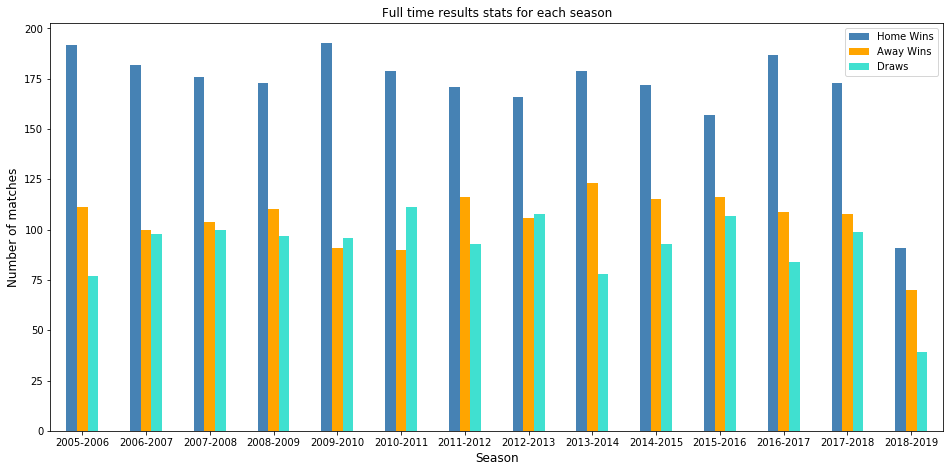

In [23]:
# Plotting season full time results
ax = result_stats.plot(kind='bar', color = ['steelblue','orange','turquoise'], figsize = [16,7.5],
                       title='Full time results stats for each season')
plt.xticks(rotation=0)
ax.set_ylabel('Number of matches', size=12)
ax.set_xlabel('Season', size=12)

The graph clearly shows the Home Advantage that teams have, independently of the season or teams playing (The 2018-2019 season has less matches that are played since the season is not finished yet).

Let us also plot these stats for all seasons combined:

Text(0.5, 0, 'Season')

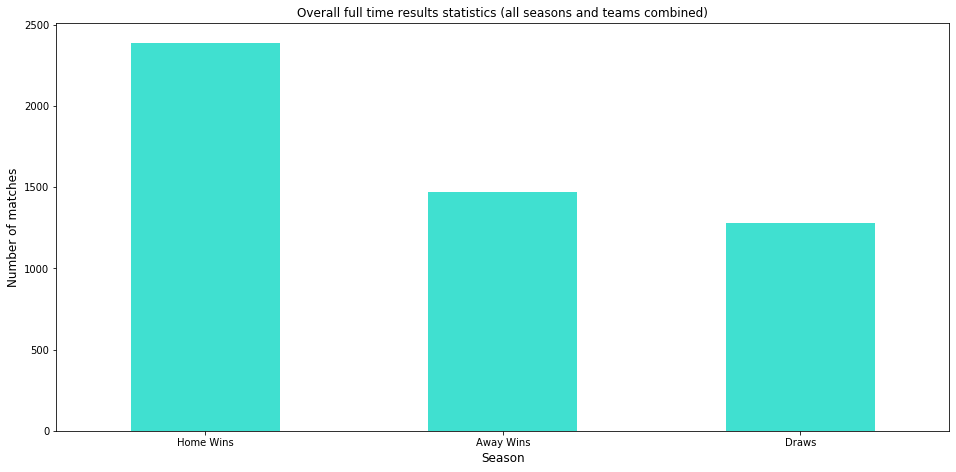

In [24]:
#Aggregating overall full time results
ax1 = result_stats_overall.T.plot(kind='bar', color = ['turquoise'], figsize = [16,7.5],
                       title='Overall full time results statistics (all seasons and teams combined)', legend = False)
plt.xticks(rotation=0)
ax1.set_ylabel('Number of matches', size=12)
ax1.set_xlabel('Season', size=12)

By aggregating the full time results for all seasons and teams, we can draw the same conclusion: there is a clear advantage in playing home where more than 2400 matches were won at Home (all seasons combined from 2005 to 2018), compared to 1500 matches won at Away.

We can also compute the home wins, away wins and draws percentages and plot a line plot.

([<matplotlib.axis.XTick at 0x7f2ac21d7510>,
 <a list of 13 Text xticklabel objects>)

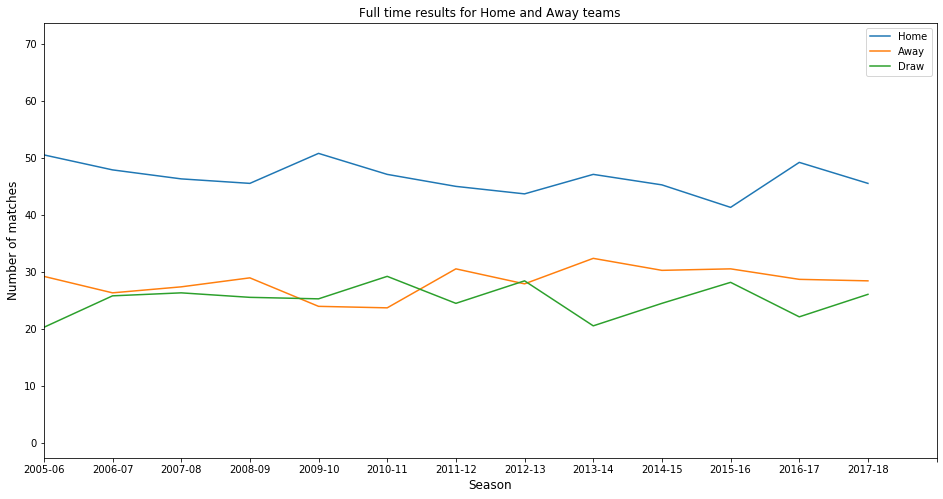

In [25]:
# Remove 2018-2019 season results since season is not over (stats are misleading)
result_stats = result_stats.iloc[:-1, :]
result_prop = result_stats.T

for column in result_prop.columns:
    # There are 380 matches in a year for completed seasons
    result_prop[column] = (result_prop[column] * 100) / 380

# Rename columns for readability
result_prop.rename(index={'Home Wins':'Home', 'Away Wins':'Away', 'Draws':'Draw'}, inplace=True)

# Plots a line plot of the win percentages for different seasons
ax = result_prop.T.plot(figsize = [16,8], title = 'Full time results for Home and Away teams')
ax.margins(y=.75)
ax.set_xlabel('Season', size =12)
ax.set_ylabel('Number of matches', size =12)
plt.xticks( np.arange(14), ('2005-06', '2006-07', '2007-08','2008-09',
 '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
 '2016-17', '2017-18'))

Text(0.5, 1.0, 'Overall average FTR percentage')

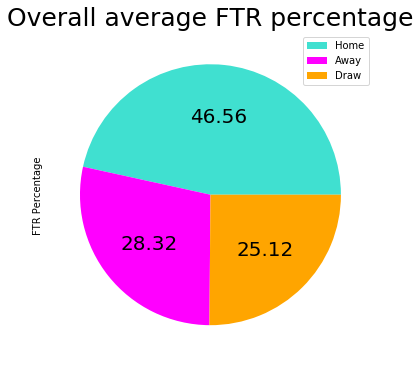

In [26]:
# Calculating the overall average FTR percentage for Home and Away sides
result_avg_prop = pd.DataFrame((result_prop['2005-2006'] +
result_prop['2006-2007'] + result_prop['2007-2008'] +
result_prop['2008-2009'] + result_prop['2009-2010'] +
result_prop['2010-2011'] + result_prop['2011-2012'] +
result_prop['2012-2013'] + result_prop['2013-2014'] +
result_prop['2014-2015'] + result_prop['2015-2016'] +
result_prop['2016-2017'] + result_prop['2017-2018']) / 13,
columns = ['FTR Percentage'])

# Plots average overall average FTR percentage as a pie chart.
ax = result_avg_prop.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='FTR Percentage', fontsize =20, labels = None,
                          legend = True, colors = ['turquoise','magenta', 'orange'])
ax.set_title('Overall average FTR percentage', size=25)


In conclusion, we can clearly see that the Home Advantage is an  essential feature in predicting the winning chance of a team. According to the above graph, 46.56% of wins (all EPL teams and seasons combined) are when played at home.  Therefore, there is a clear relation between the match location and the full time result: this feature is important and will be used for the prediction model.

### 2) Effect of past n games Analysis: 

In this section, we will analyse the effect of the past n games on full time result. This can be an important factor in influencing the mood of the players and thus how they will play: a winning streak will potentialy push them to play better, etc... 

The first step is to gather matches results for each team in a specific season and storing it in a dictionary where the keys represent the team names and the values represent a list of match results filtered by match week. This is useful for constant-time data access that will allow for faster processing and ease of use.

In [27]:
# Full time matches results
def get_match_results(season_data):
    # Creates dictionary with team names as keys and list containing match
    # results as values
    teams = {}
    for i in season_data.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    for i in range(len(season_data)):
        # Home team stats
        if season_data.iloc[i].FTR == 'H':
            teams[season_data.iloc[i].HomeTeam].append('W')
            teams[season_data.iloc[i].AwayTeam].append('L')
        # Away team stats
        elif season_data.iloc[i].FTR == 'A':
            teams[season_data.iloc[i].AwayTeam].append('W')
            teams[season_data.iloc[i].HomeTeam].append('L')
        # Draw case
        else:
            teams[season_data.iloc[i].AwayTeam].append('D')
            teams[season_data.iloc[i].HomeTeam].append('D')

    # Since 2018-2019 season is not over, we need to take care of the number of matches played
    return pd.DataFrame(data=teams, index = [i for i in range(1,int((len(season_data)/10)) + 1)]).T

In [28]:
# List to store all match results for each season
match_results_list = []
for key in seasons_data_dictionary:
    match_results_list.append(get_match_results(seasons_data_dictionary[key]))

In [29]:
match_results_list

[              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
 Arsenal        W  L  W  L  W  D  W  L  W  D  ...  W  W  W  L  D  W  D  W  W  W
 Aston Villa    D  L  D  W  L  D  L  L  W  L  ...  L  L  D  L  D  W  L  L  L  W
 Birmingham     D  L  L  W  L  D  D  L  L  L  ...  L  L  D  W  D  L  W  D  D  L
 Blackburn      L  W  D  L  D  L  W  W  L  W  ...  W  W  W  D  D  L  L  W  W  W
 Bolton         D  L  W  W  D  W  W  L  L  W  ...  L  L  L  L  L  D  W  L  D  W
 Charlton       W  W  W  W  L  W  L  D  W  L  ...  W  L  W  D  D  L  W  L  L  L
 Chelsea        W  W  W  W  W  W  W  W  W  D  ...  W  L  W  D  W  W  W  W  L  L
 Everton        L  W  L  L  L  L  L  L  D  W  ...  W  W  L  D  D  L  L  D  W  D
 Fulham         D  L  L  W  D  L  L  L  D  W  ...  L  L  W  D  L  W  W  W  L  W
 Liverpool      D  W  D  D  D  L  W  L  W  W  ...  L  W  W  W  W  W  W  W  W  W
 Man City       D  W  W  W  D  L  L  W  W  L  ...  L  L  L  L  L  L  W  L  L  L
 Man United     W  W  W  D  D  L  W  W  

As can be seen above, we get a list that stores a concatenation of all the dictionaries for every season where the keys represent the team names and the values represents a list of match results for the 38 match weeks.

The get match location function now creates a dictionary that stores the team names as keys and a list containing the match location (home or away).

In [30]:
def get_match_location(season_data):
    # Creates dictionary with team names as keys and list containing match
    # location as value
    teams = {}
    for i in season_data.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # Team playing home or away
    for i in range(len(season_data)):
        teams[season_data.iloc[i].HomeTeam].append('H')
        teams[season_data.iloc[i].AwayTeam].append('A')

    # Since 2018-2019 season is not over, we need to take care of the number of matches played
    return pd.DataFrame(data=teams, index = [i for i in range(1,int((len(season_data)/10)) + 1)]).T

In [31]:
# List to store all match locations for each season
match_locations_list = []
for key in seasons_data_dictionary:
    match_locations_list.append(get_match_location(seasons_data_dictionary[key]))

In [32]:
match_locations_list

[              1  2  3  4  5  6  7  8  9  10  ... 29 30 31 32 33 34 35 36 37 38
 Arsenal        H  A  H  A  H  A  H  A  H  A  ...  H  H  H  A  A  H  H  A  A  H
 Aston Villa    H  A  A  H  A  H  A  H  A  H  ...  A  A  H  A  H  H  A  H  A  H
 Birmingham     A  H  H  A  H  A  H  A  H  A  ...  H  A  H  H  A  A  H  A  H  A
 Blackburn      A  H  H  A  A  H  A  H  A  H  ...  H  H  A  H  A  H  A  A  H  H
 Bolton         A  H  H  A  H  A  H  A  A  H  ...  A  H  A  A  H  A  H  A  H  H
 Charlton       A  H  A  A  H  A  H  H  A  H  ...  H  A  H  A  H  A  H  A  H  A
 Chelsea        A  H  H  A  H  A  H  A  H  A  ...  H  A  H  A  H  A  H  H  A  A
 Everton        H  A  A  H  A  H  A  A  H  A  ...  H  H  A  H  A  H  A  H  A  H
 Fulham         H  A  A  H  A  H  A  H  A  H  ...  A  A  H  A  H  H  H  A  A  H
 Liverpool      A  H  A  H  A  H  H  A  H  A  ...  A  H  A  H  A  H  A  A  H  A
 Man City       H  A  A  H  A  H  A  H  H  A  ...  A  H  A  H  A  A  A  H  H  A
 Man United     A  H  A  H  A  H  A  A  

As can be seen above, we get a list that stores a concatenation of all the dictionaries for every season where the keys represent the team names and the values represents a list of match location for the 38 match weeks. "H" refers to "Home" and "A" refers to "Away".

The next step is to use the two lists obtained before (results and locations) in order to compute match statistics for the previous n matches. These statitics will take the form of a dictionary where the key is a string of letters will represent the past n matches games full time result: For example, "WLD" represents a win followed by a loss and then by a draw. The value is the location of all the combination of matches that resulted in this outcome.

This is done with the get_past_n_results function. In this function, we start by iterating through the match results list (had to take care of the special case for the 2018-2019 season where less matches are played) and retrieve information about the past n matches (n is chosen as an input).

In [33]:
# Combines match results and locations statistics for n previous matches
def get_past_n_results(match_results_list, match_locations_list, size):
    # Creates empty dictionary
    past_form_dict = {}
    # Iterates through match results list
    for i in range(len(match_results_list)):
        df = match_results_list[i].T
        m_df = match_locations_list[i].T

        # For 2018-2019 season, only 20 matches are played yet
        if i == len(match_locations_list) - 1:
            num_matches = 20
        # Completed seasons have 38 matches
        else:
            num_matches = 38

        # Finds info about n previous matches
        for team in df.columns:
            i = 0
            while i != (num_matches - size):
                n = 0
                comb = ''
                while n < size:
                    comb = comb + df[team].iloc[i+n]
                    n+=1
                result = df[team].iloc[i+size]
                side = m_df[team].iloc[i+size]

                # Appends result to dictionary
                if comb in past_form_dict:
                    past_form_dict[comb].append([result,side])
                else:
                    past_form_dict[comb] = []
                    past_form_dict[comb].append([result,side])
                i = i+1

    return past_form_dict

In [34]:
# Get results of past 3 and 5 games
past_form_3_matches = get_past_n_results(match_results_list, match_locations_list, 3)
past_form_5_matches = get_past_n_results(match_results_list, match_locations_list, 5)

In [35]:
past_form_3_matches

{'WLW': [['L', 'A'],
  ['D', 'A'],
  ['D', 'A'],
  ['L', 'A'],
  ['D', 'A'],
  ['L', 'A'],
  ['D', 'A'],
  ['W', 'A'],
  ['W', 'H'],
  ['D', 'H'],
  ['W', 'H'],
  ['L', 'H'],
  ['D', 'A'],
  ['D', 'A'],
  ['W', 'A'],
  ['W', 'A'],
  ['D', 'A'],
  ['W', 'A'],
  ['L', 'A'],
  ['D', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['W', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['W', 'A'],
  ['D', 'A'],
  ['D', 'H'],
  ['W', 'A'],
  ['W', 'A'],
  ['W', 'A'],
  ['W', 'H'],
  ['W', 'A'],
  ['D', 'A'],
  ['L', 'H'],
  ['W', 'A'],
  ['L', 'A'],
  ['W', 'H'],
  ['L', 'A'],
  ['W', 'A'],
  ['W', 'H'],
  ['W', 'H'],
  ['W', 'A'],
  ['D', 'A'],
  ['W', 'H'],
  ['D', 'H'],
  ['W', 'H'],
  ['W', 'A'],
  ['D', 'H'],
  ['W', 'H'],
  ['L', 'A'],
  ['L', 'A'],
  ['D', 'A'],
  ['L', 'A'],
  ['W', 'H'],
  ['L', 'H'],
  ['D', 'A'],
  ['D', 'A'],
  ['L', 'A'],
  ['L', 'A'],
  ['D', 'H'],
  ['L', 'H'],
  ['W', 'H'],
  ['W', 'H'],
  ['D', 'A'],
  ['D', 'A'],
  ['W', 'H'],
  ['W', 'H'],

We can now collect past games full time results for home and away teams through the `get_form_stats function`. This function counts the number of wins, losses and draws for home and away teams and stores this info in a dictionary. Then, a dataframe is created from this dictionary and numbers are converted to probability. The different columns will include the probability of winning, losing or drawing given playing home or away, the overall probability of winning, losing or drawing as well as the total number of matches played with the same previous full time results combinations.

In [36]:
# Get past games full time results (FTR) for home and away teams
def get_form_stats(past_form_n_matches):
    # Create empty dictionary
    past_form_n_matches_results = {}
    # Iterates through past n match results dictionary obtained before
    for key in past_form_n_matches.keys():
        total = len(past_form_n_matches[key])
        # Creates variables to store full time results
        home_win = 0
        home_loss = 0
        away_win = 0
        away_loss = 0
        home_draw = 0
        away_draw = 0

        for result, loc in past_form_n_matches[key]:
            # Home team
            if loc == 'H':
                if result == 'W': # win
                    home_win += 1
                elif result == 'L': # loss
                    
                    home_loss += 1
                else:               # draw
                    home_draw += 1
            # Away team
            else:
                if result == 'W': # win
                    away_win += 1
                elif result == 'L': # loss
                    away_loss += 1
                else:               # draw
                    away_draw += 1

        # Add collected info to dictionary
        past_form_n_matches_results[key] = [home_win, home_loss, home_draw,
                                            away_win, away_loss, away_draw,
                                            home_win+away_win,
                                            home_loss+away_loss,
                                            home_draw+away_draw, total]
    # Create dataframe
    past_form_prob = pd.DataFrame(past_form_n_matches_results).T

    # Change column names to correct ones
    past_form_prob = pd.DataFrame(past_form_n_matches_results).T
    past_form_prob.rename(columns = {0:'HomeWin', 1:'HomeLoss', 2:'HomeDraw', 3:'AwayWin', 4:'AwayLoss', 5:'AwayDraw',
                                     6:'TotalWins', 7:'TotalLosses', 8:'TotalDraws', 9:'TotalMatches' }, inplace=True)

    # Convert numbers to probability
    for col in ['HomeWin', 'HomeLoss', 'HomeDraw', 'AwayWin', 'AwayLoss', 'AwayDraw', 'TotalWins', 'TotalLosses', 'TotalDraws']:
        past_form_prob[col] = past_form_prob[col] / past_form_prob['TotalMatches']

    # Change column names for probability adding
    past_form_prob.rename(columns = {'HomeWin':'P(W/H)', 'HomeLoss': 'P(L/H)', 'HomeDraw': 'P(D/H)', 'AwayWin': 'P(W/A)',
                                     'AwayLoss': 'P(L/A)','AwayDraw': 'P(D/A)','TotalWins': 'P(W)', 'TotalLosses': 'P(L)',
                                     'TotalDraws': 'P(D)'}, inplace=True)
    return past_form_prob

In [37]:
# Get results probabilities of past 3 and 5 games
past_form_3_matches_probability = get_form_stats(past_form_3_matches)
past_form_5_matches_probability = get_form_stats(past_form_5_matches)

In [38]:
past_form_3_matches_probability.head()

,P(W/H),P(L/H),P(D/H),P(W/A),P(L/A),P(D/A),P(W),P(L),P(D),TotalMatches
WLW,0.200000,0.068293,0.087805,0.170732,0.285366,0.187805,0.370732,0.353659,0.275610,410
LWL,0.259341,0.200000,0.178022,0.052747,0.200000,0.109890,0.312088,0.400000,0.287912,455
LWD,0.253049,0.137195,0.134146,0.115854,0.253049,0.106707,0.368902,0.390244,0.240854,328
WDW,0.254144,0.077348,0.085635,0.212707,0.209945,0.160221,0.466851,0.287293,0.245856,362
DWL,0.269625,0.194539,0.163823,0.051195,0.208191,0.112628,0.320819,0.402730,0.276451,293


This table shows different full-time results (home or away wins and draws) as well overall probability of winning, losing or drawing depending on the outcome of the past 3 different matches. We can also print the same table depending on the outcome of the past 5 matches but the data is less accurate to draw conclusions since we have less matches that are played with the exact same previous matches outcomes combinations. In other words, by analysing the past 5 matches, we get 120 possible previous match combinations which implies that less matches with the same exact combination can be played and analysed.

In [39]:
past_form_5_matches_probability.head()

,P(W/H),P(L/H),P(D/H),P(W/A),P(L/A),P(D/A),P(W),P(L),P(D),TotalMatches
WLWLW,0.166667,0.055556,0.037037,0.111111,0.462963,0.166667,0.277778,0.518519,0.203704,54
LWLWD,0.266667,0.200000,0.166667,0.100000,0.166667,0.100000,0.366667,0.366667,0.266667,30
WLWDW,0.196429,0.071429,0.071429,0.267857,0.250000,0.142857,0.464286,0.321429,0.214286,56
LWDWL,0.162162,0.243243,0.243243,0.000000,0.270270,0.081081,0.162162,0.513514,0.324324,37
WDWLW,0.151515,0.090909,0.000000,0.272727,0.121212,0.363636,0.424242,0.212121,0.363636,33


Now, we can sort the dataframe containing the outcome of the previous 3 matches by the highest probability of winning in order to analyse how the past 3 games results affect the current match. 

In [40]:
past_form_3_matches_probability.sort_values(by=['P(W)'], ascending=False).head()

,P(W/H),P(L/H),P(D/H),P(W/A),P(L/A),P(D/A),P(W),P(L),P(D),TotalMatches
WWW,0.296245,0.086231,0.079277,0.240612,0.158554,0.139082,0.536857,0.244784,0.218359,719
DWW,0.248555,0.086705,0.089595,0.248555,0.196532,0.130058,0.497110,0.283237,0.219653,346
WDW,0.254144,0.077348,0.085635,0.212707,0.209945,0.160221,0.466851,0.287293,0.245856,362
WWD,0.311239,0.115274,0.149856,0.132565,0.175793,0.115274,0.443804,0.291066,0.265130,347
DDD,0.281690,0.119718,0.119718,0.154930,0.218310,0.105634,0.436620,0.338028,0.225352,142


We can clearly see that the previous matches outcome affects the outcome of the next match to be played. For example, a streak of 3 consecutive wins (WWW) yields a 53.7% chance of winning the next match as can be seen from the first row (sorted in descending order) P(W) column. This probability was found from the analysis of 719 matches with the WWW streak which represents a large enough sample to draw a conclusion.

In [41]:
past_form_3_matches_probability.sort_values(by=['P(L)'], ascending=False).head()

,P(W/H),P(L/H),P(D/H),P(W/A),P(L/A),P(D/A),P(W),P(L),P(D),TotalMatches
DLL,0.230964,0.197970,0.098985,0.111675,0.269036,0.091371,0.342640,0.467005,0.190355,394
LLL,0.188312,0.199675,0.159091,0.081169,0.264610,0.107143,0.269481,0.464286,0.266234,616
LDL,0.217054,0.204134,0.124031,0.093023,0.255814,0.105943,0.310078,0.459948,0.229974,387
DLD,0.180556,0.208333,0.129630,0.120370,0.240741,0.120370,0.300926,0.449074,0.250000,216
LLD,0.218837,0.157895,0.102493,0.113573,0.288089,0.119114,0.332410,0.445983,0.221607,361


We can also see the same pattern with the highest probability of losing (P(L)) of 46.7% that happened with the DLL streak (Draw-Loss-Loss). This is ironic since it came above the LLL streak (3 consecutive losses). However, this can be explained by the smaller number of total matches (394 vs 616). 

In conclusion, previous matches full time results clearly affect the outcome of the next fixture. This feature can be implemented for training.

### 3) Analysing how difference in points relates to match result:

In this section, we will analyse how the difference in points (from the points system) influences the outcome of the match. 

The first step is to create the points system: A win gives 3 points, a draw 1 point and a loss no points.

In [42]:
def get_match_point(result):
    # Assigning points to match full time result
    if result == 'W':
        return 3 # win is 3 points
    elif result == 'D':
        return 1 # draw is 1 point
    else:
        return 0 # loss is 0 points

We can now apply the `get_match_point` function for all teams in all seasons through `the get_overall_points` function:

In [43]:
def get_overall_points(matches):
    # Gets overall points for matches full time results
    matches_points = matches.applymap(get_match_point)
    # Iterates through number of matches in season (2018-2019 is different)
    for i in range(2, len(matches.columns) + 1):
        # Adds points
        matches_points[i] = matches_points[i] + matches_points[i-1]

    matches_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matches_points

We can finally store all cumulative points in a list:

In [44]:
# List to store all cumulative points
cumulative_points_list = []
for match_result in match_results_list:
    cumulative_points_list.append(get_overall_points(match_result))

In [45]:
cumulative_points_list[12].sort_values(by=[38], ascending = False).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Man City,0,3,4,7,10,13,16,19,22,25,...,78,81,84,84,87,90,93,94,97,100
Man United,0,3,6,9,10,13,16,19,20,20,...,62,65,68,71,71,74,77,77,78,81
Tottenham,0,3,3,4,7,8,11,14,17,20,...,58,61,64,67,67,68,71,71,74,77
Liverpool,0,1,4,7,7,8,11,12,13,13,...,60,60,63,66,67,70,71,72,72,75
Chelsea,0,0,3,6,9,10,13,13,13,16,...,53,56,56,57,60,63,66,69,70,70


The table above illustrates a sample of the points accumulated every match week (week 0 to week 38) for the 2017-2018 season sorted by descending order. This point system is interesting to analyse since by taking a look at the points accumulated at the end of every season, we can have an idea of the best performing teams. 

In order to be able to predict which team is going to win a certain match depending on the teams respective points, we need to be able to compute the difference in points between the two teams:

In the `get_diff` function, "ht" stands for "home team" and "at" stands for "away team".

In [46]:
# Gets the points difference between any two teams in any matchweek
def get_diff(ht, at, week, cuml_pts):
    # home team points
    ht_pts = cuml_pts[week-1].loc[ht]
    # away team points
    at_pts = cuml_pts[week-1].loc[at]
    diff = ht_pts - at_pts

    return diff

We can then store the points difference in a dictionary for quick and efficiency access.

In [47]:
def compute_points_diff(playing_stat, cuml_pts):
    # Crate empty dictionary
    point_diff_overall = {}
    matches = 0
    # Iterating through weeks of season
    for week in range(1, int((len(playing_stat)/10)) + 1):
        point_diff = []
        # Iterating through matches (each team plays again after 10 matches)
        for match in range(matches,matches+10):
            ht = playing_stat.iloc[match].HomeTeam
            at = playing_stat.iloc[match].AwayTeam
            # Finding results
            res = playing_stat.iloc[match].FTR
            # Computing points difference
            diff = get_diff(ht,at,week,cuml_pts)

            if res == 'H':
                point_diff.append([diff, 'HW'])
            elif res == 'A':
                point_diff.append([diff, 'AW'])
            else:
                point_diff.append([diff, 'D'])

        point_diff_overall[week] = point_diff
        matches += 10
    return point_diff_overall

Finally, we can store the different points difference dictionaries for every season in a list. Adding dictionaries recursively was computationally expensive so preferred to do it manually. 

In [48]:
points_diff_list = [compute_points_diff(seasons_data_dictionary[2005], cumulative_points_list[0]),
compute_points_diff(seasons_data_dictionary[2006], cumulative_points_list[1]),
compute_points_diff(seasons_data_dictionary[2007], cumulative_points_list[2]),
compute_points_diff(seasons_data_dictionary[2008], cumulative_points_list[3]),
compute_points_diff(seasons_data_dictionary[2009], cumulative_points_list[4]),
compute_points_diff(seasons_data_dictionary[2010], cumulative_points_list[5]),
compute_points_diff(seasons_data_dictionary[2011], cumulative_points_list[6]),
compute_points_diff(seasons_data_dictionary[2012], cumulative_points_list[7]),
compute_points_diff(seasons_data_dictionary[2013], cumulative_points_list[8]),
compute_points_diff(seasons_data_dictionary[2014], cumulative_points_list[9]),
compute_points_diff(seasons_data_dictionary[2015], cumulative_points_list[10]),
compute_points_diff(seasons_data_dictionary[2016], cumulative_points_list[11]),
compute_points_diff(seasons_data_dictionary[2017], cumulative_points_list[12])]

# Creates a merged dictionary with keys as that of the dictionaries to merge and values as an empty list
def merge_dicts(dicts_to_merge):
    merged_dict = {}
    # Iterating through dictionary
    for key in dicts_to_merge[0].keys():
        merged_dict[key] = []

    for dictionary in dicts_to_merge:
        for key in dictionary.keys():
            merged_dict[key] = merged_dict[key] + dictionary[key]

    return merged_dict

In [49]:
points_diff = merge_dicts(points_diff_list)
points_diff

{1: [[0, 'D'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'D'],
  [0, 'D'],
  [0, 'AW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'AW'],
  [0, 'AW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'D'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'D'],
  [0, 'D'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'D'],
  [0, 'AW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'AW'],
  [0, 'D'],
  [0, 'HW'],
  [0, 'HW'],
  [0, 'HW'],
  [

We can now create a dictionary from this dataframe:

In [50]:
def make_df(points_diff_dict, key):
    df = pd.DataFrame(points_diff_dict[key], columns = ['Diff', 'Result'])
    df.sort_values(by ='Diff',inplace=True)
    df = df.reset_index(drop=True)             # resets index
    return df

and store the point difference for each matchweek in a list:

In [51]:
pd_mw_list = []
for i in range(1,39):
    pd_mw_list.append(make_df(points_diff, i))

In [52]:
pd_mw_list[13].tail()

,Diff,Result
125,17,HW
126,19,D
127,19,HW
128,21,HW
129,22,HW


The sample above repsents the difference in points between two teams playing in the 2017-2018 season as well as the full-time result of the match.

We can finally create a frequency dataframe that itreates through match weeks.

In [53]:
# Creates frequency dataframe
def get_freqtab_pd(pd_mw, classes):
    # empty dictionary
    freq_table = {}
    counter = 0
    range_diff = abs(pd_mw.iloc[0].Diff) + abs(pd_mw.iloc[149].Diff)
    class_size = int(range_diff / classes)

    #iterates through matchweeks
    for i in range(pd_mw.iloc[0].Diff, pd_mw.iloc[149].Diff, class_size):
        ll = i
        ul = i + class_size
        freq_table[str(ll) + ' to ' + str(ul)] = []

        for i in range(150):
            diff = pd_mw.iloc[i].Diff
            res = pd_mw.iloc[i].Result
            if (diff >= ll) & (diff < ul):
                freq_table[str(ll) + ' to ' + str(ul)].append(res)
                counter += 1

    return freq_table, counter

We can now compute the points differences and store everything in a list.

In [54]:
def get_diff(ht, at,week, cuml_pts):
    # Get cummulative points diffrence
    ht_pts = cuml_pts[week-1].loc[ht]
    at_pts = cuml_pts[week-1].loc[at]
    diff = ht_pts - at_pts
    return diff

def points_diff(playing_stat, cuml_pts):
    # Creates empty dictionary
    point_diff_overall = {}
    matches = 0
    # Iterating through weeks of season
    for week in range(1, int((len(playing_stat)/10)) + 1):
        point_diff = {}
        for match in range(matches,matches+10):
            ht = playing_stat.iloc[match].HomeTeam # home team names
            at = playing_stat.iloc[match].AwayTeam # away team names
            res = playing_stat.iloc[match].FTR # full time result
            diff = get_diff(ht,at,week,cuml_pts)
            if res == 'H': # home team wins
                if diff not in point_diff:
                    point_diff[diff] = ['HW']
                else:
                    point_diff[diff].append('HW')
            elif res == 'A': # away team wins
                if diff not in point_diff:
                    point_diff[diff] = ['AW']
                else:
                    point_diff[diff].append('AW')
            else: # draw
                if diff not in point_diff:
                    point_diff[diff] = ['D']
                else:
                    point_diff[diff].append('D')
        point_diff_overall[week] = point_diff
        matches += 10
    return point_diff_overall

# List to store points differences (doing it recursively was computationally
# expensive so preferred to do it manually)

points_diff_list = [points_diff(seasons_data_dictionary[2005], cumulative_points_list[0]),
points_diff(seasons_data_dictionary[2006], cumulative_points_list[1]),
points_diff(seasons_data_dictionary[2007], cumulative_points_list[2]),
points_diff(seasons_data_dictionary[2008], cumulative_points_list[3]),
points_diff(seasons_data_dictionary[2009], cumulative_points_list[4]),
points_diff(seasons_data_dictionary[2010], cumulative_points_list[5]),
points_diff(seasons_data_dictionary[2011], cumulative_points_list[6]),
points_diff(seasons_data_dictionary[2012], cumulative_points_list[7]),
points_diff(seasons_data_dictionary[2013], cumulative_points_list[8]),
points_diff(seasons_data_dictionary[2014], cumulative_points_list[9]),
points_diff(seasons_data_dictionary[2015], cumulative_points_list[10]),
points_diff(seasons_data_dictionary[2016], cumulative_points_list[11]),
points_diff(seasons_data_dictionary[2017], cumulative_points_list[12])]

and we can create a dictionary for all these matchweeks:

In [55]:
# Creates empty dictionary for all matchweeks
points_diff = {}
for key in range(1,39):
    points_diff[key] = {}

In [56]:
# Merge obtained dictionaries
def merge_dicts(target_dict, dicts_to_merge):
    for points_diff_n in dicts_to_merge:
        num_matches = len(points_diff_n)

        for mw in [i for i in range(1,num_matches + 1)]:
            differences = points_diff_n[mw].keys()
            for diff in differences:
                if diff in points_diff[mw]:
                    points_diff[mw][diff] = points_diff[mw][diff] + points_diff_n[mw][diff]
                else:
                    points_diff[mw][diff] = points_diff_n[mw][diff]
    return target_dict

points_diff = merge_dicts(points_diff, points_diff_list)

In [57]:
points_diff[1]

{0: ['D',
  'AW',
  'D',
  'D',
  'D',
  'AW',
  'AW',
  'HW',
  'HW',
  'AW',
  'D',
  'HW',
  'HW',
  'HW',
  'HW',
  'HW',
  'D',
  'HW',
  'HW',
  'HW',
  'AW',
  'AW',
  'D',
  'HW',
  'AW',
  'HW',
  'AW',
  'HW',
  'HW',
  'D',
  'HW',
  'HW',
  'AW',
  'HW',
  'HW',
  'AW',
  'HW',
  'HW',
  'HW',
  'D',
  'AW',
  'AW',
  'AW',
  'HW',
  'AW',
  'AW',
  'HW',
  'AW',
  'HW',
  'HW',
  'HW',
  'HW',
  'D',
  'HW',
  'D',
  'D',
  'AW',
  'HW',
  'D',
  'HW',
  'AW',
  'D',
  'D',
  'D',
  'AW',
  'D',
  'D',
  'AW',
  'HW',
  'AW',
  'D',
  'HW',
  'HW',
  'AW',
  'D',
  'HW',
  'HW',
  'HW',
  'AW',
  'HW',
  'AW',
  'HW',
  'D',
  'AW',
  'AW',
  'AW',
  'HW',
  'HW',
  'AW',
  'HW',
  'HW',
  'D',
  'AW',
  'AW',
  'AW',
  'D',
  'AW',
  'HW',
  'AW',
  'AW',
  'AW',
  'D',
  'D',
  'HW',
  'HW',
  'AW',
  'AW',
  'D',
  'AW',
  'AW',
  'AW',
  'AW',
  'D',
  'HW',
  'HW',
  'D',
  'D',
  'AW',
  'AW',
  'HW',
  'HW',
  'AW',
  'AW',
  'AW',
  'HW',
  'D',
  'D',
  'HW',
  'H

We can now create a match weeks dictionary that stores the teams points differences for each week.

In [58]:
# Create match weeks dictionary
mw_dist = {}

# Iterating through points_diff dicionary
for mw in points_diff.keys():
    differences = {}
    for diff in points_diff[mw].keys():
        home_wins = 0
        away_wins = 0
        draws = 0
        results = [0,0,0]

        # Adds results to results array (home_wins, away_wins, draws)
        for result in points_diff[mw][diff]:
            matches = len(points_diff[mw][diff])
            if result == 'HW':
                home_wins += 1
            elif result == 'AW':
                away_wins += 1
            else:
                draws += 1

        differences[diff] = [home_wins, away_wins, draws]
    mw_dist[mw] = differences

Finally, we can visualise how the difference in points affects the outcome of the match by plotting a bar chart that shows the frequency of Home Wins, Away Wins and Draws versus the points difference between the two teams (the diffrence is computed between the home team points and away team points so a positive points difference implies that the home team has more points).

/home/saket/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


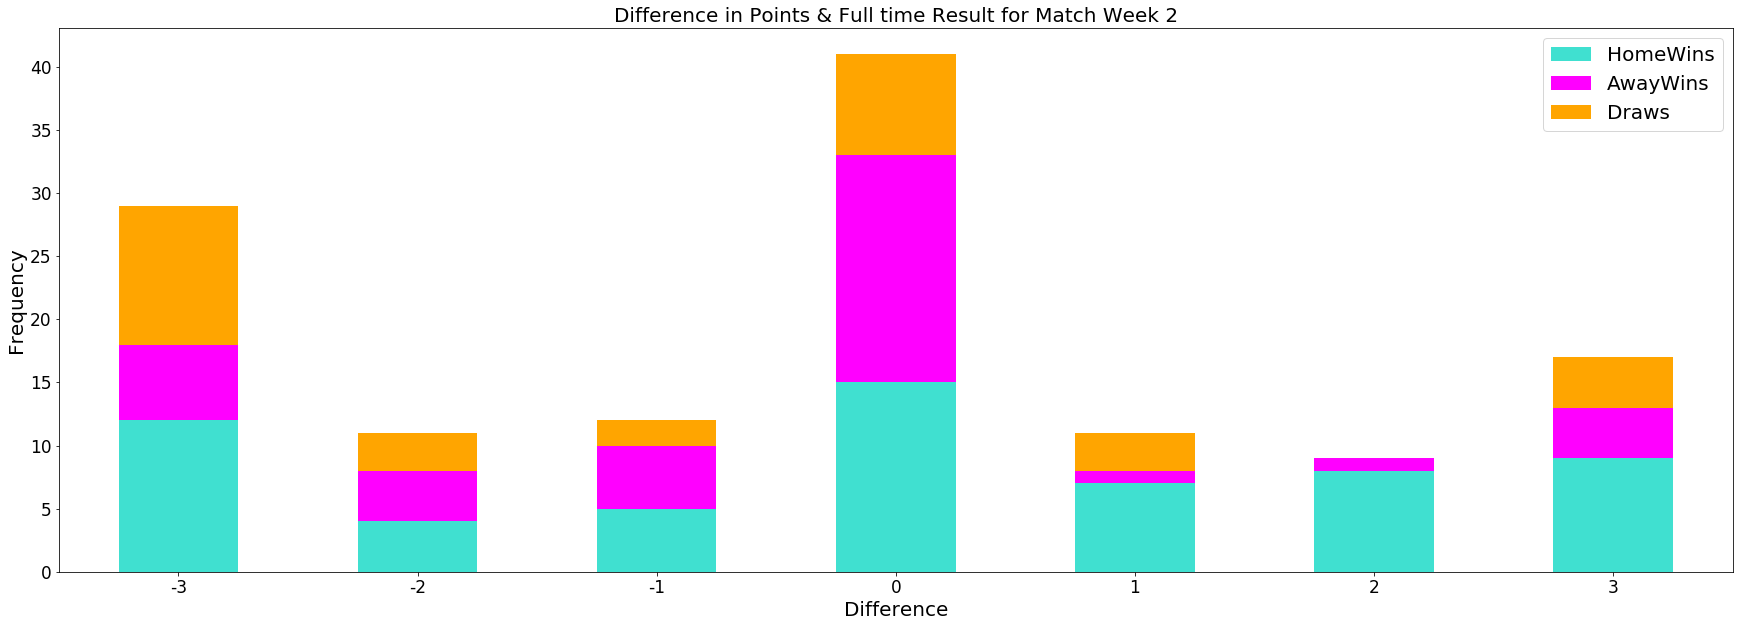

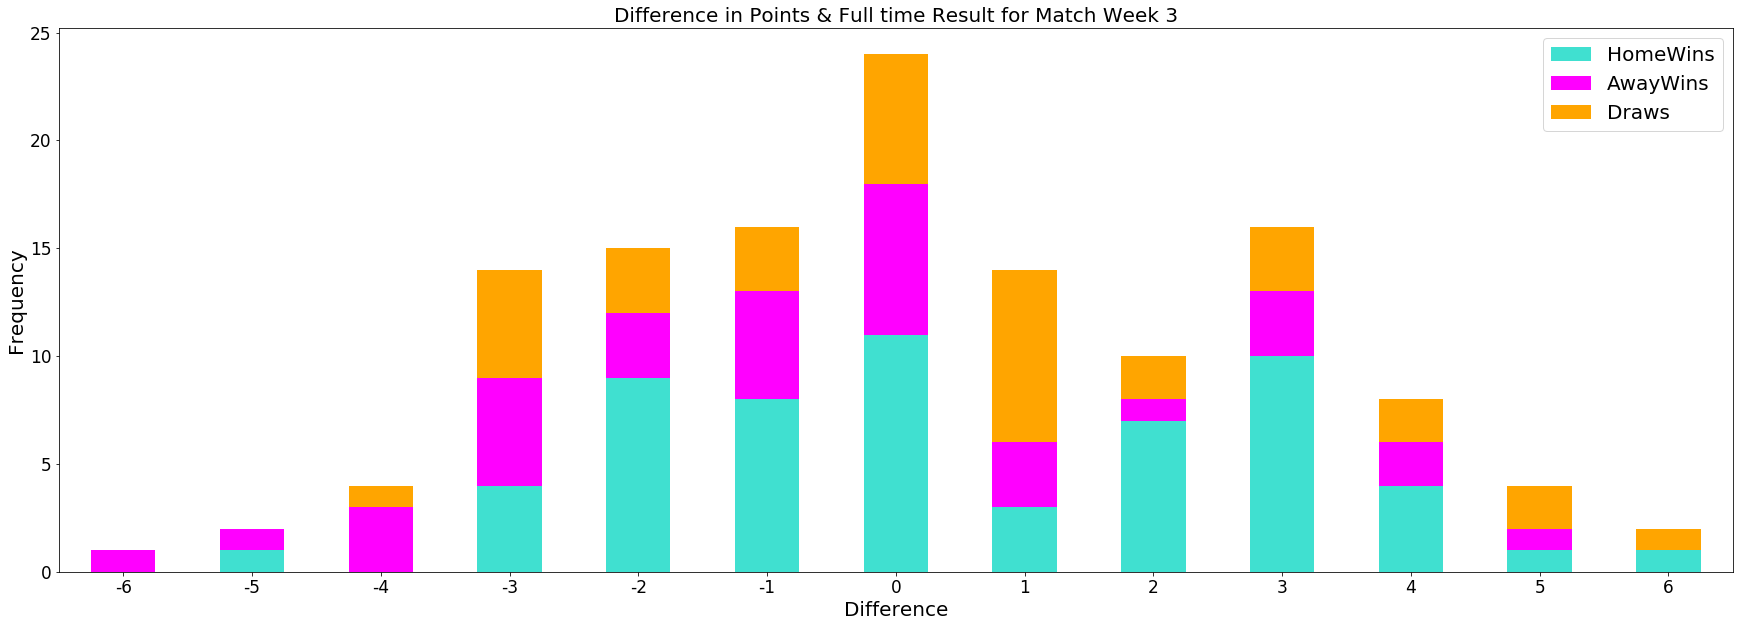

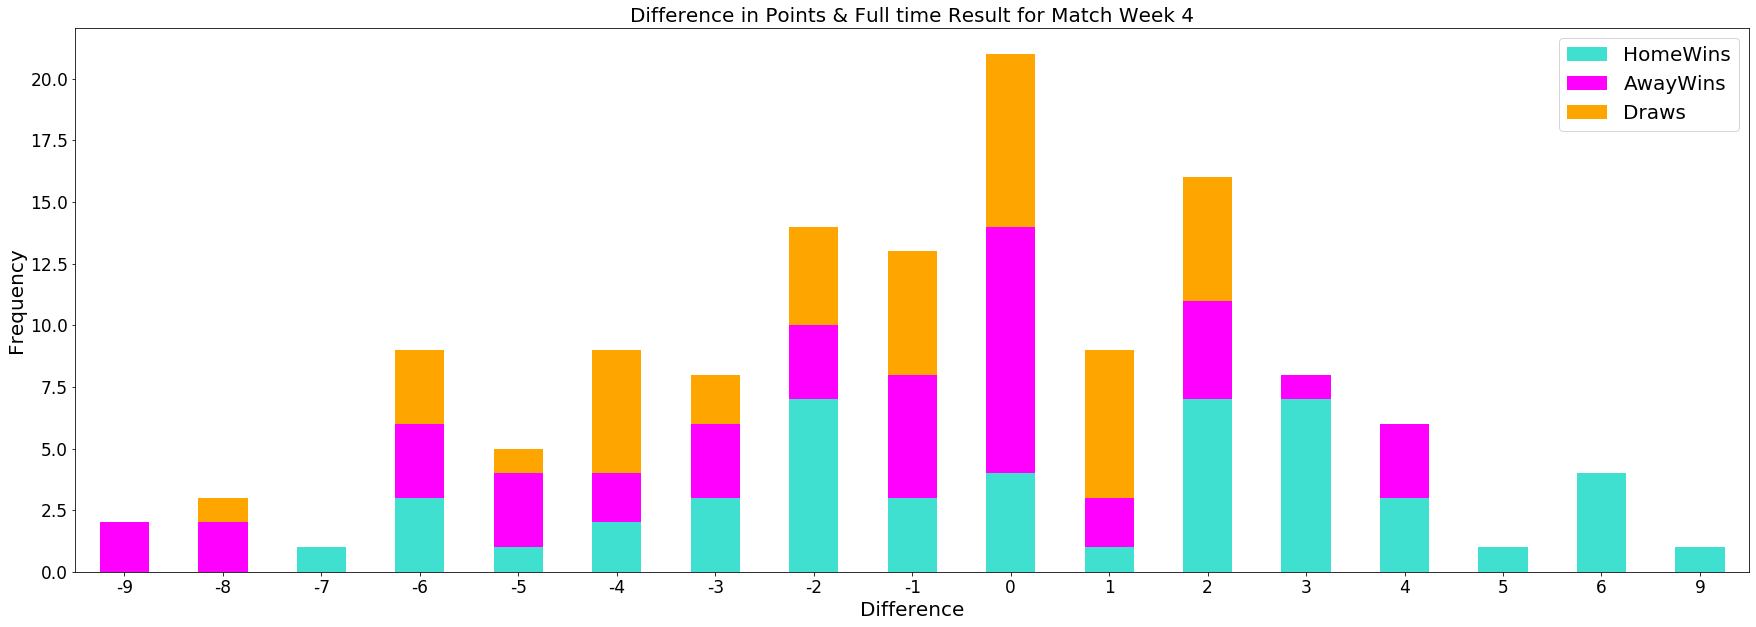

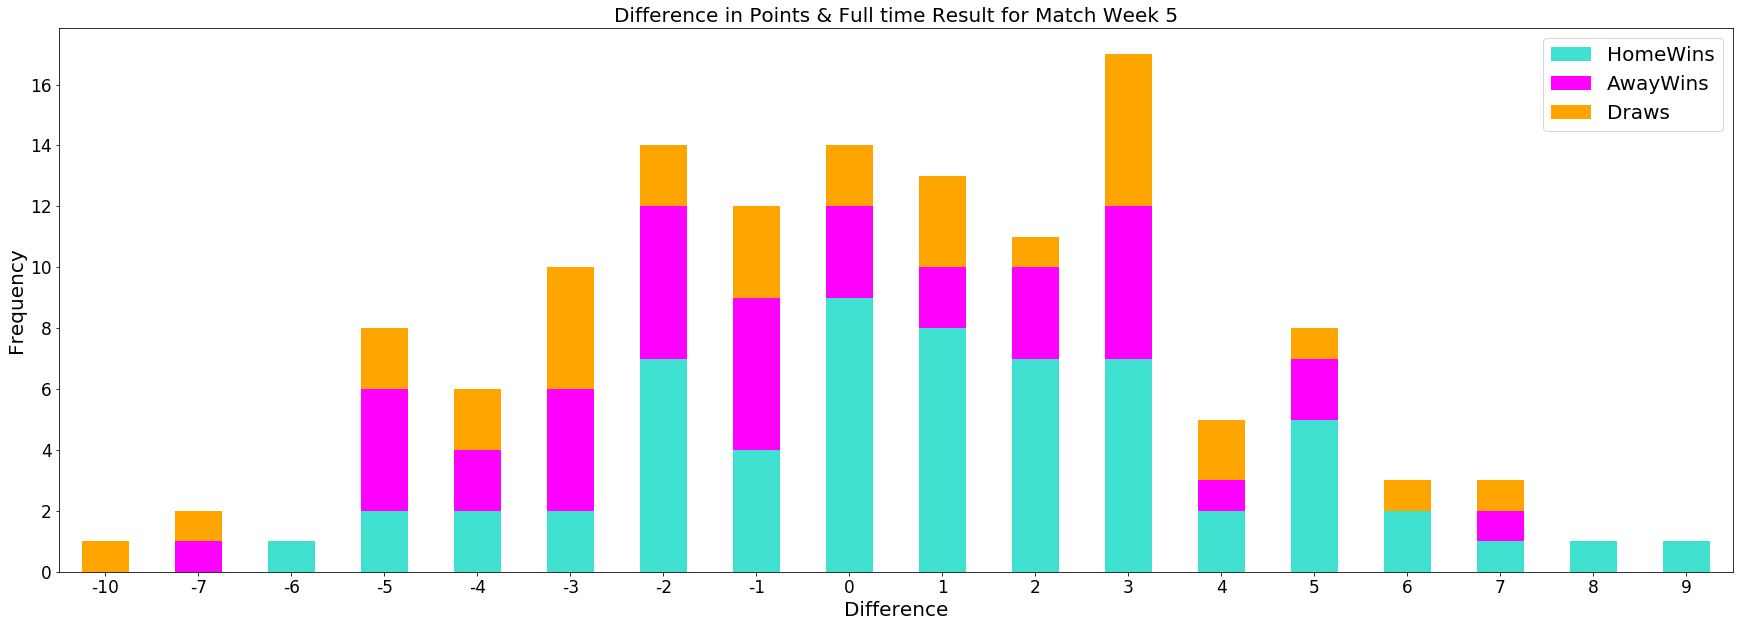

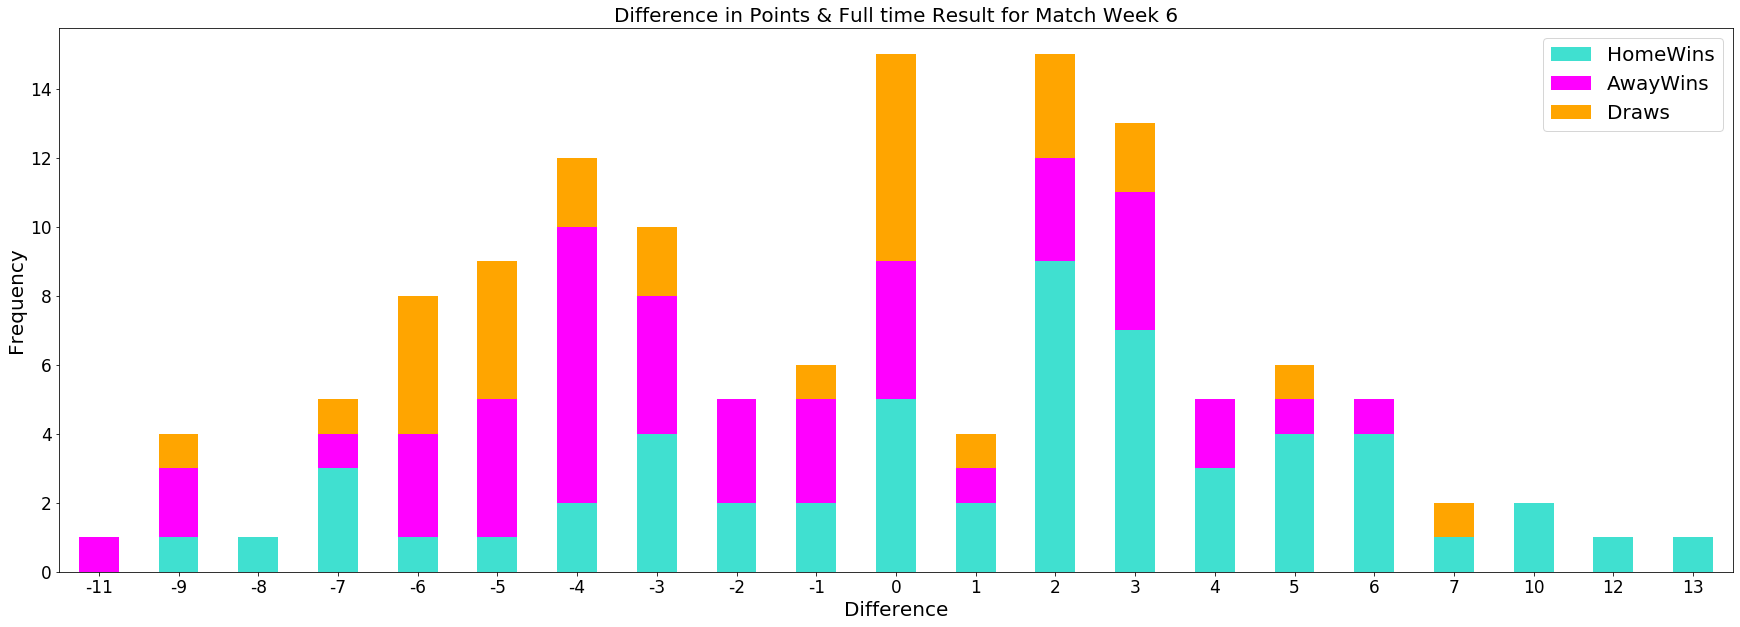

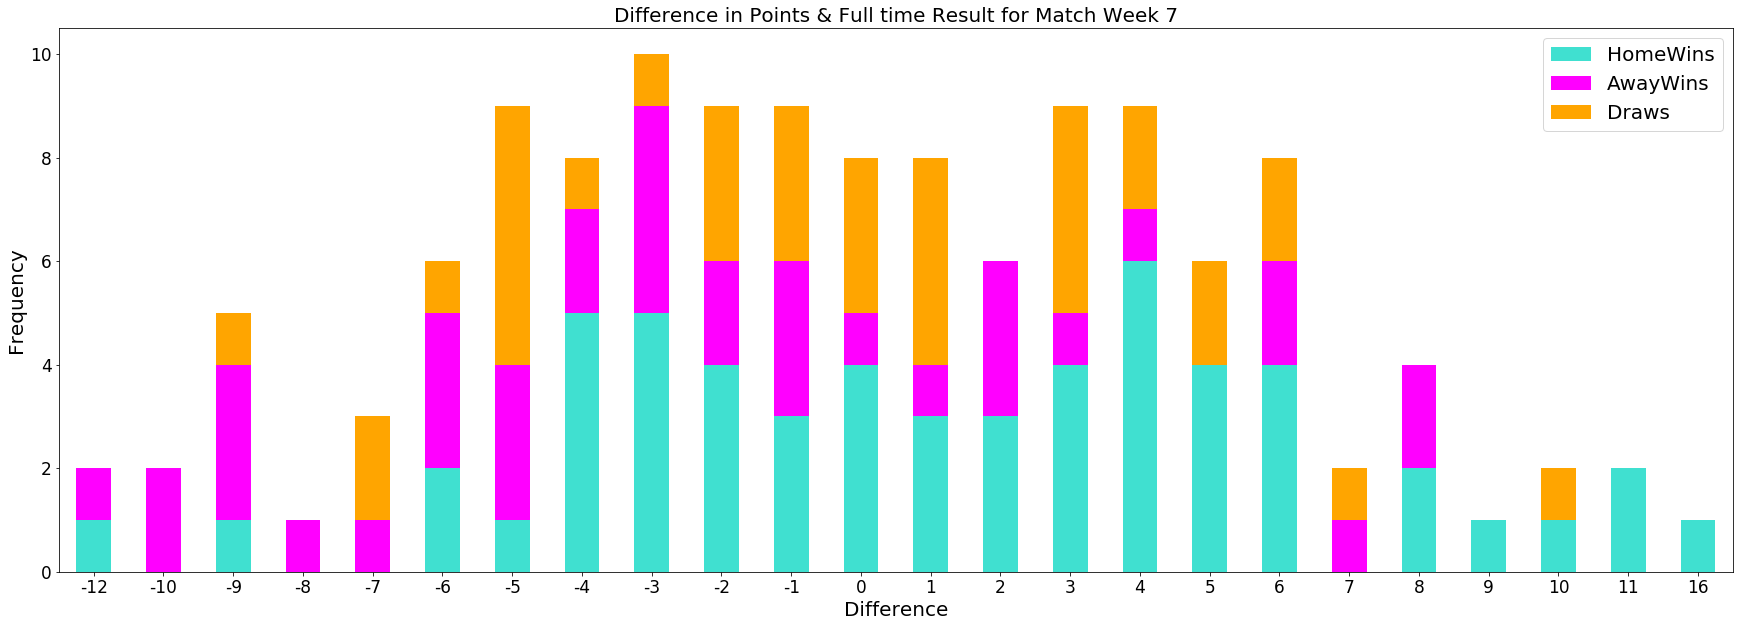

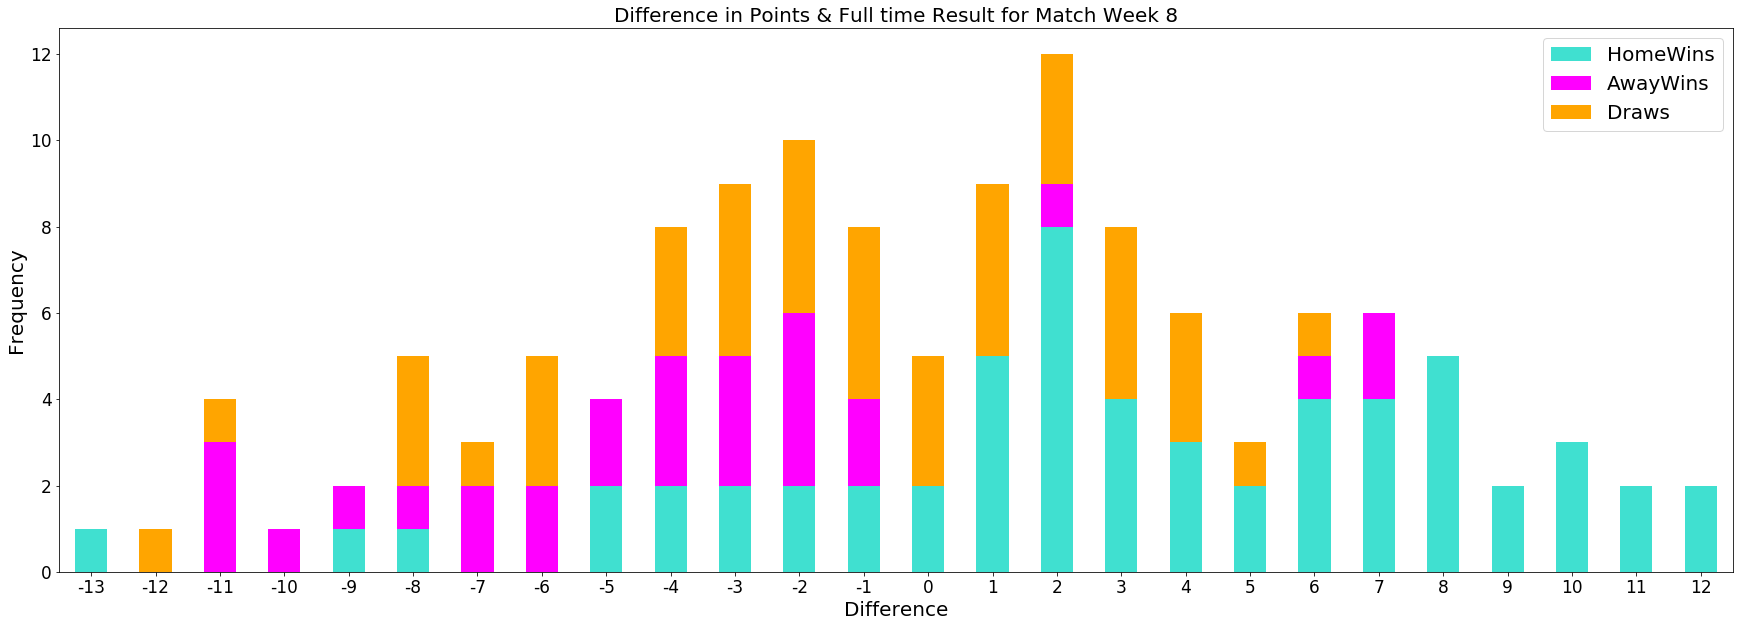

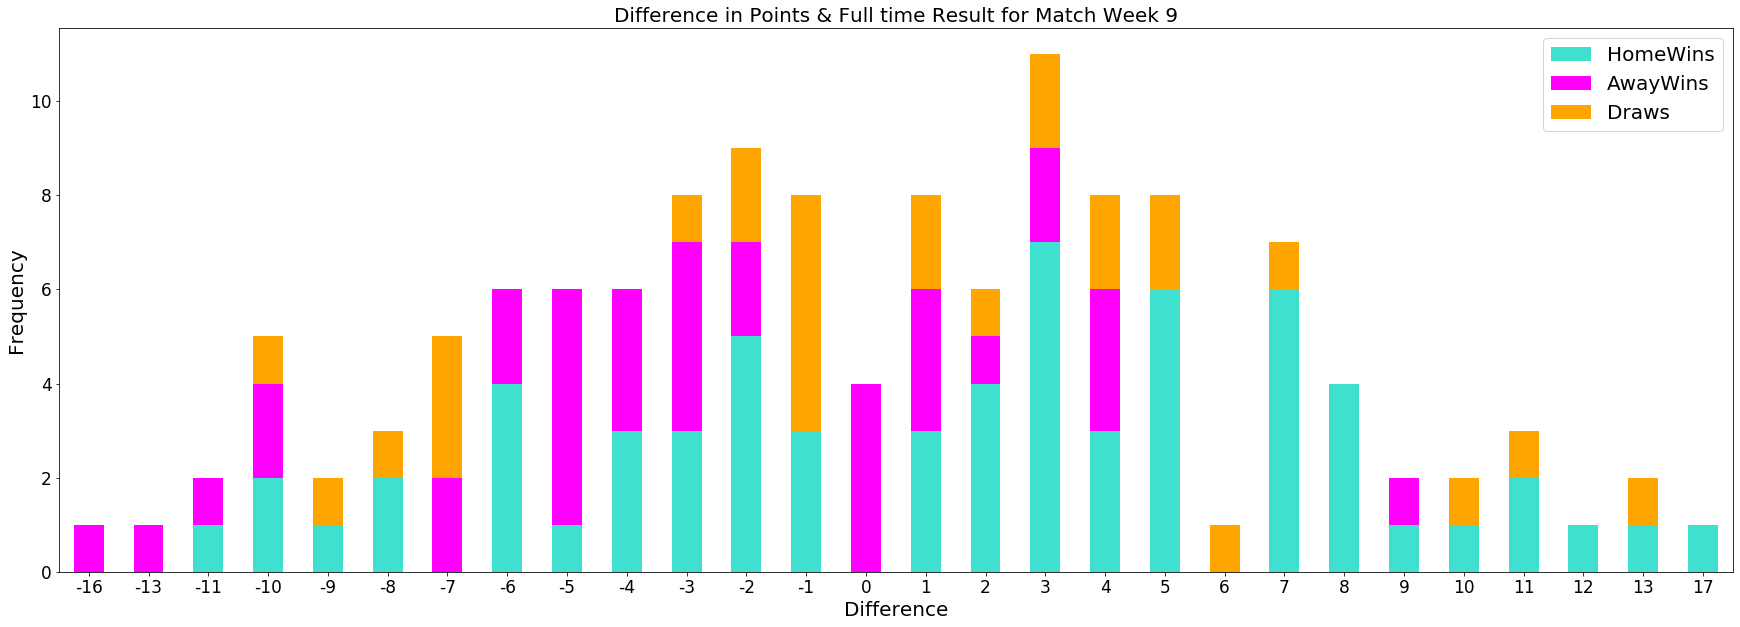

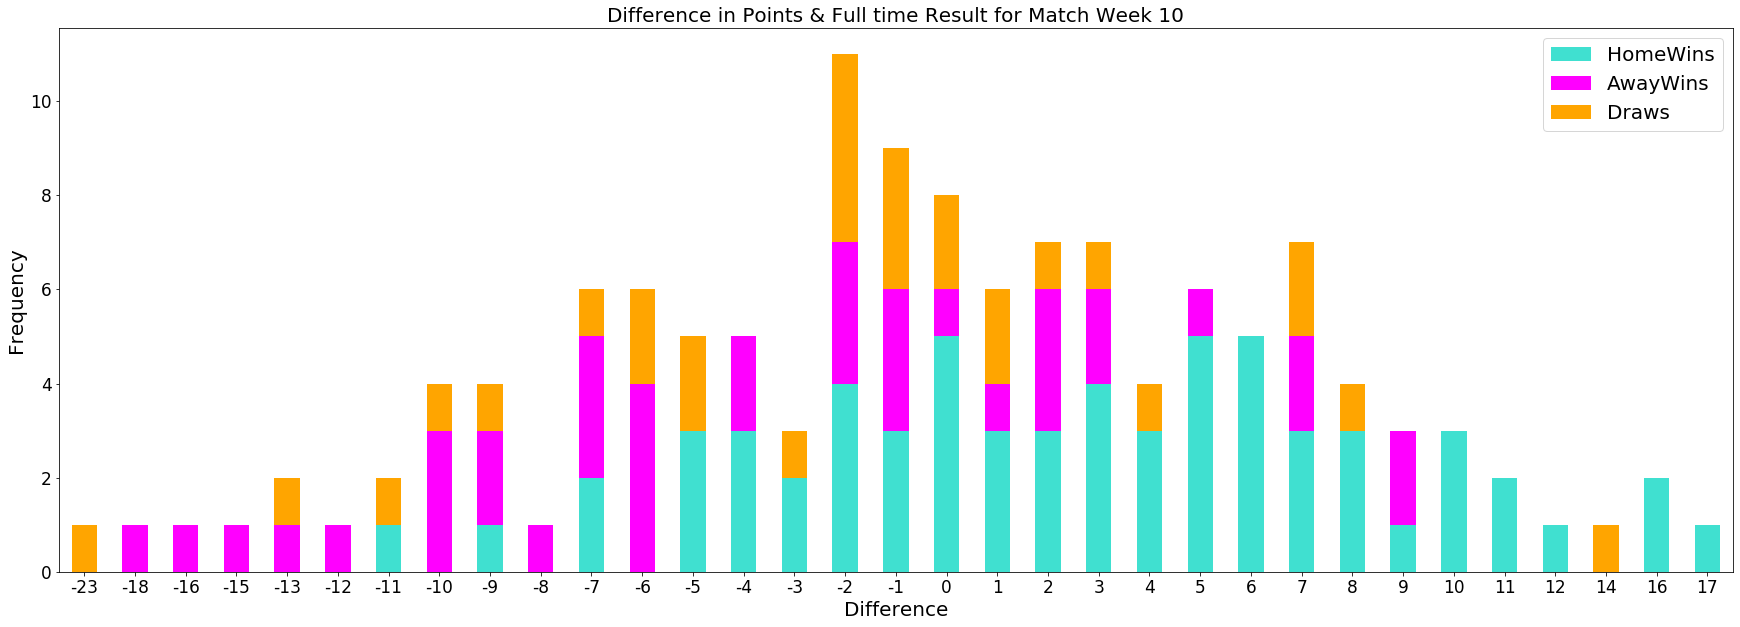

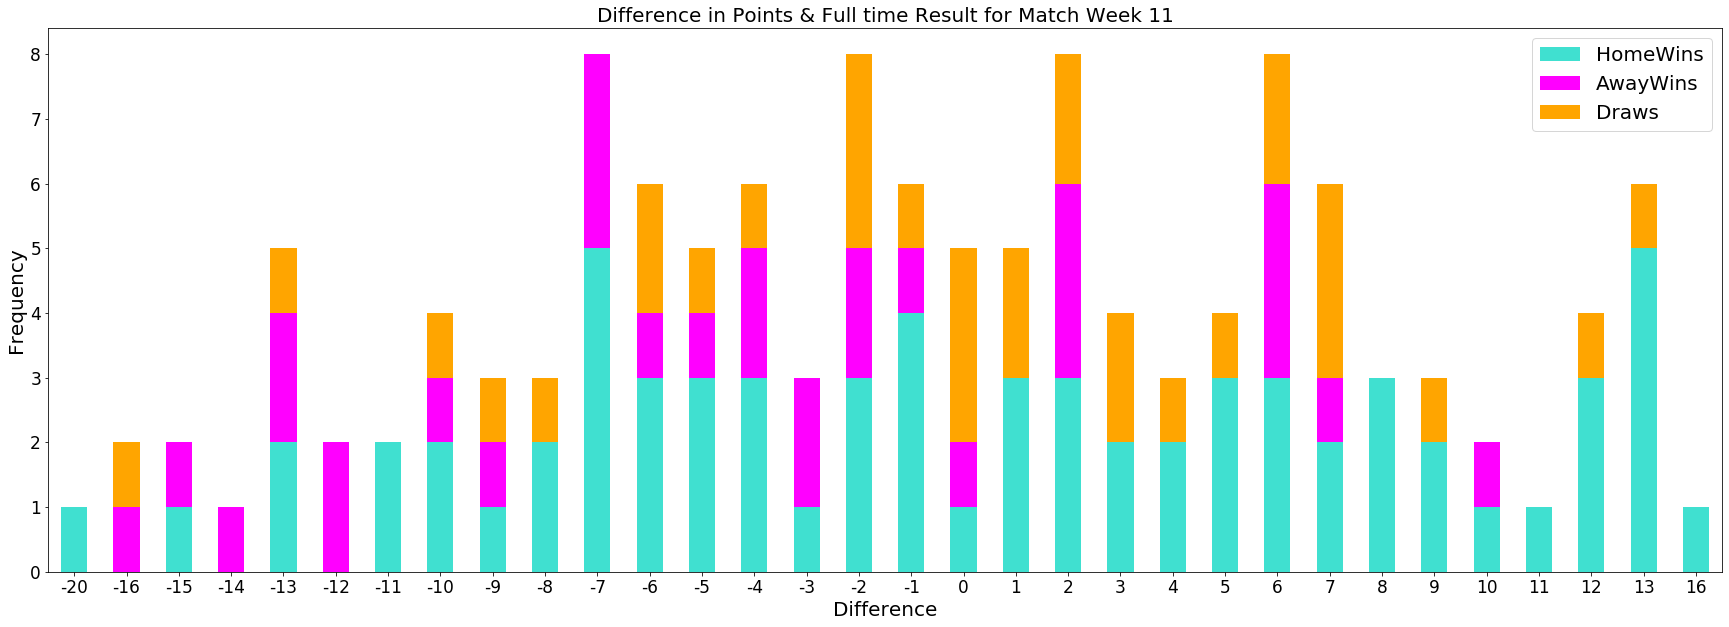

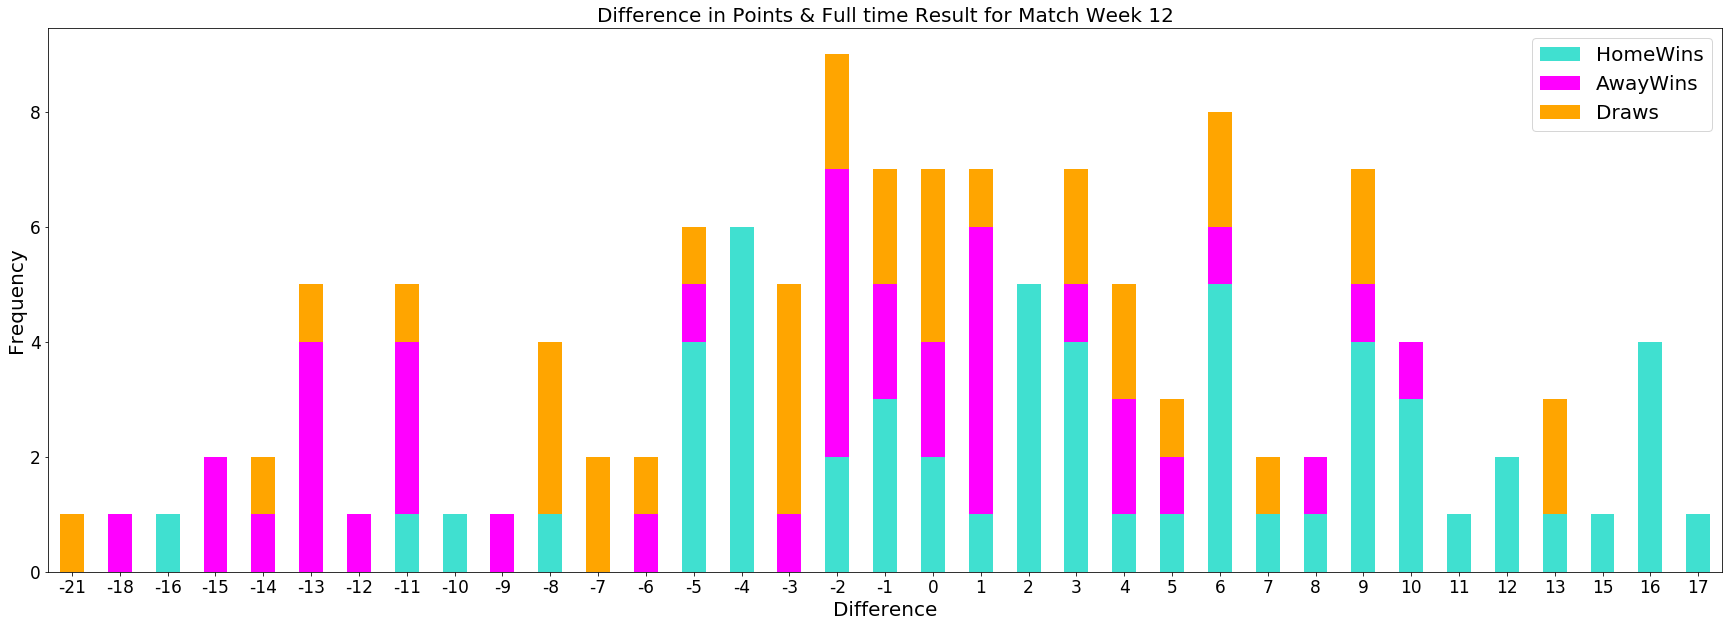

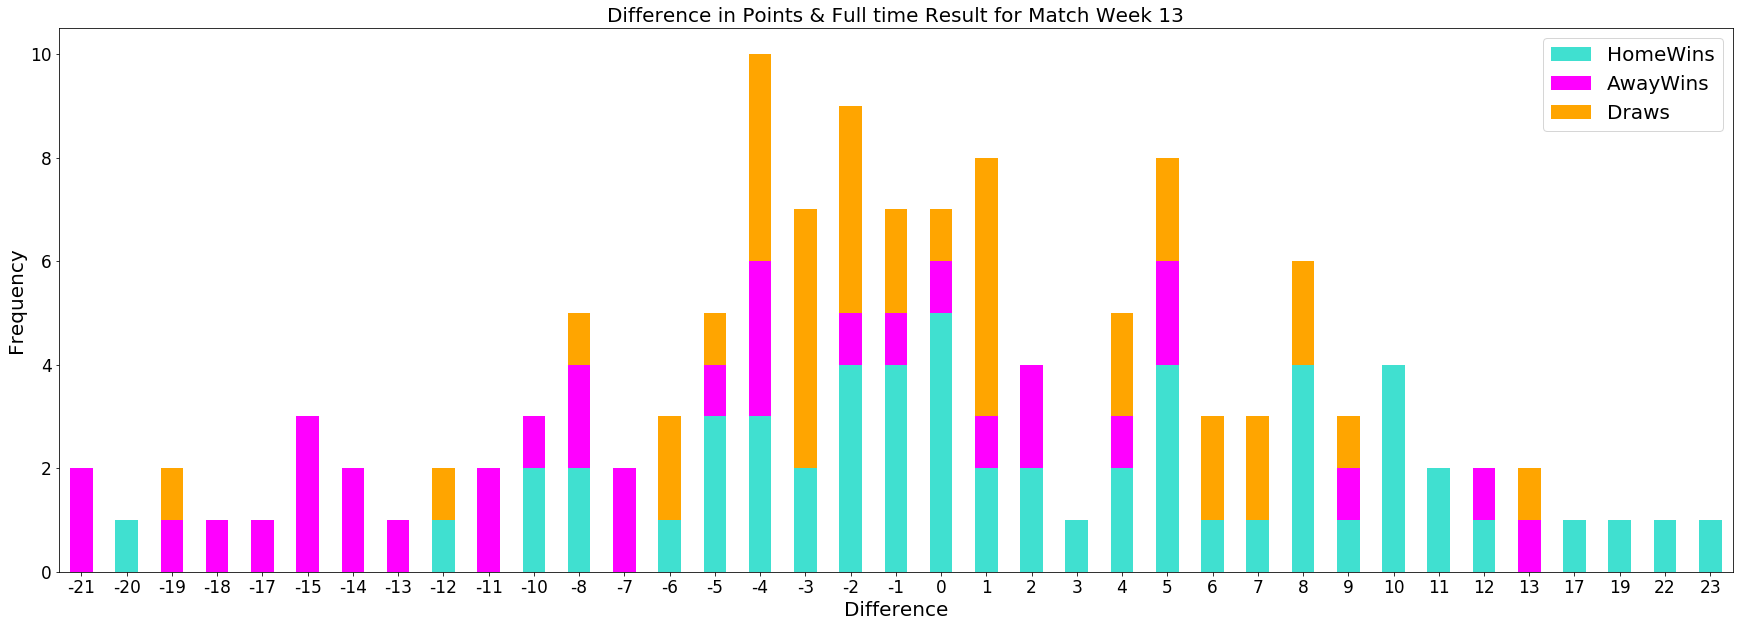

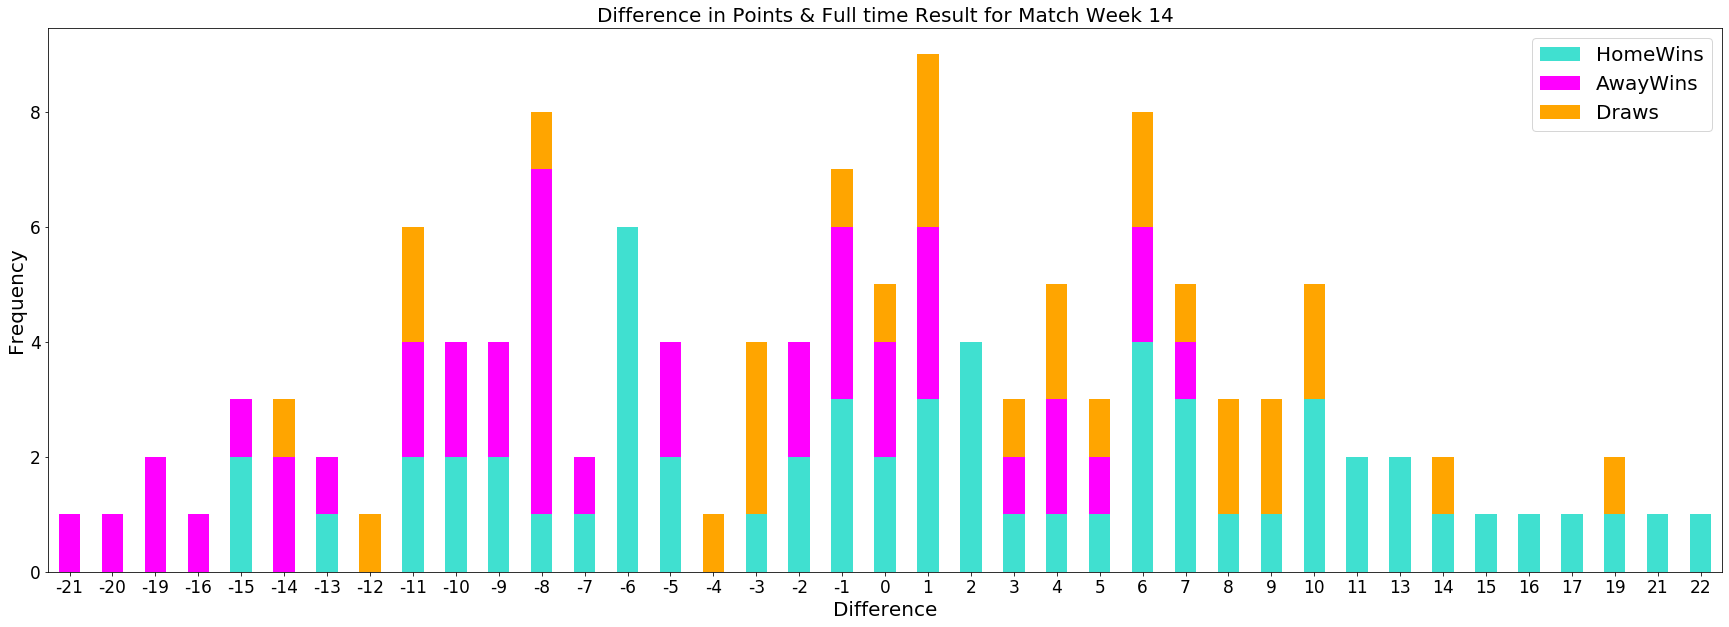

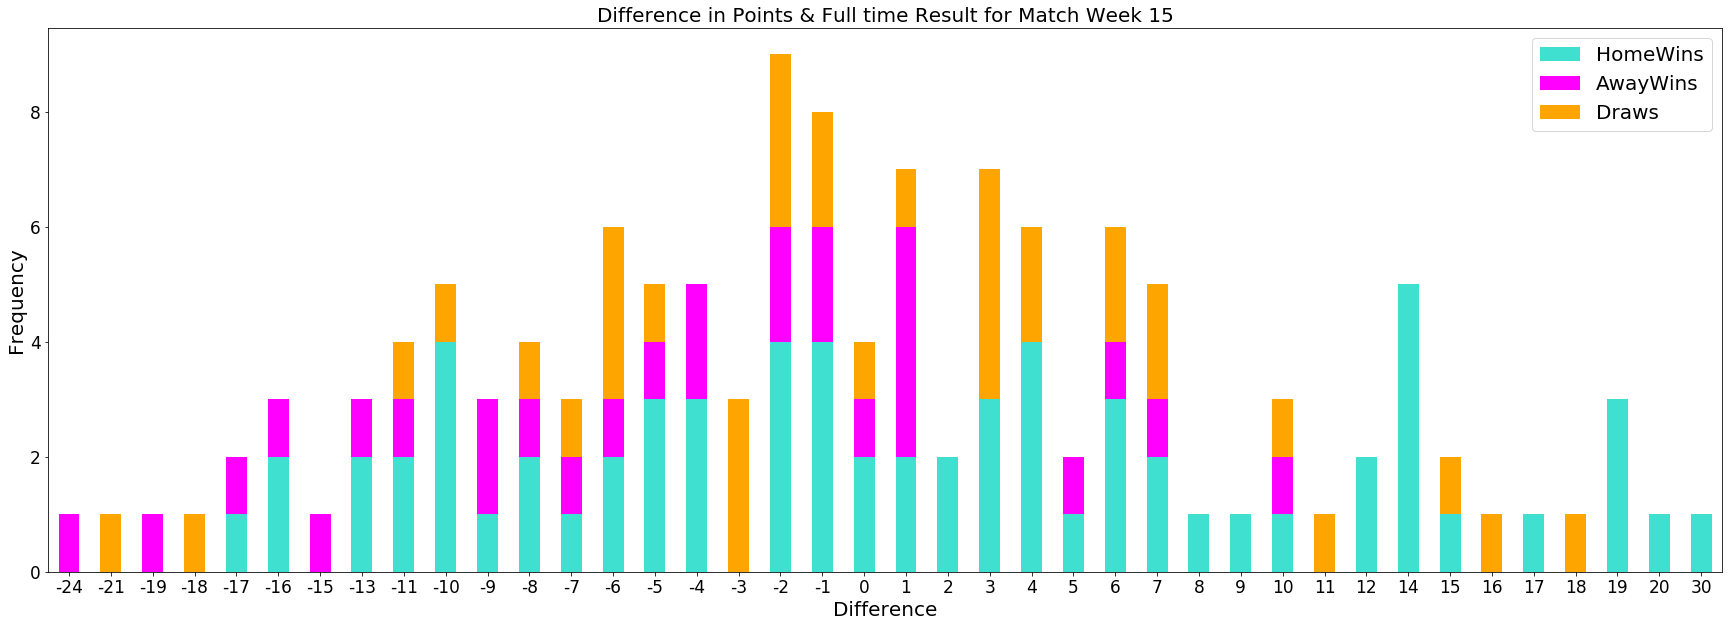

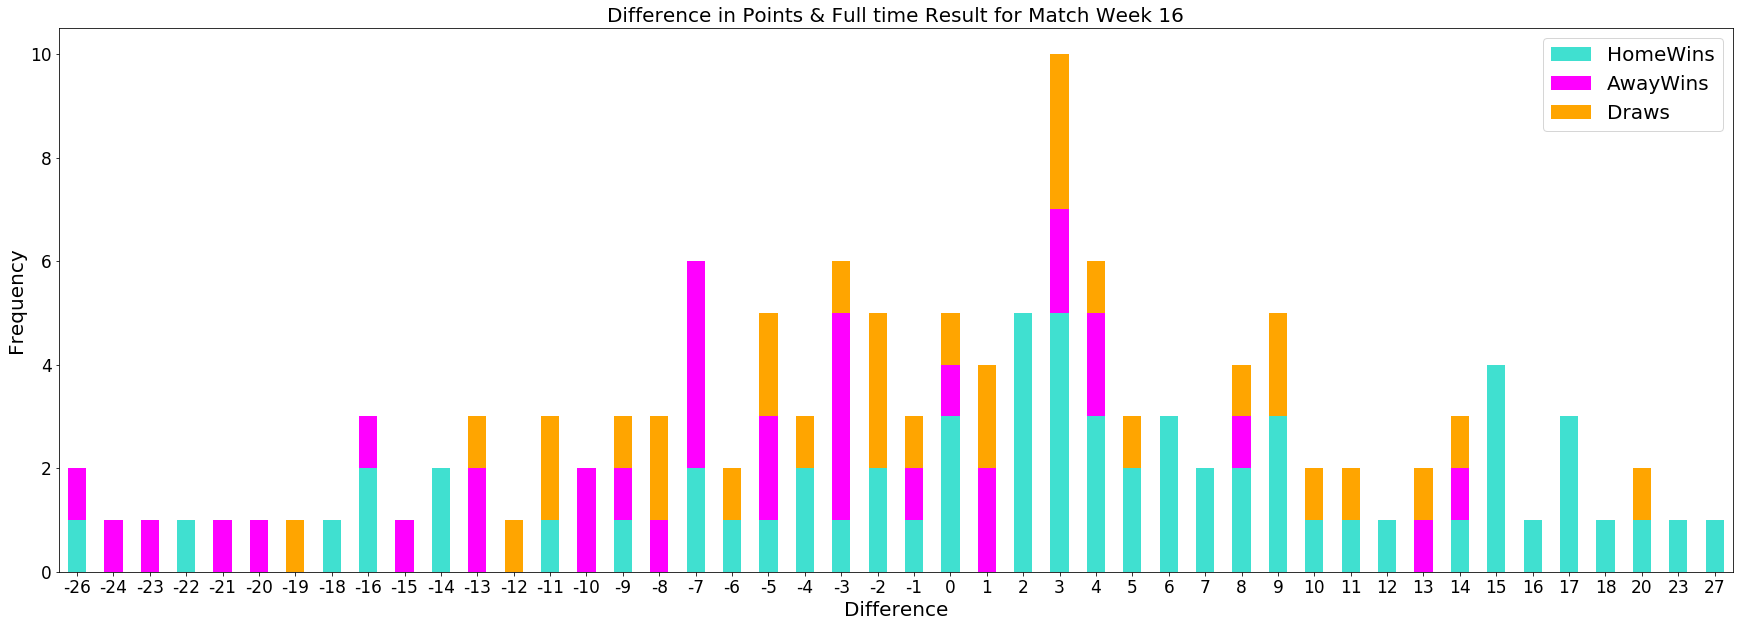

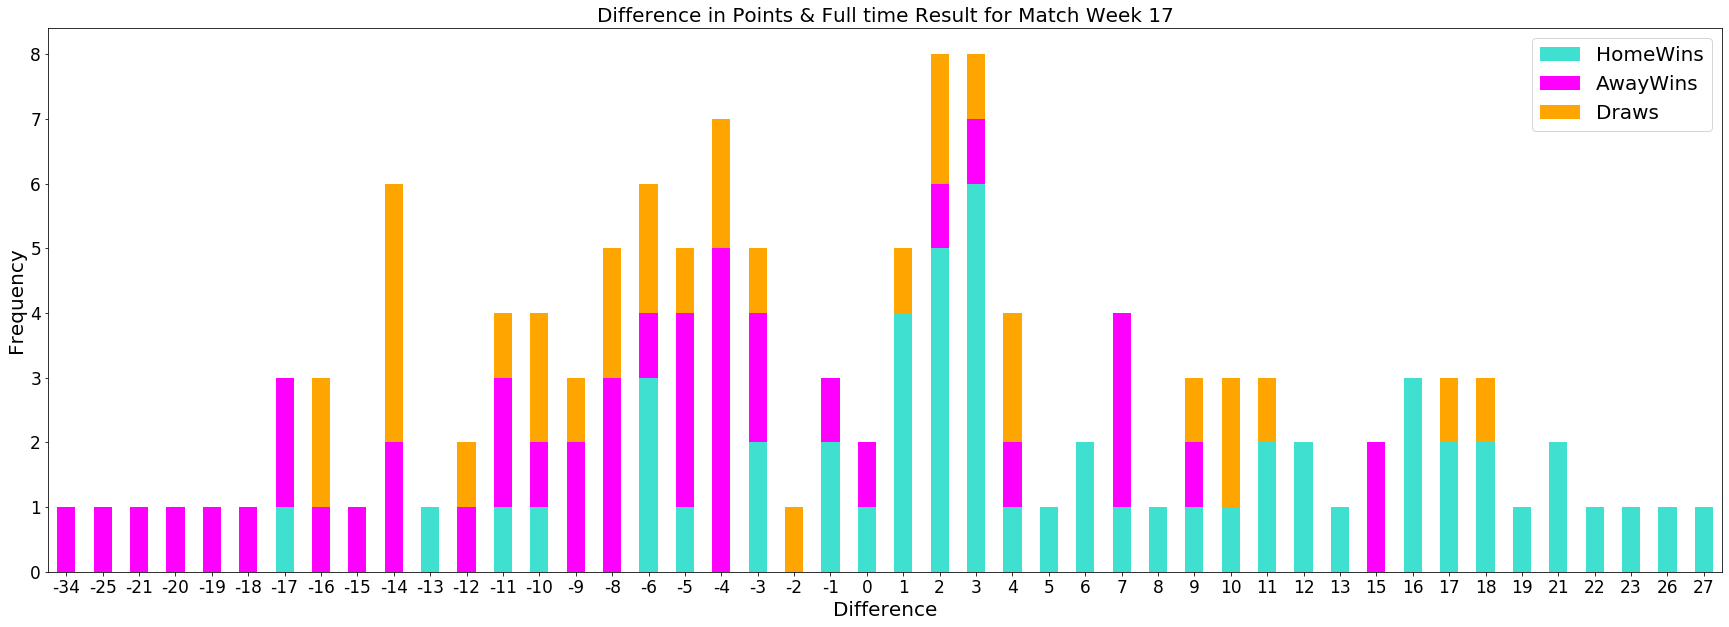

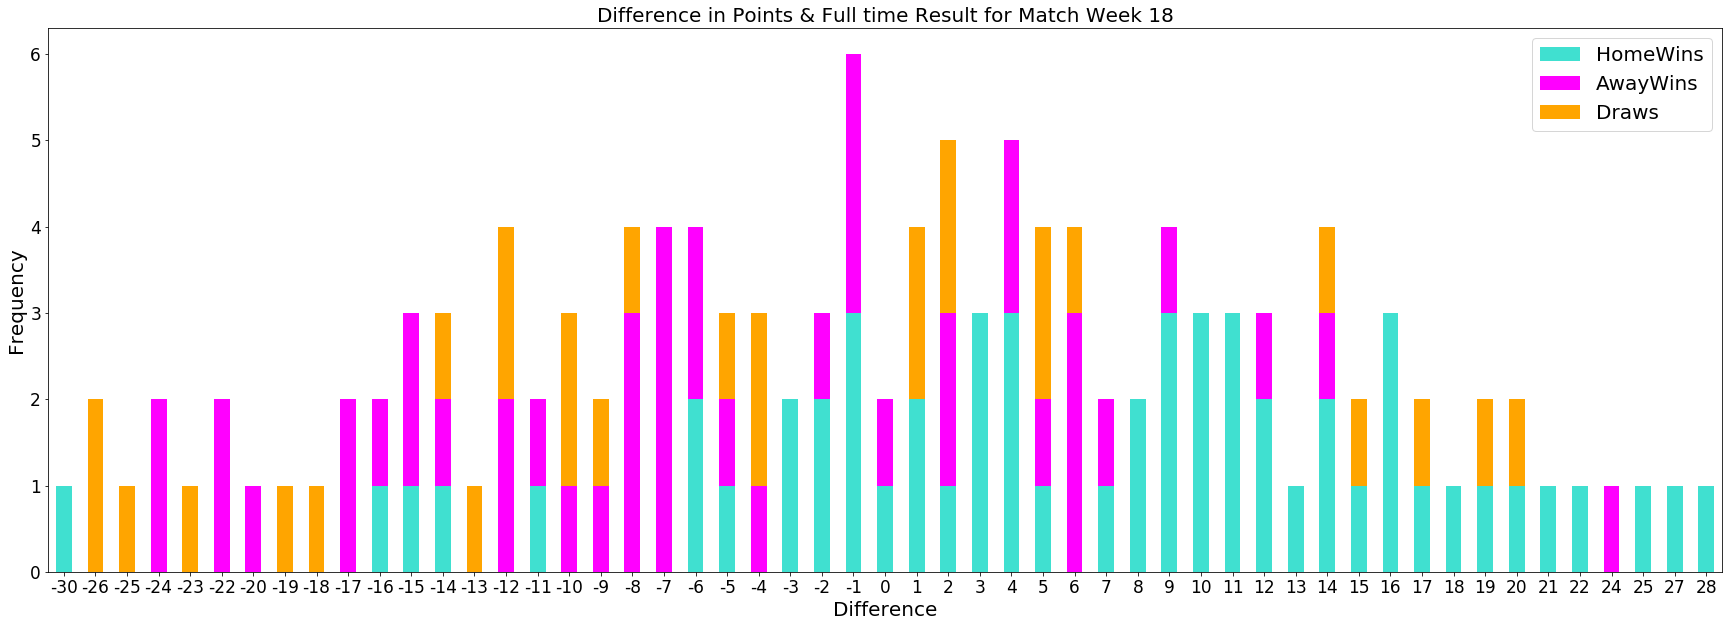

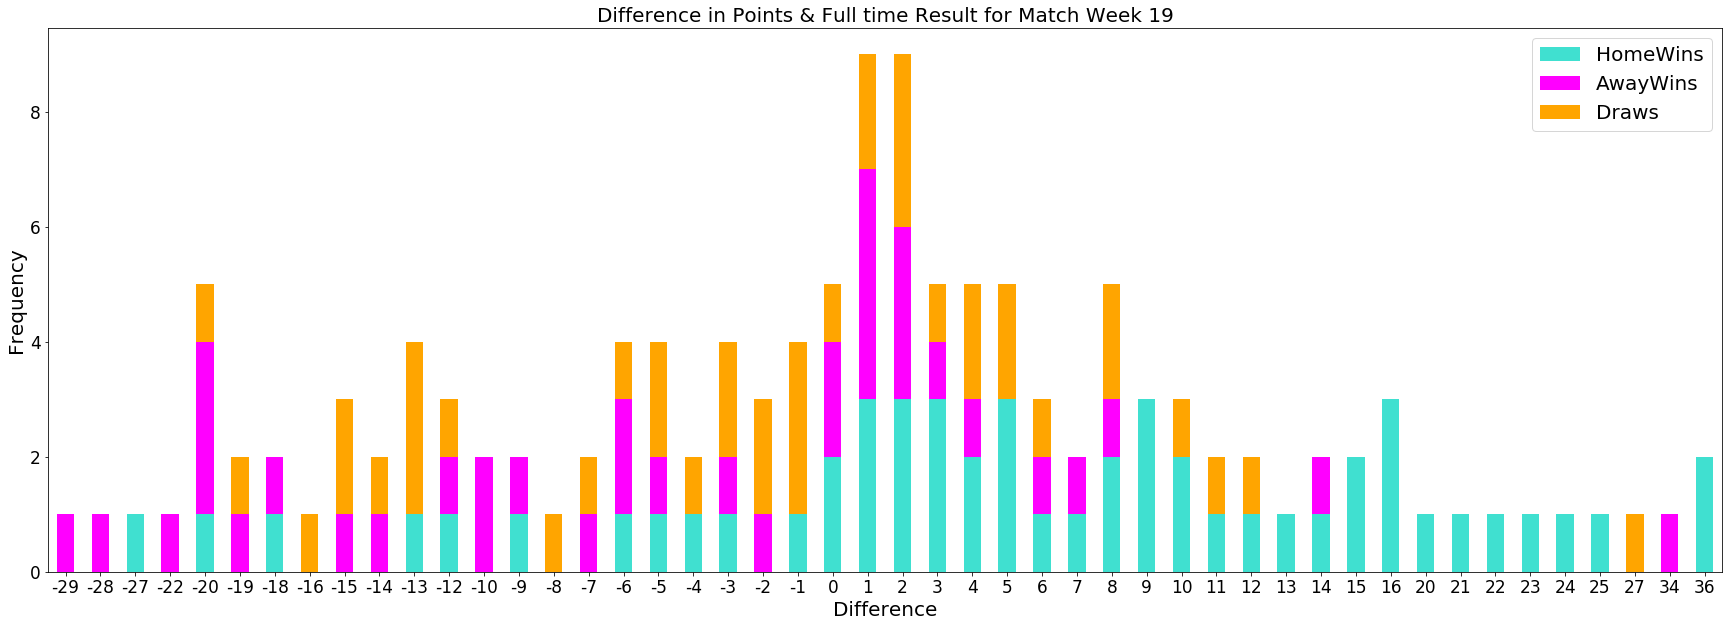

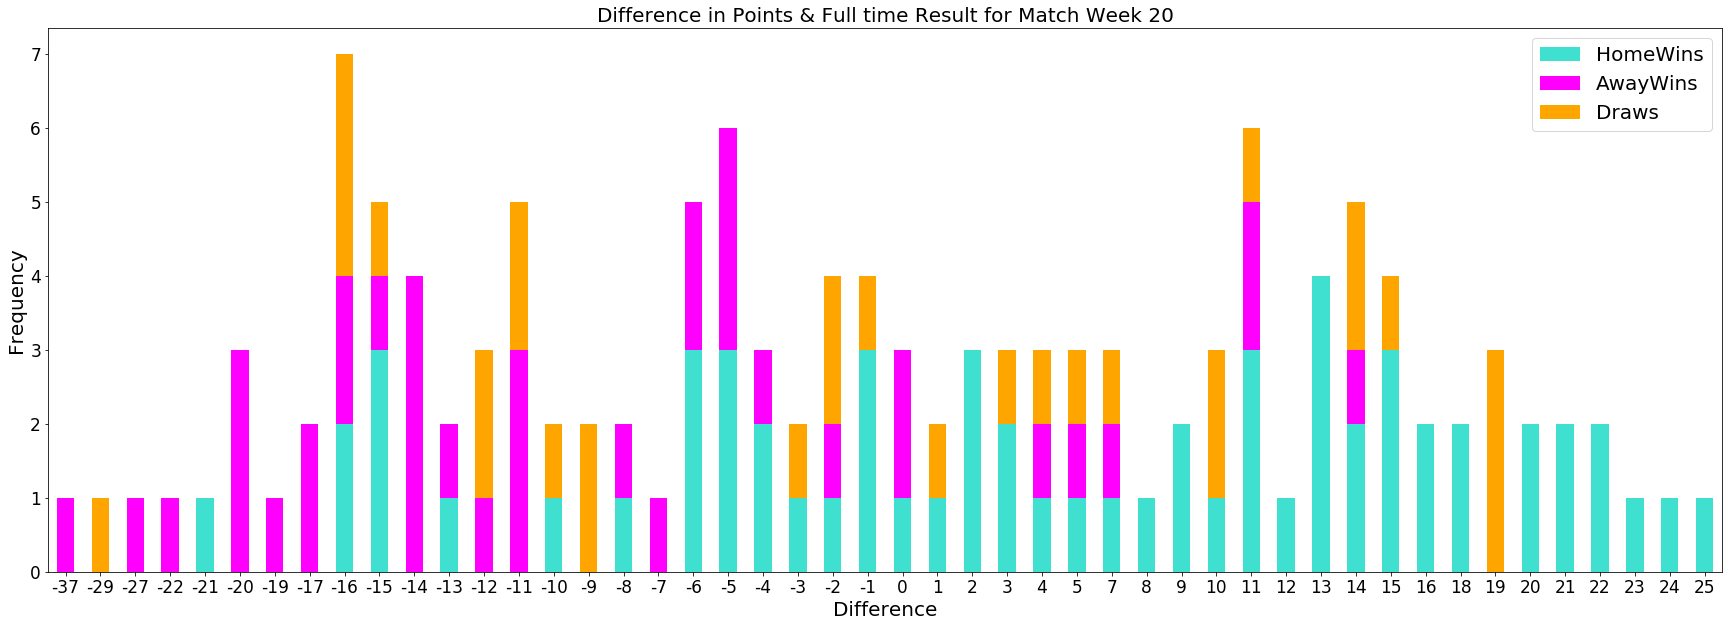

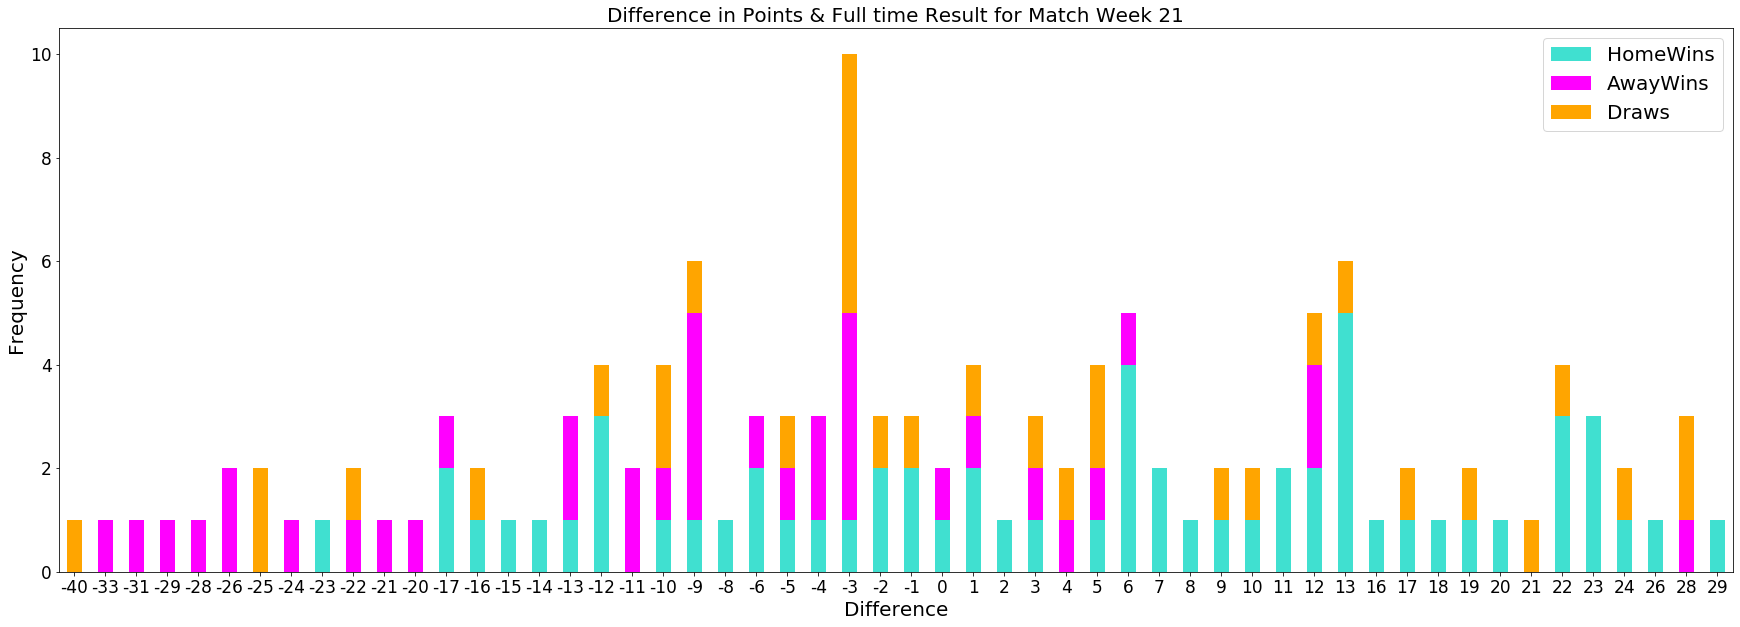

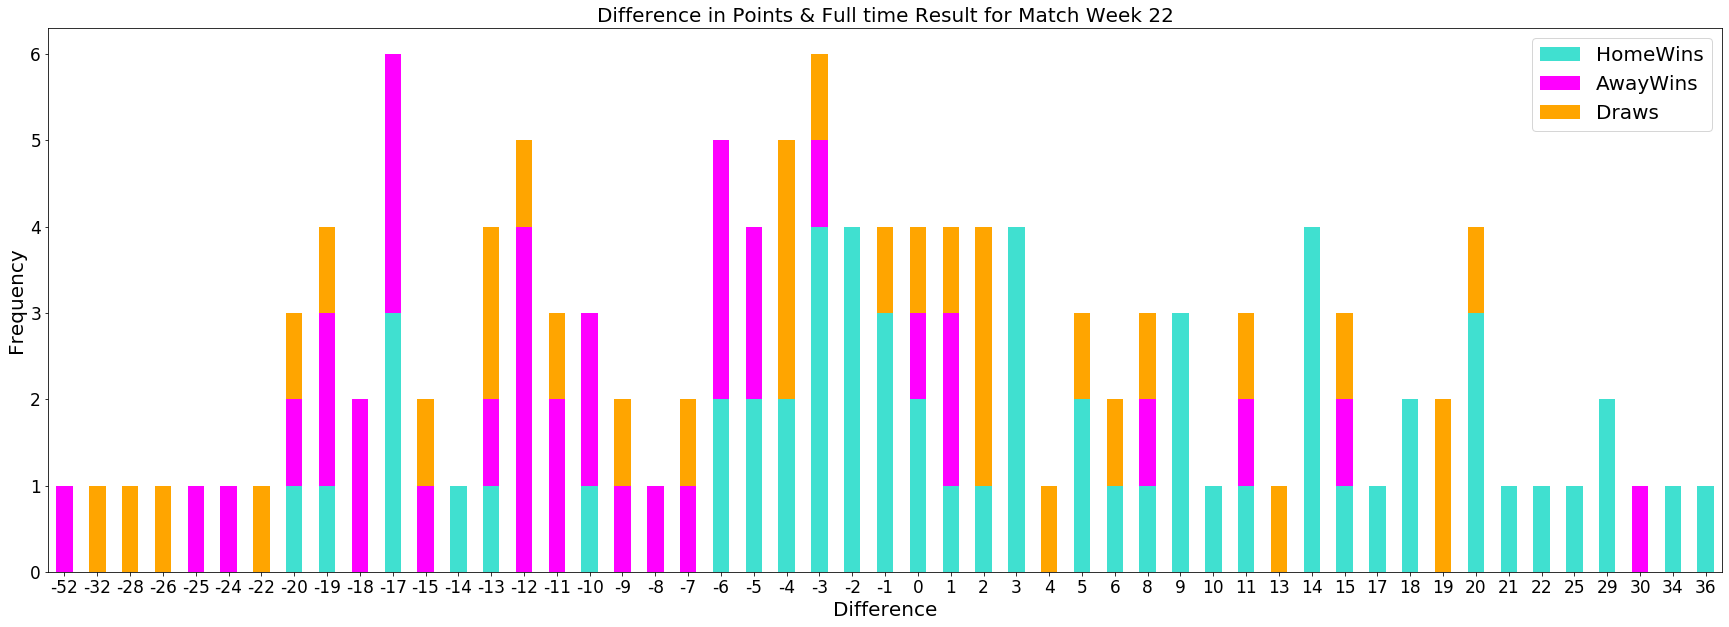

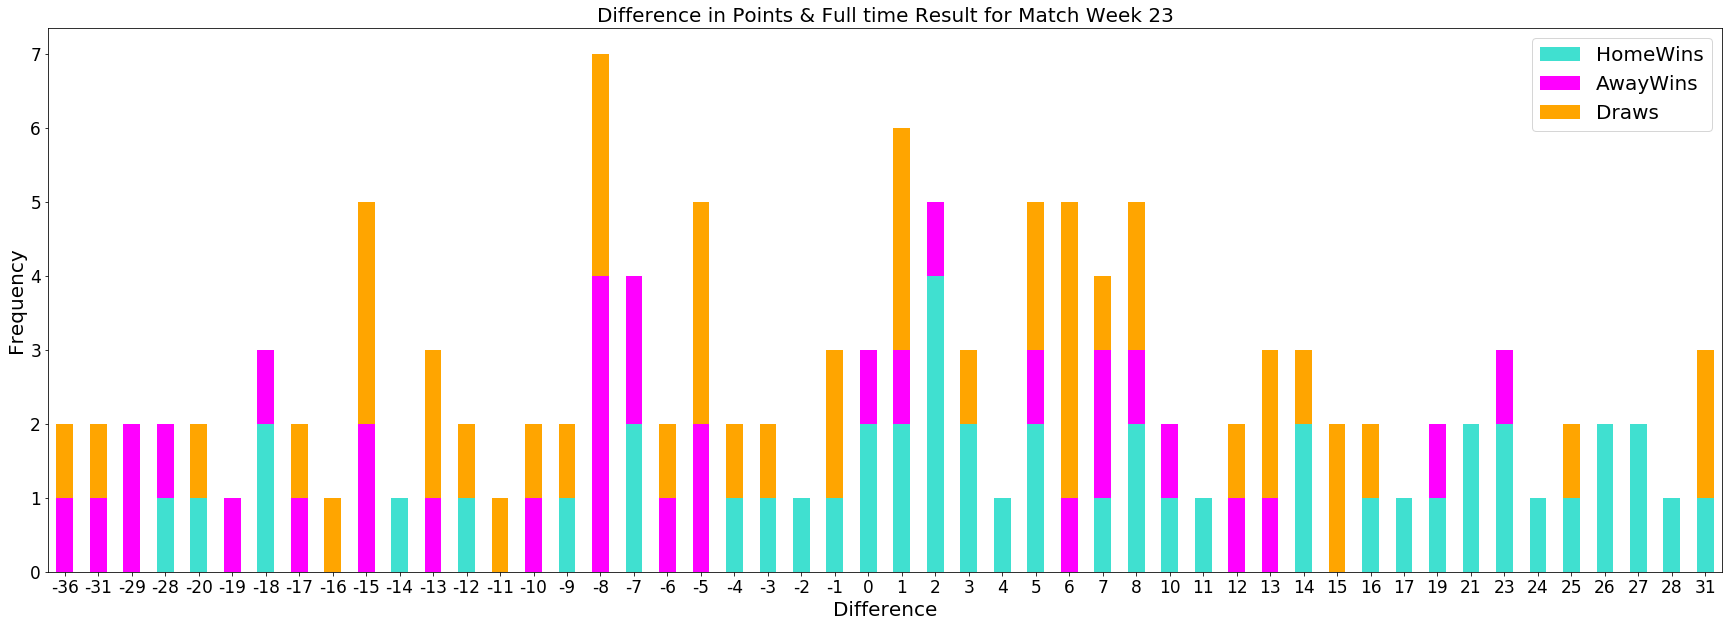

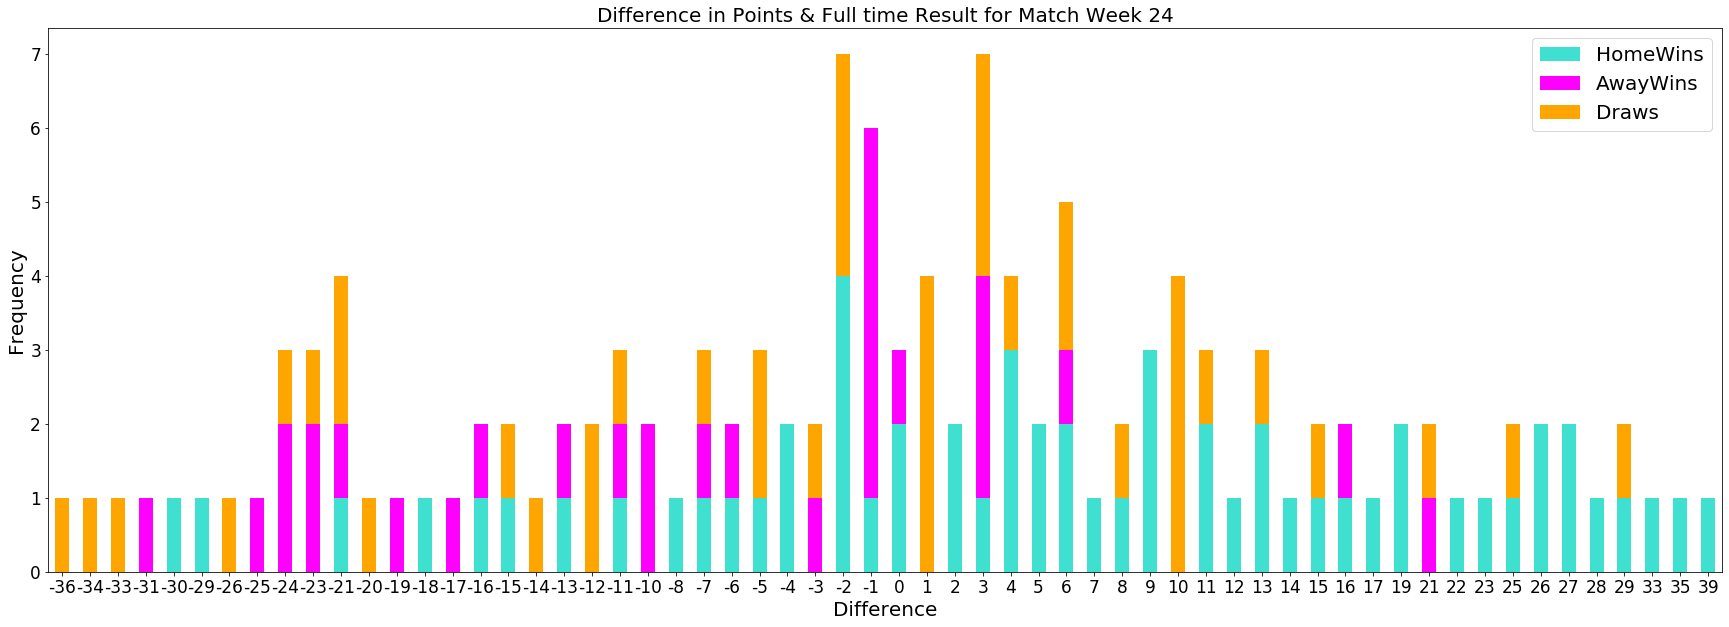

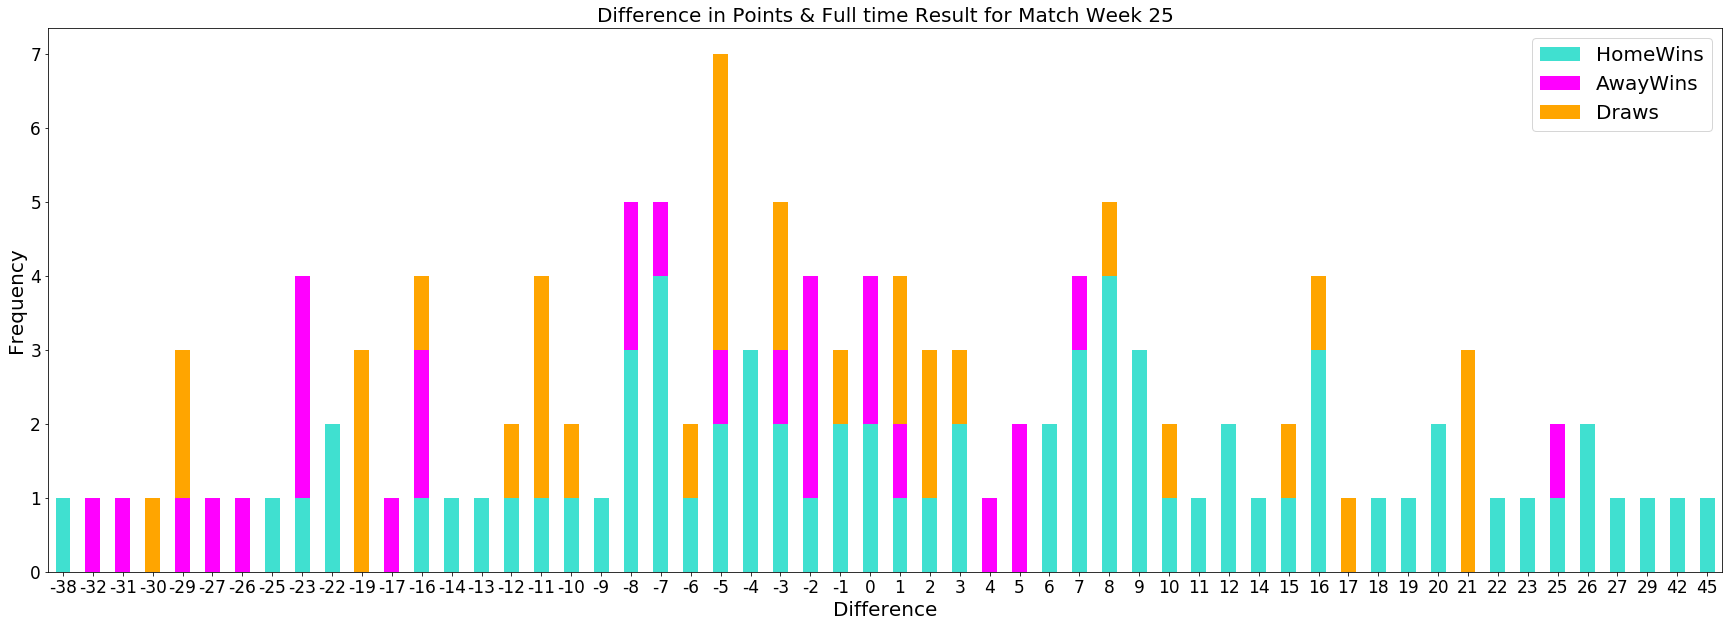

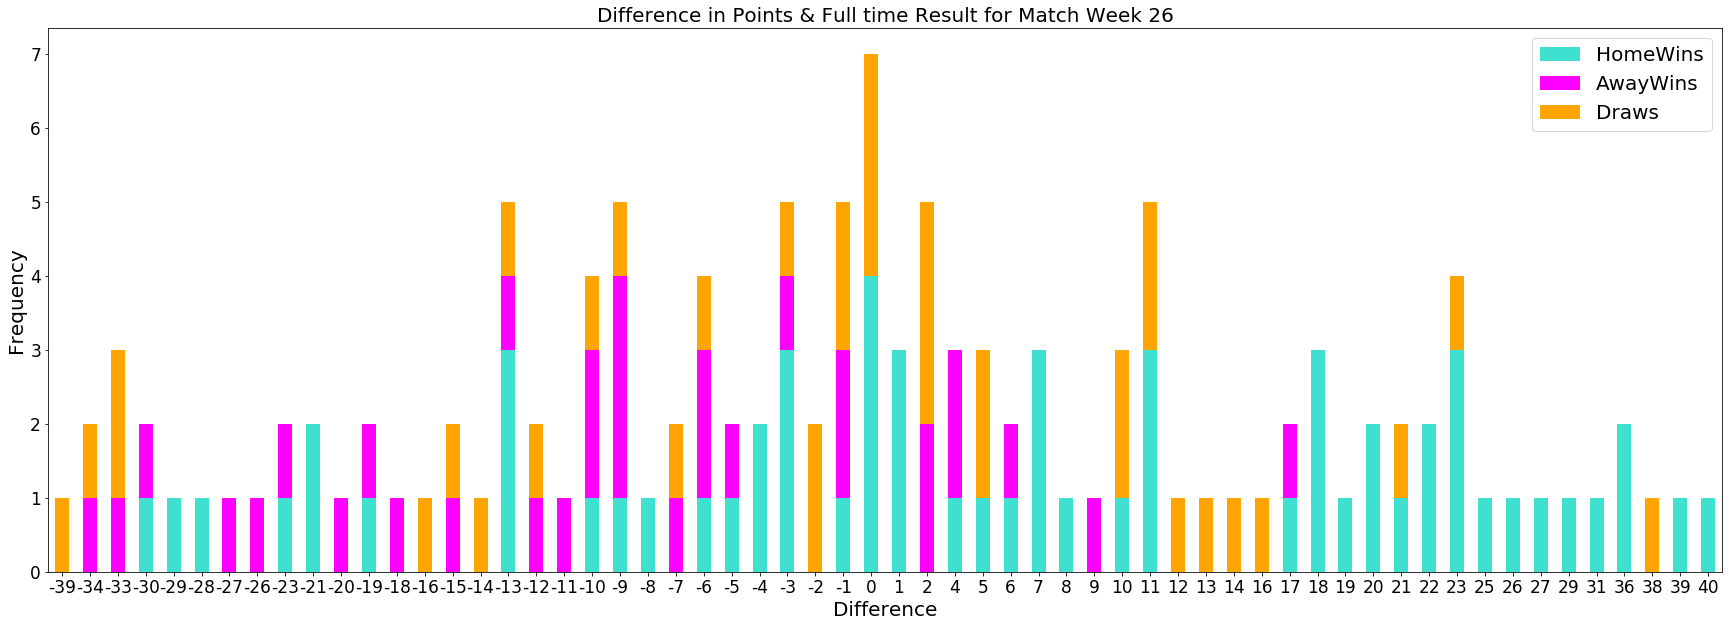

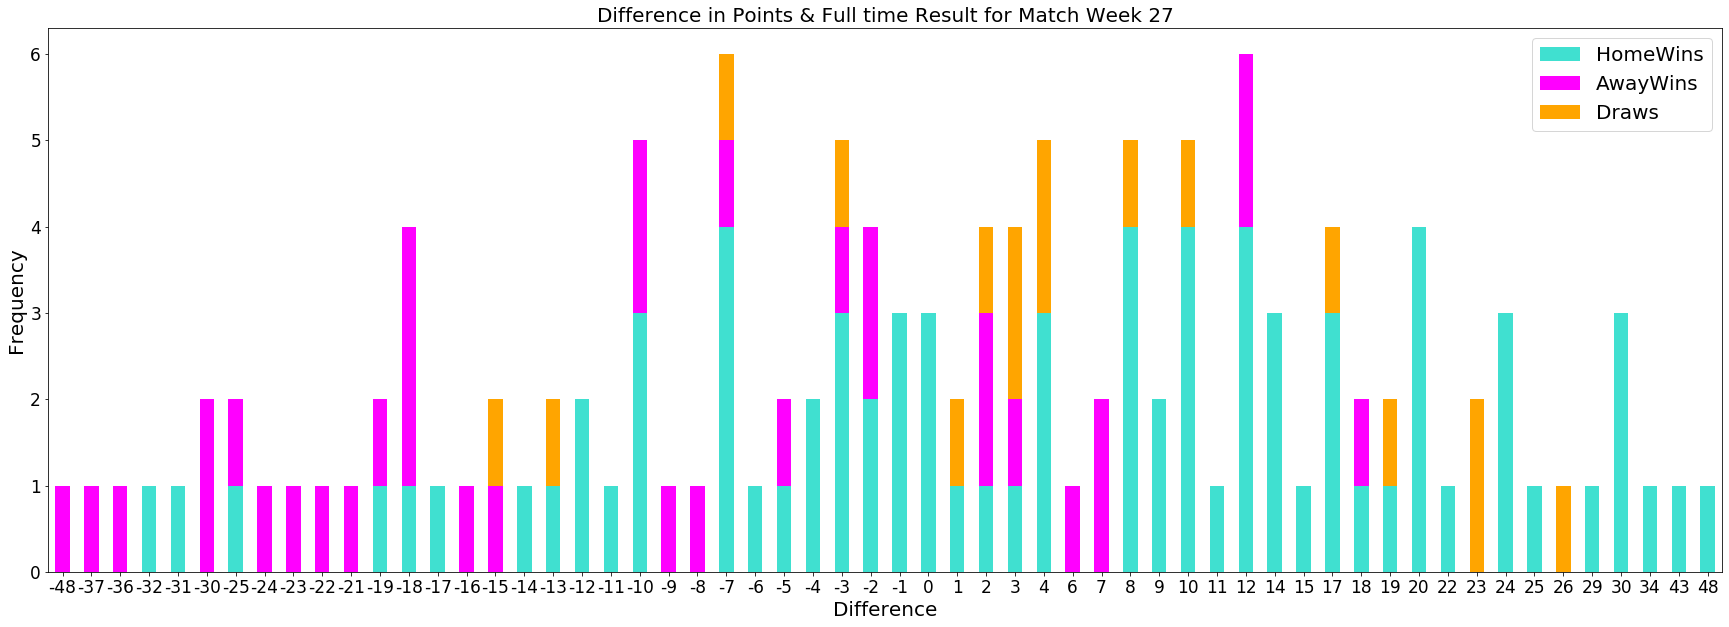

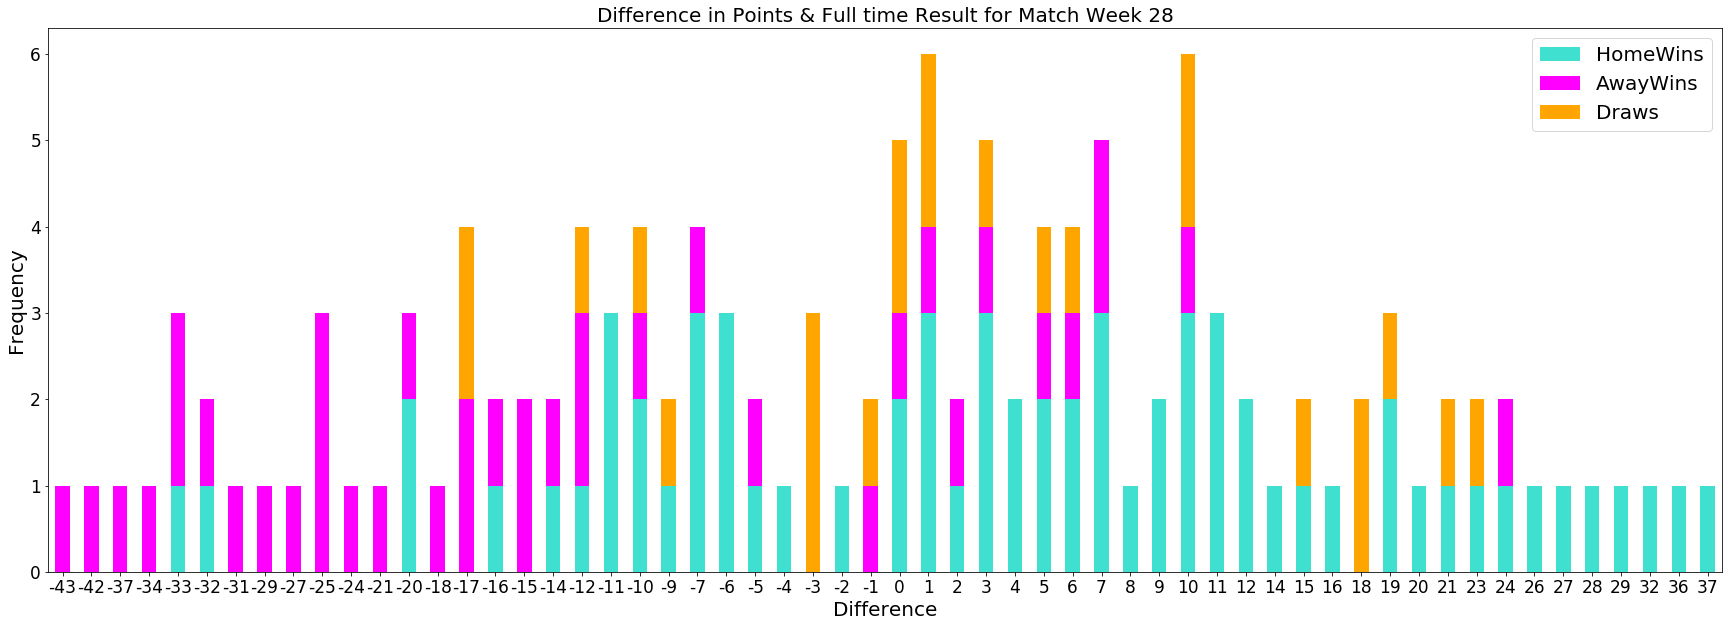

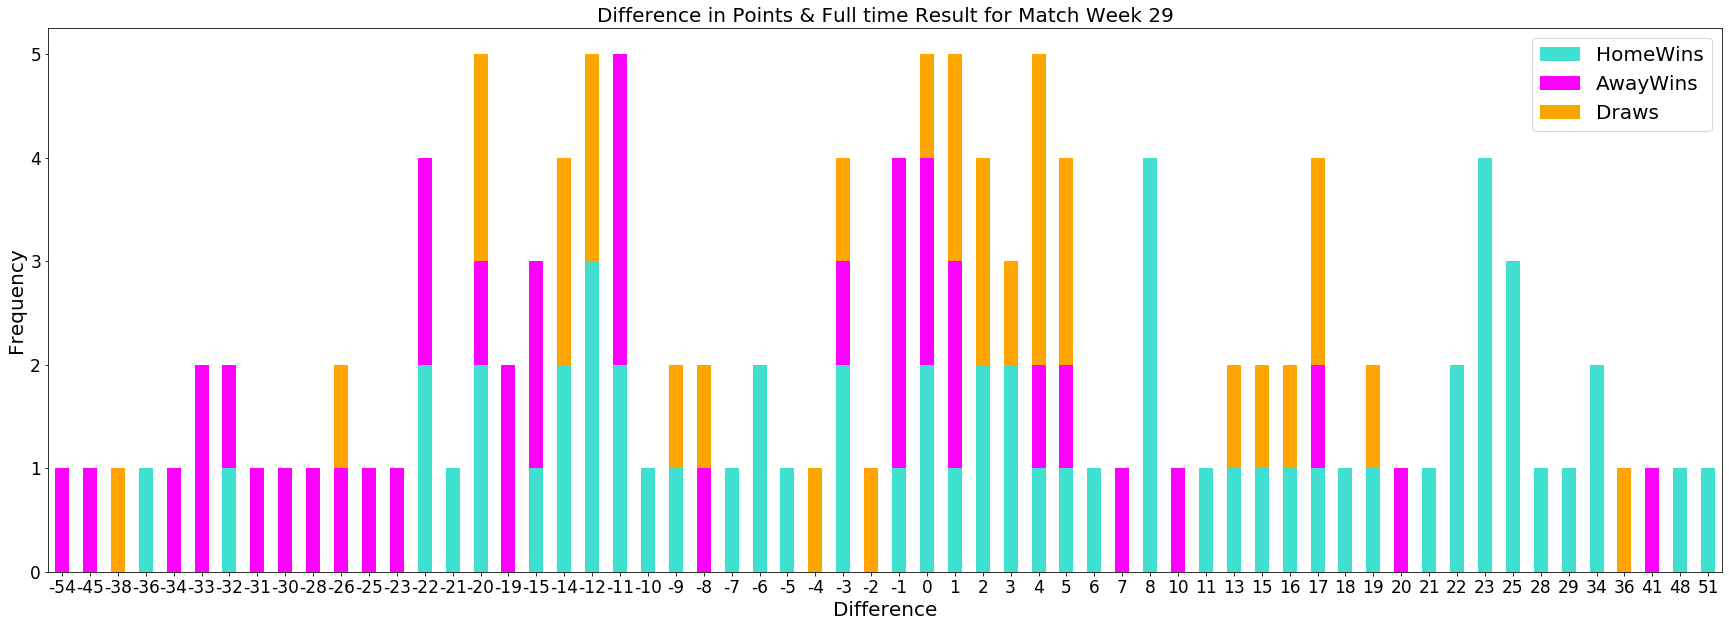

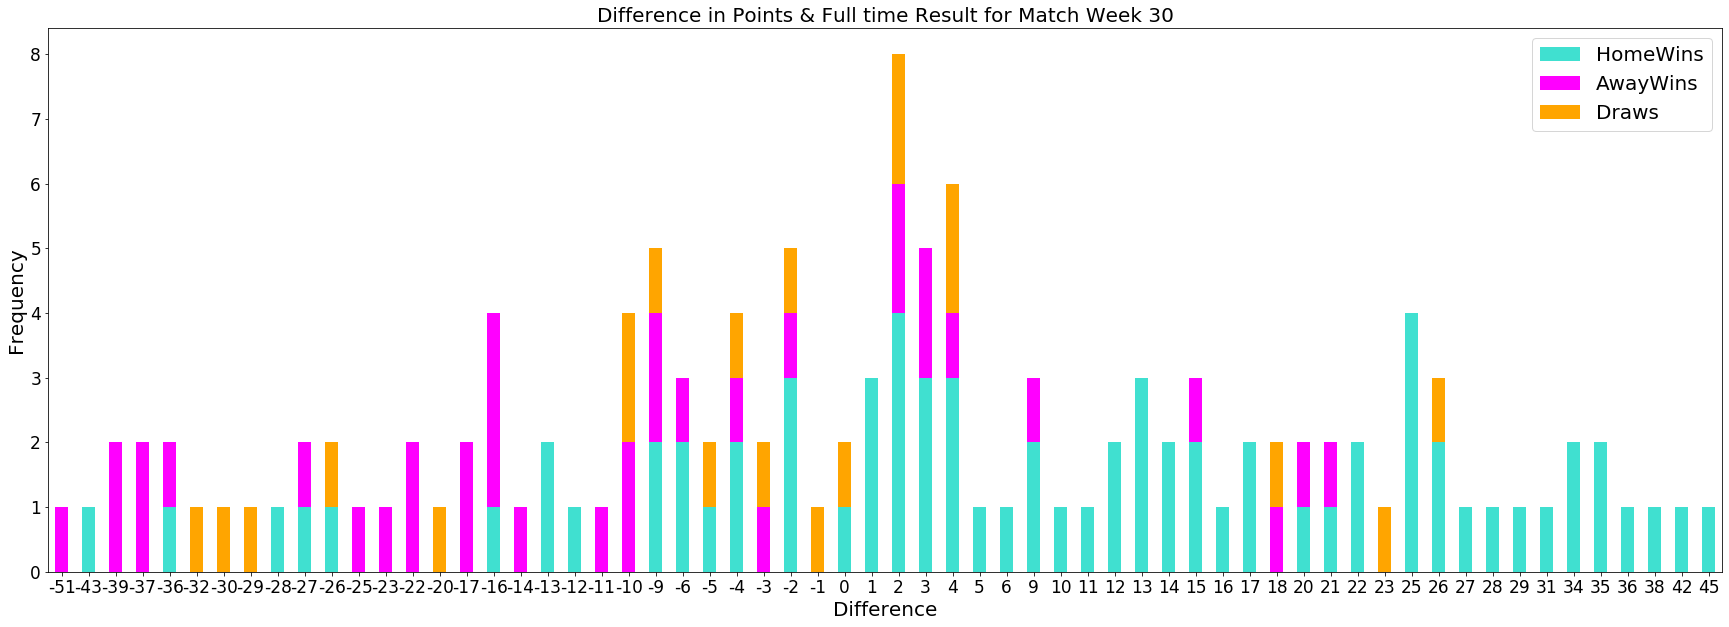

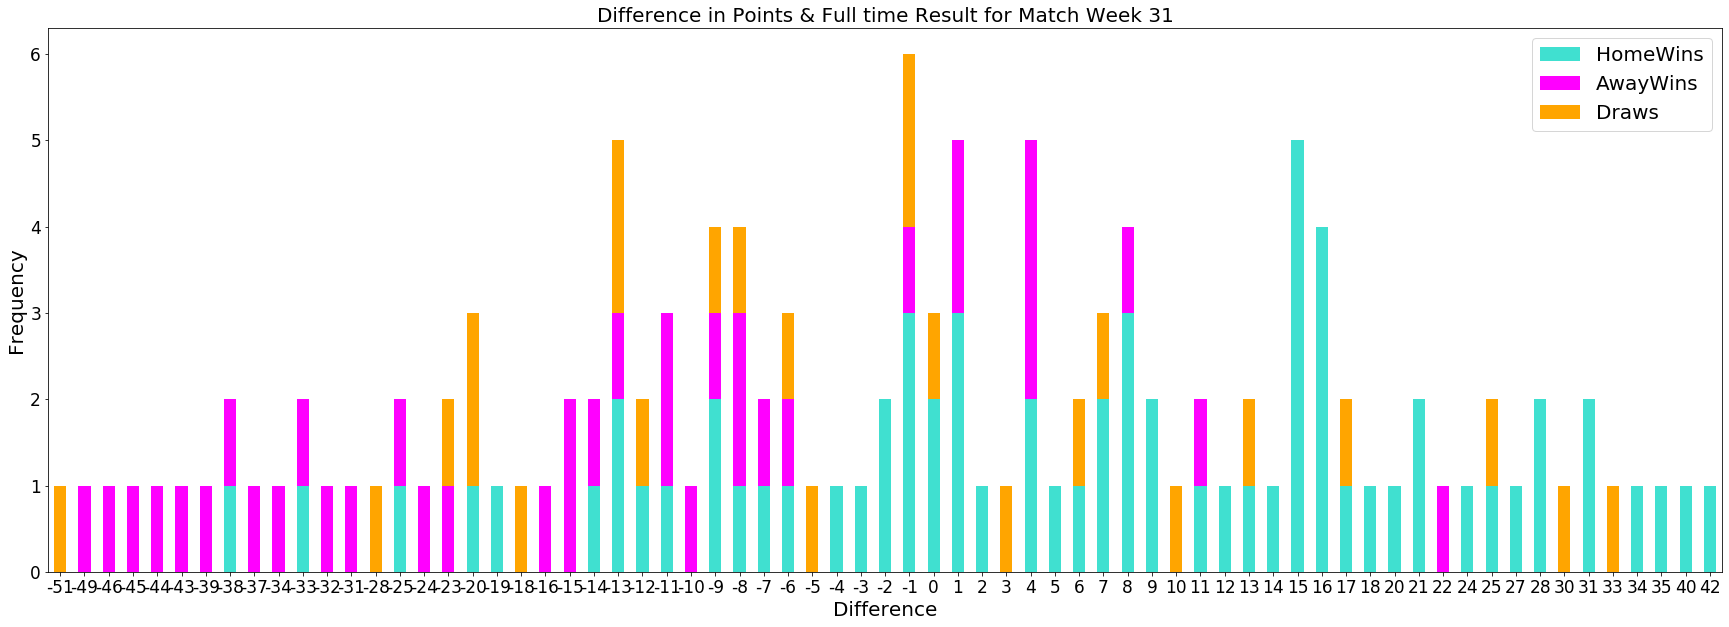

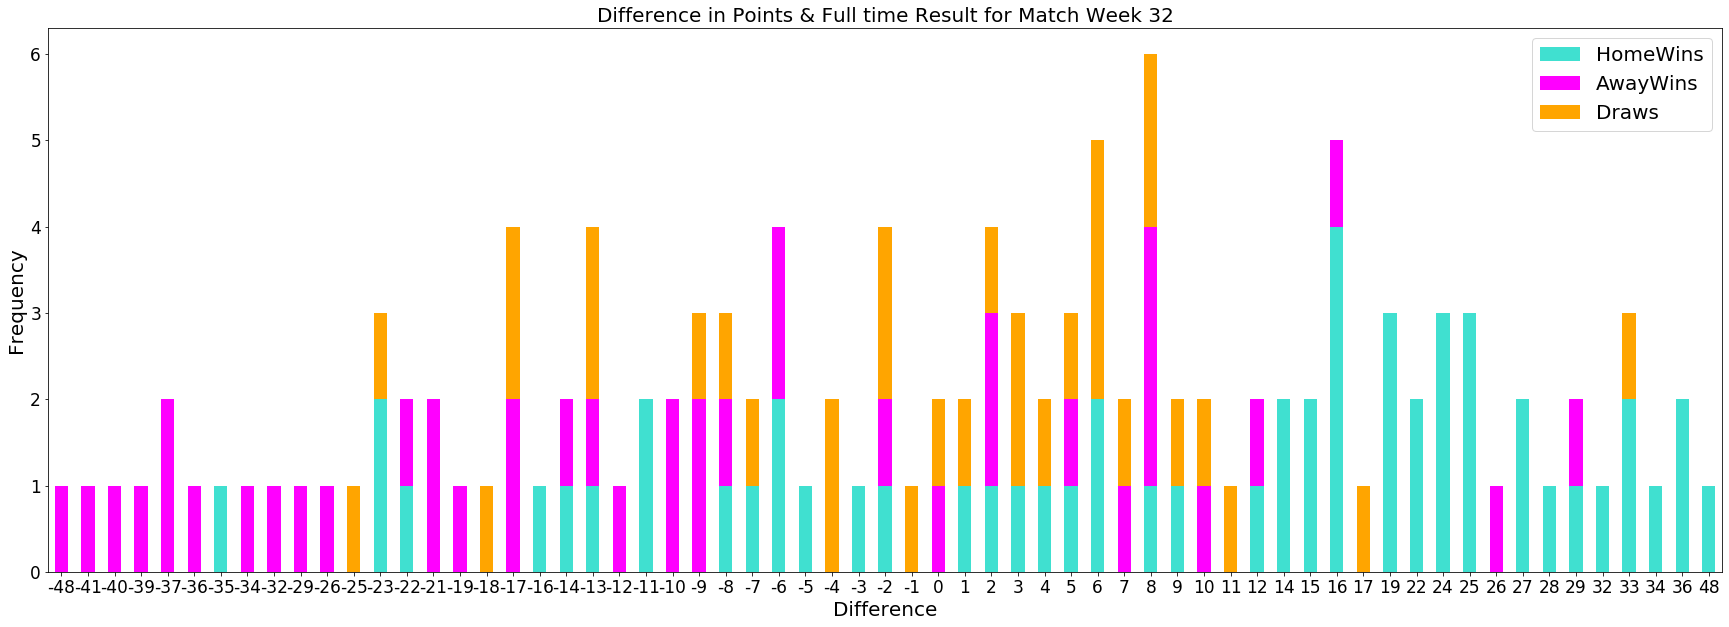

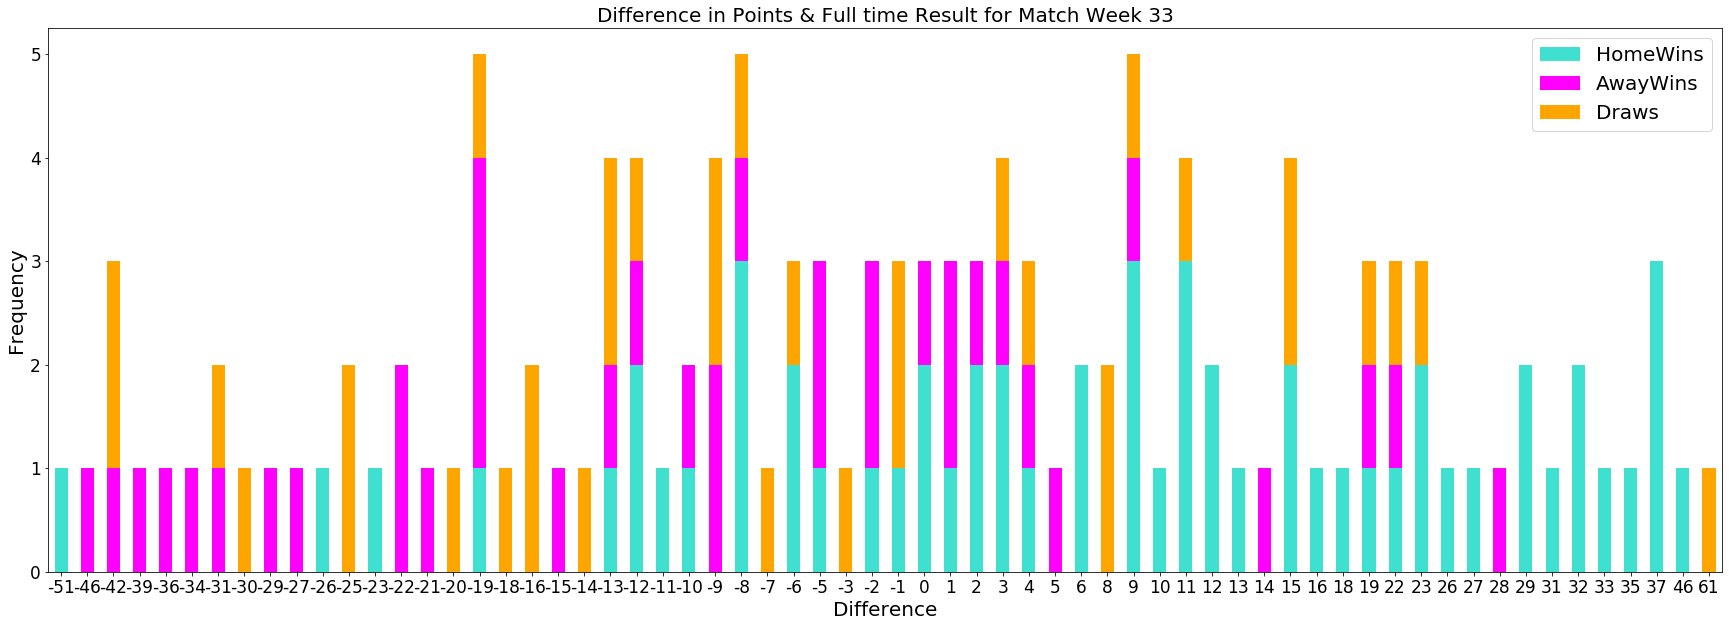

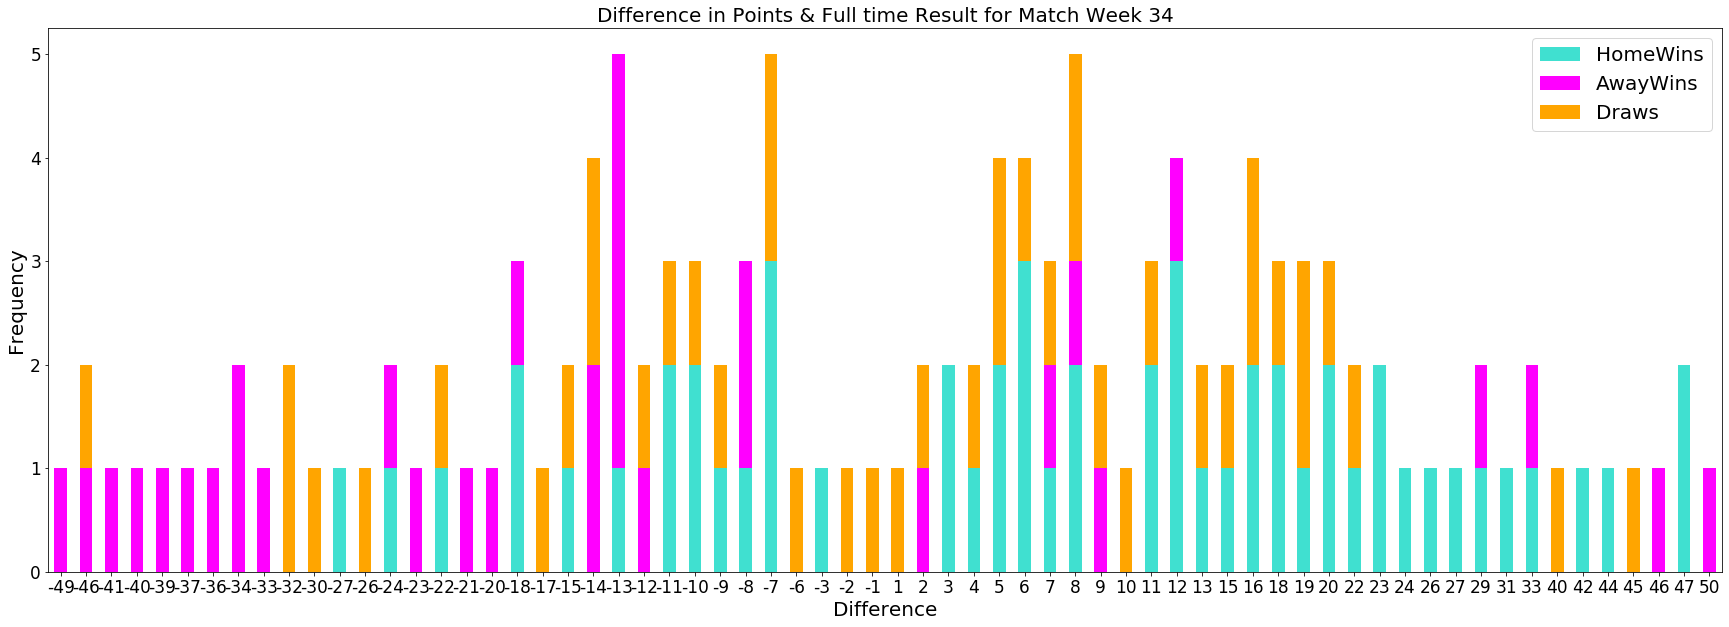

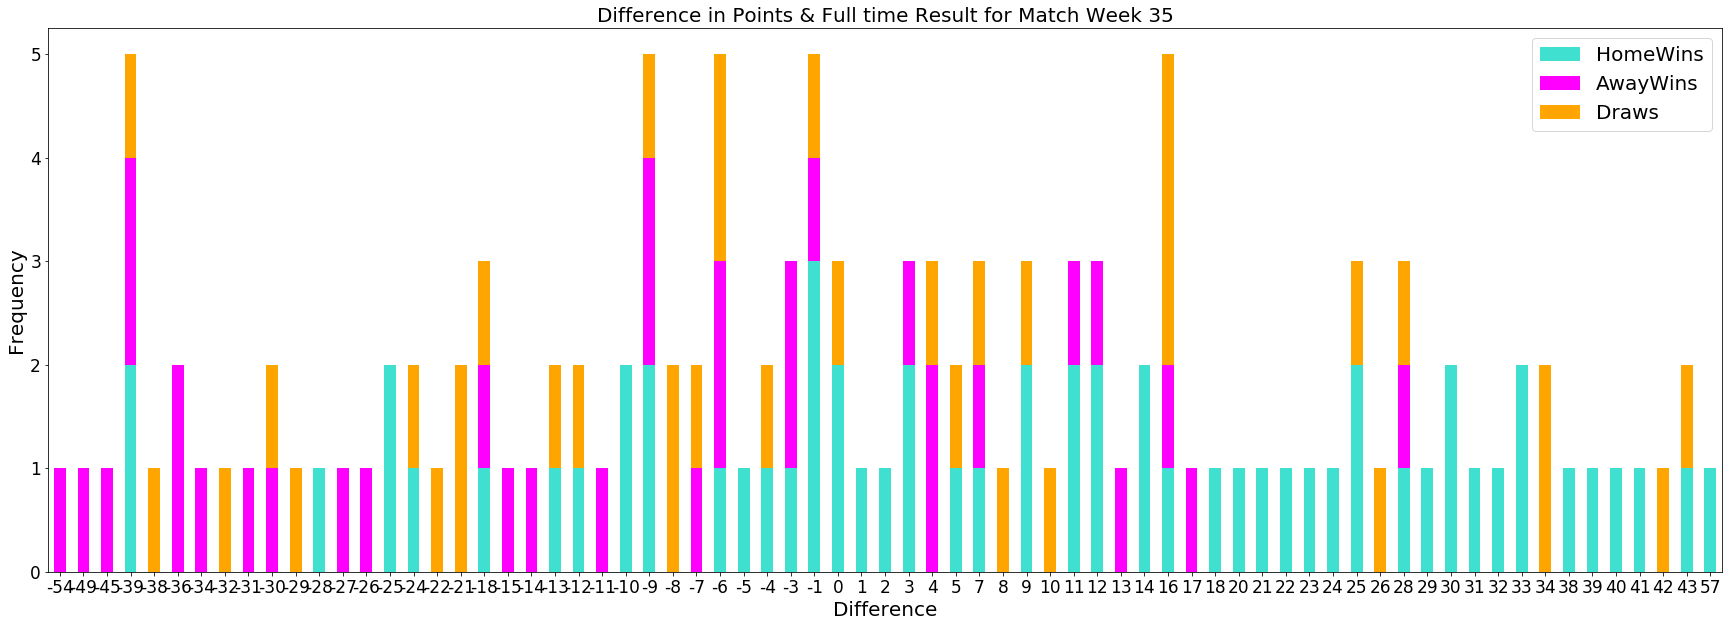

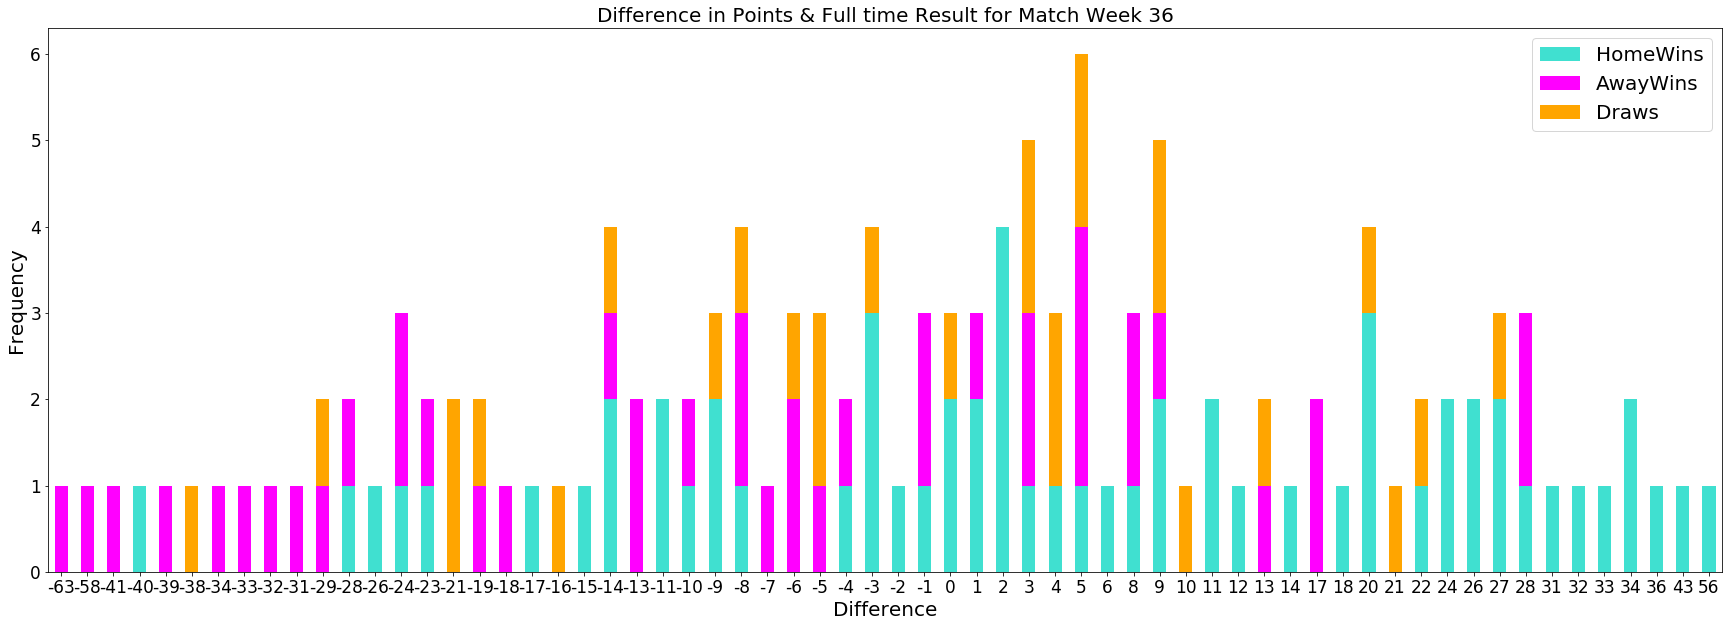

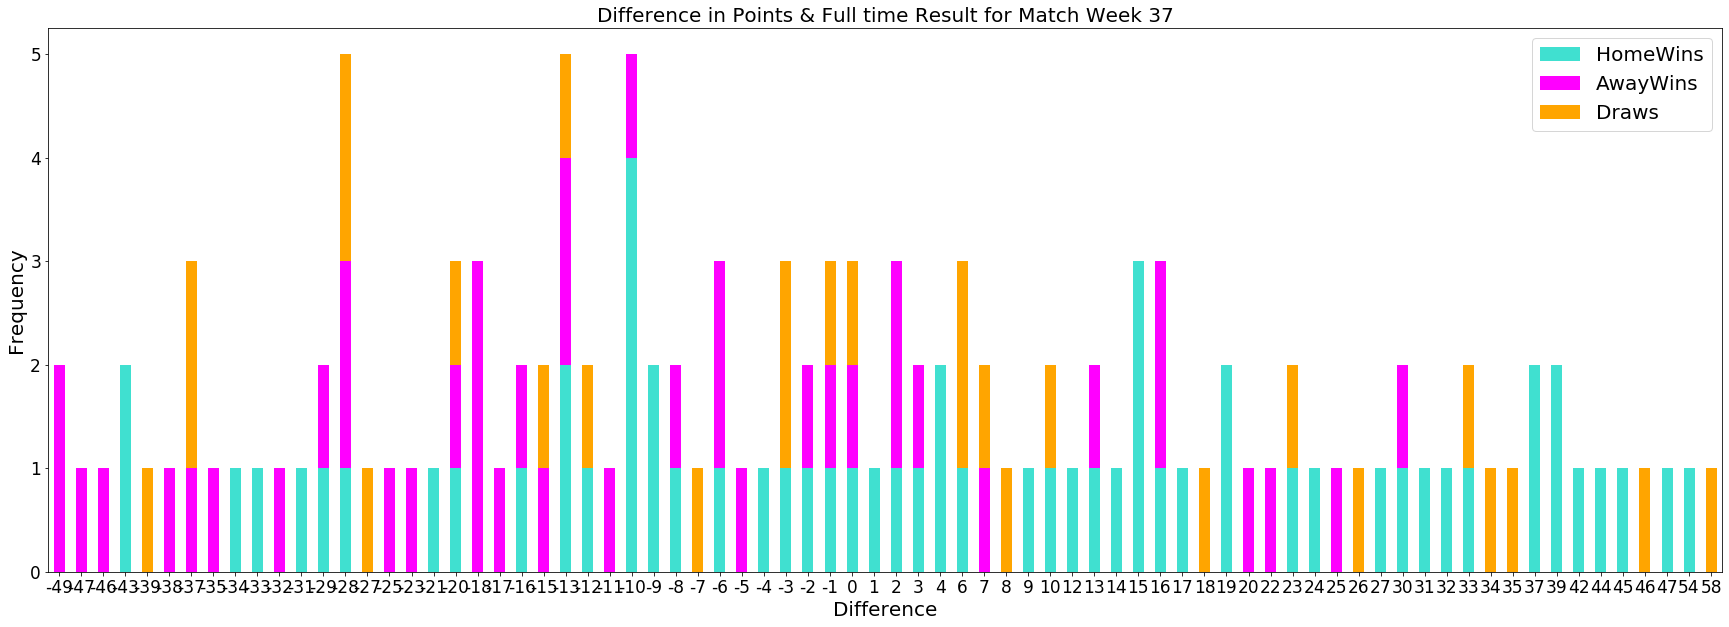

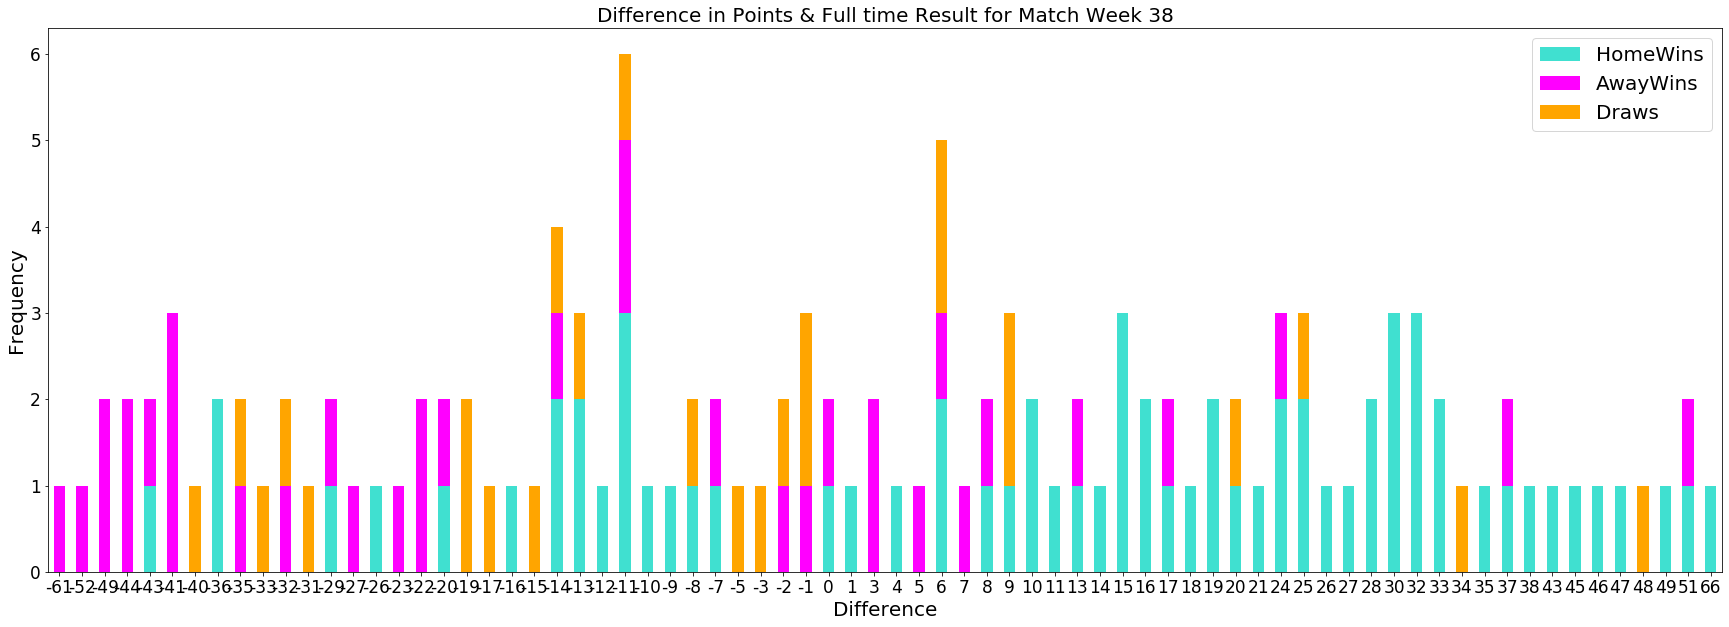

In [59]:
for i in range(2,39):
    # Creates dataframe from matchweeks dictionary
    df = pd.DataFrame(mw_dist[i], index=['HomeWins', 'AwayWins', 'Draws'])
    # Sorts dataframe by points difference
    df = df[sorted(df.columns)]

    # Plotting the obtained dataframe (plot for each match week)
    df.T.plot(kind='bar', stacked = True, figsize=[30,10], color = ['turquoise','magenta', 'orange'])
    plt.legend(loc=1,prop={'size':20})
    plt.title('Difference in Points & Full time Result for Match Week ' + str(i), size = 20)
    plt.xlabel('Difference', size =20)
    plt.ylabel('Frequency', size =20)
    plt.xticks(rotation=0)
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.tick_params(axis='both', which='minor', labelsize=17)

By scrolling through the graphs (match weeks), we can see that the difference in points is directly related to the outcome of the match. It can be seen that the bigger the positive difference (extreme right of x-axis), the more the Home Team wins and inversely, the bigger the negative difference (extreme left of x-axis), the more the Away Team wins. We can therefore conclude that the Teams points difference is a useful feature in predicting the Full Time Result and we will be using it in our model training.

### 4) Analysing how past head to head encounters affect probablity of winning

In this section, we will analyse how past head to head encounters affect the full time result of an incoming match. This represents the effect of the past matches played between two teams.

The first step in doing this is to create a dictionary will the team names as key and the opposing teams as values. Since a team can't play against itself, we need to add a condition to filter this out.

In [60]:
def get_head_to_head_dicts(playing_statistics):
    # Creates a dictionary with team names as keys and another dictionary as values.
    teams = set(playing_statistics.HomeTeam)
    head_to_head = {} # Stores the opposition teams for that particular team as keys and an empty list as its values.

    # Iterating through home teams
    for team in teams:
        for opp in teams:
            if team != opp:                       # A team can't play against itself
                if team not in head_to_head:
                    head_to_head[team] = {opp:[]}
                else:
                    if opp not in head_to_head[team]:   # Ensures one opposition is only added once
                        head_to_head[team][opp] = []
    return head_to_head, teams

The get_head_to_head_statistics function finds the matches encounters stats (home or away win, loss or draw) and adds it to a dictionary.

In [61]:
# Gets the head to head results for all teams in a given year
def get_head_to_head_statistics(playing_statistics):
    head_to_head, teams = get_head_to_head_dicts(playing_statistics)
    # Iterates through teams dictionary
    for team in head_to_head:
        for i in range(int(len(playing_statistics))):
            ht = playing_statistics.iloc[i].HomeTeam # home team
            at = playing_statistics.iloc[i].AwayTeam # away team
            res = playing_statistics.iloc[i].FTR # full time result
            if ht == team:
                if res == 'H':
                    head_to_head[team][at].append(['H', 'W'])
                elif res == 'A':
                    head_to_head[team][at].append(['H', 'L'])
                else:
                    head_to_head[team][at].append(['H', 'D'])

            elif at == team:
                if res == 'H':
                    head_to_head[team][ht].append(['A', 'L'])
                elif res == 'A':
                    head_to_head[team][ht].append(['A', 'W'])
                else:
                    head_to_head[team][ht].append(['A', 'D'])
    return head_to_head, teams

As an example, we can now apply the get_head_to_head_statistics function to playing statistics of year 2014, 2015, 2016 and 2017.

In [62]:
head_to_head_2014, teams_2014 = get_head_to_head_statistics(seasons_data_dictionary[2014])
head_to_head_2015, teams_2015 = get_head_to_head_statistics(seasons_data_dictionary[2015])
head_to_head_2016, teams_2016 = get_head_to_head_statistics(seasons_data_dictionary[2016])
head_to_head_2017, teams_2017 = get_head_to_head_statistics(seasons_data_dictionary[2017])

In [63]:
head_to_head_2017["Chelsea"]

{'Crystal Palace': [['A', 'L'], ['H', 'W']],
 'Swansea': [['H', 'W'], ['A', 'W']],
 'Bournemouth': [['A', 'W'], ['H', 'L']],
 'Arsenal': [['H', 'D'], ['A', 'D']],
 'Huddersfield': [['A', 'W'], ['H', 'D']],
 'Watford': [['H', 'W'], ['A', 'L']],
 'Southampton': [['H', 'W'], ['A', 'W']],
 'Man City': [['H', 'L'], ['A', 'L']],
 'Newcastle': [['H', 'W'], ['A', 'L']],
 'West Brom': [['A', 'W'], ['H', 'W']],
 'Stoke': [['A', 'W'], ['H', 'W']],
 'West Ham': [['A', 'L'], ['H', 'D']],
 'Man United': [['H', 'W'], ['A', 'L']],
 'Brighton': [['H', 'W'], ['A', 'W']],
 'Everton': [['H', 'W'], ['A', 'D']],
 'Burnley': [['H', 'L'], ['A', 'W']],
 'Leicester': [['A', 'W'], ['H', 'D']],
 'Liverpool': [['A', 'D'], ['H', 'W']],
 'Tottenham': [['A', 'W'], ['H', 'L']]}

The above dictionary is an example of the results and locations (Home or Away) of the head to head encounters of Chelsea in 2017.

Since different teams get qualified to play in the English Premier League every year, we need to only consider common teams that played in those four seasons (this is just for observation purposes).

In [64]:
# Get only teams which are common in these seasons
common_teams = teams_2014 & teams_2015 & teams_2016 & teams_2017

# Function to remove uncommon teams from head to head dictionary
def remove_uncommon_teams(head_to_head, teams, common_teams):
    teams_to_remove = set(teams) - common_teams
    teams = set(teams)

    # Removes entire records of teams which are not there in all years
    for team in teams_to_remove:
        head_to_head.pop(team)

    # Removes record of teams which aren't there in all years from records of teams which are there
    for team in (teams-teams_to_remove):
        for opp in teams_to_remove:
            head_to_head[team].pop(opp)
    return head_to_head

In [65]:
# Removes uncommon teams from head to head of each year.
head_to_head_common_2014 = remove_uncommon_teams(head_to_head_2014, teams_2014, common_teams)
head_to_head_common_2015 = remove_uncommon_teams(head_to_head_2015, teams_2015, common_teams)
head_to_head_common_2016 = remove_uncommon_teams(head_to_head_2016, teams_2016, common_teams)
head_to_head_common_2017 = remove_uncommon_teams(head_to_head_2017, teams_2017, common_teams)

We can now merge the head to head dictionaries:

In [66]:
def merge_dicts(dicts_to_merge):
    # Merge head to head dictionaries
    new_dict = dicts_to_merge[0]
    for s_dict in dicts_to_merge[1:]:
        for key in dicts_to_merge[0].keys():
            for team in dicts_to_merge[0][key].keys():
                new_dict[key][team] = new_dict[key][team] + s_dict[key][team]
    return new_dict

head_to_head_combined = merge_dicts([head_to_head_common_2014, head_to_head_common_2015,
                       head_to_head_common_2016, head_to_head_common_2017])

We then compute the head to head record (home or away win, loss, draw) for every encounter.

In [67]:
def get_head_to_head_record(head_to_head_combined):
    # Creates empty dictionary
    head_to_head_stats = {}
    teams = set(head_to_head_combined.keys())

    # Creates a dict with team names as keys and another dict of teams as values.
    for team in teams:
        head_to_head_stats[team] = {}

        for opp in teams:
            if opp != teams:
                head_to_head_stats[team][opp] = []

    # Loops through all the teams
    for team in teams:
        other_teams = teams - set([team])

        for opp in other_teams:
            results = head_to_head_combined[team][opp]

            # Creates dummy variables
            h_wins = 0
            h_losses = 0
            h_draws = 0
            awh_wins = 0
            awh_losses = 0
            awh_draws = 0
            total = len(results)
            
            # Looping through the results
            for result in results:
                side = result[0]
                res = result[1]
                if side == 'H': # home team
                    if res == 'W':
                        h_wins += 1
                    elif res == 'L':
                        h_losses += 1
                    else:
                        h_draws += 1
                if side == 'A': # away team
                    if res == 'W':
                        awh_wins += 1
                    elif res == 'L':
                        awh_losses += 1
                    else:
                        awh_draws += 1
                        
            head_to_head_stats[team][opp] = {(team +' Home Wins'):h_wins,('Home Losses'): h_losses, 'Home Draws':h_draws,
                                   (team + ' Away Wins'):awh_wins,'Away Losses':awh_losses,'Away Draws':awh_draws,
                                   'Total Matches':total}
    return head_to_head_stats

In [68]:
head_to_head_stats = get_head_to_head_record(head_to_head_combined)
head_to_head_stats["Man United"]["Arsenal"]

{'Man United Home Wins': 2,
 'Home Losses': 0,
 'Home Draws': 2,
 'Man United Away Wins': 2,
 'Away Losses': 2,
 'Away Draws': 0,
 'Total Matches': 8}

We can see above the stats of the previous head to head encounters of Man United and Arsenal.

The get_all_head_to_head_record function merges the past head to head record with the year required's result and returns a dataframe.

In [69]:
def get_all_head_to_head_record(head_to_head_stats, team, h2hc, year_of_h2hc):
    teams = set(head_to_head_stats.keys()) - set([team])
    df_dict = {}
    for some_team in teams:
        stat = head_to_head_stats[team][some_team]
        res = h2hc[team][some_team]
        stat[ res[0][0] ] = res[0][1]
        stat[ res[1][0] ] = res[1][1]
        df_dict[some_team] = stat
    df = pd.DataFrame(data=df_dict).T

    # Rename columns for h2hc_year
    df['Home Result of ' + year_of_h2hc] = df['H']
    df['Away Result of ' + year_of_h2hc] = df['A']

    # Reorder columns
    df.fillna(value= 'None')
    cols = [team +' Home Wins', 'Home Losses','Home Draws', 'Home Result of ' + year_of_h2hc,
            team + ' Away Wins', 'Away Losses', 'Away Draws', 'Total Matches', 'Away Result of ' + year_of_h2hc]
    df = df[cols]
    return df

In [70]:
head_to_head_2017_arsenal = get_all_head_to_head_record(head_to_head_stats, 'Arsenal', head_to_head_common_2017, '2017')
head_to_head_2017_mancity = get_all_head_to_head_record(head_to_head_stats, 'Man City', head_to_head_common_2017, '2017')
head_to_head_2017_manutd = get_all_head_to_head_record(head_to_head_stats, 'Man United', head_to_head_common_2017, '2017')

In [71]:
head_to_head_2017_mancity

,Man City Home Wins,Home Losses,Home Draws,Home Result of 2017,Man City Away Wins,Away Losses,Away Draws,Total Matches,Away Result of 2017
Everton,1,0,3,D,2,1,1,8,W
West Brom,4,0,0,W,4,0,0,8,W
Southampton,3,0,1,W,3,1,0,8,W
Stoke,2,1,1,W,3,1,0,8,W
Crystal Palace,4,0,0,W,2,1,1,8,D
Swansea,4,0,0,W,3,0,1,8,W
West Ham,3,1,0,W,2,1,1,8,W
Chelsea,2,1,1,W,2,1,1,8,W
Leicester,3,1,0,W,2,1,1,8,W
Arsenal,2,1,1,W,1,1,2,8,W


This newly created dataframe shows the encounters of Man City in 2017 with all the other teams. We can take a look at the home and away results of their encounters for the year.

Finally, we can convert these numbers into probabilities to obtain the final head to head encounters dataframe.

In [72]:
def get_head_to_head_prob(head_to_head, team, num_matches):
    cols = [team +' Home Wins', 'Home Losses', 'Home Draws', team + ' Away Wins', 'Away Losses', 'Away Draws']
    head_to_head.drop('Total Matches', axis=1, inplace=True)
    for column in cols:
        head_to_head[column] = head_to_head[column] / (num_matches/2)
    return head_to_head

In [73]:
get_head_to_head_prob(head_to_head_2017_mancity, 'Man City', 10)

,Man City Home Wins,Home Losses,Home Draws,Home Result of 2017,Man City Away Wins,Away Losses,Away Draws,Away Result of 2017
Everton,0.2,0,0.6,D,0.4,0.2,0.2,W
West Brom,0.8,0,0,W,0.8,0,0,W
Southampton,0.6,0,0.2,W,0.6,0.2,0,W
Stoke,0.4,0.2,0.2,W,0.6,0.2,0,W
Crystal Palace,0.8,0,0,W,0.4,0.2,0.2,D
Swansea,0.8,0,0,W,0.6,0,0.2,W
West Ham,0.6,0.2,0,W,0.4,0.2,0.2,W
Chelsea,0.4,0.2,0.2,W,0.4,0.2,0.2,W
Leicester,0.6,0.2,0,W,0.4,0.2,0.2,W
Arsenal,0.4,0.2,0.2,W,0.2,0.2,0.4,W


This dataframe shows the probability of winning, losing or drawing for Man City against the other teams of the season.

By taking a look at the probability of the home and away results for the head-to-head encounters between the two teams, we can clearly see a correlation between the effect of the past encounters.

In conclusion, we can see that the past head to head encounters between two teams clearly affect the outcome of the next played match. We can use this feature for the traning part.

### _4. Methodology Overview_
----------------------
In this section, we will walk through the creation of the training and prediction dataframes by adding the features that were analysed in the Data Exploration section. We also use a heat map to show the correlation between the different chosen features to show that they are the best possible.

All background reading can be found in the References Section.

### Creating the training dataframe

We start by using the `seasons_data_dictionary` obtained at the beginning. This dictionary stores gameplay informations dataframe for each season. The format of the dataframe looks like this:

In [74]:
seasons_data_dictionary[2018].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2018-08-10,Man United,Leicester,2,1,H
1,2018-08-11,Bournemouth,Cardiff,2,0,H
2,2018-08-11,Fulham,Crystal Palace,0,2,A
3,2018-08-11,Huddersfield,Chelsea,0,3,A
4,2018-08-11,Newcastle,Tottenham,1,2,A


The first step is to gather the information related to gameplay and transform it into trainable features for the train dataframe. We start by retreiving the goals scored and conceded for every team and season.

In [75]:
# Returns the goals scored filtered by team and by matchweek
def get_goals_scored(playing_statistics):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_statistics.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # Iterates through dictionary
    for i in range(len(playing_statistics)):
        HTGS = playing_statistics.iloc[i]['FTHG']
        ATGS = playing_statistics.iloc[i]['FTAG']
        teams[playing_statistics.iloc[i].HomeTeam].append(HTGS)
        teams[playing_statistics.iloc[i].AwayTeam].append(ATGS)

    # Create a dataframe for goals scored where rows are teams and columns are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,int(len(playing_statistics) / 10 + 1))]).T
    GoalsScored[0] = 0

    # Aggregate to get uptil that point
    for i in range(2, int(len(playing_statistics) / 10 + 1)):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

In [76]:
# Returns the goals conceded filtered by team and matchweek
def get_goals_conceded(playing_statistics):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_statistics.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # Iterates through dictionary
    for i in range(len(playing_statistics)):
        ATGC = playing_statistics.iloc[i]['FTHG']
        HTGC = playing_statistics.iloc[i]['FTAG']
        teams[playing_statistics.iloc[i].HomeTeam].append(HTGC)
        teams[playing_statistics.iloc[i].AwayTeam].append(ATGC)

    # Create a dataframe for goals conceded where rows are teams and columns are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,int(len(playing_statistics) / 10 + 1))]).T
    GoalsConceded[0] = 0

    # Aggregate to get uptil that point
    for i in range(2, int(len(playing_statistics) /10 + 1)):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

We can now aggregate the results of these two functions (`get_goals_scored` and `get_goals_conceded`), add them to lists and finally create the corresponding columns in our dataframe.

In [77]:
def get_overall_goals(playing_statistics):
    # Gets goals scored
    goals_scored = get_goals_scored(playing_statistics)
    # Gets goals conceded
    goals_conceded = get_goals_conceded(playing_statistics)

    j = 0
    # Creates empty lists
    home_team_goals_scored = []
    away_team_goals_scored = []
    home_team_goals_conceded = []
    away_team_goals_conceded = []

    # Iterates through playing statistics
    for i in range(int(len(playing_statistics))):
        ht = playing_statistics.iloc[i].HomeTeam
        at = playing_statistics.iloc[i].AwayTeam
        home_team_goals_scored.append(goals_scored.loc[ht][j])
        away_team_goals_scored.append(goals_scored.loc[at][j])
        home_team_goals_conceded.append(goals_conceded.loc[ht][j])
        away_team_goals_conceded.append(goals_conceded.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1

    # Creates appropriate columns in dataframe
    playing_statistics['HTGS'] = home_team_goals_scored
    playing_statistics['ATGS'] = away_team_goals_scored
    playing_statistics['HTGC'] = home_team_goals_conceded
    playing_statistics['ATGC'] = away_team_goals_conceded

    return playing_statistics

We can apply this function to the season's dataframes:

In [78]:
# Apply function to dictionary's dataframes
for key in seasons_data_dictionary:
    get_overall_goals(seasons_data_dictionary[key])

/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [79]:
seasons_data_dictionary[2017].tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
375,2018-05-13,Newcastle,Chelsea,3,0,H,36,62,47,35
376,2018-05-13,Southampton,Man City,0,1,A,37,105,55,27
377,2018-05-13,Swansea,Stoke,1,2,A,27,33,54,67
378,2018-05-13,Tottenham,Leicester,5,4,H,69,52,32,55
379,2018-05-13,West Ham,Everton,3,1,H,45,43,67,55


We can notice the four additional columns that got added to this dataframe that represent:
- HTGS: home team goals scored
- ATGS: away team goals scored
- HTGC: home team goals conceded
- ATGC: away team goals conceded

The `get_matches` function is used to find all the matches results for the match weeks of the season for each team.

In [80]:
def get_matches(playing_statistics):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_statistics.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_statistics)):
        if playing_statistics.iloc[i].FTR == 'H': # Home team
            teams[playing_statistics.iloc[i].HomeTeam].append('W')
            teams[playing_statistics.iloc[i].AwayTeam].append('L')
        elif playing_statistics.iloc[i].FTR == 'A': # Away team
            teams[playing_statistics.iloc[i].AwayTeam].append('W')
            teams[playing_statistics.iloc[i].HomeTeam].append('L')
        else: # Draw
            teams[playing_statistics.iloc[i].AwayTeam].append('D')
            teams[playing_statistics.iloc[i].HomeTeam].append('D')
            
    # Number of matches played is different for 2018-2019 season (unfinished)
    return pd.DataFrame(data=teams, index = [i for i in range(1,int(len(playing_statistics) / 10 + 1))]).T

In [81]:
get_matches(seasons_data_dictionary[2017]).head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Arsenal,W,L,L,W,D,W,W,L,W,W,...,L,W,W,W,L,W,L,W,L,W
Bournemouth,L,L,L,L,W,L,D,L,W,L,...,D,L,W,D,D,L,L,L,W,W
Brighton,L,L,D,W,L,W,L,D,W,D,...,W,L,L,D,L,D,D,W,L,L
Burnley,W,L,D,W,D,D,W,D,L,W,...,W,W,W,W,W,L,D,D,L,L
Chelsea,L,W,W,W,D,W,L,L,W,W,...,L,W,L,D,W,W,W,W,D,L


The `compute_point_system` function is used to add two new columns to the dataframe: 
- HTP: Home Team Points 
- ATP: Away Team Points 

In [82]:
def compute_point_system(playing_statistics):
    # Get matches
    matches = get_matches(playing_statistics)
    # Get points
    overall_pts = get_overall_points(matches)
    # Empty lists for locations
    HTP = []
    ATP = []
    j = 0
    for i in range(int(len(playing_statistics))):
        home_team = playing_statistics.iloc[i].HomeTeam
        away_team = playing_statistics.iloc[i].AwayTeam
        HTP.append(overall_pts.loc[home_team][j])
        ATP.append(overall_pts.loc[away_team][j])

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_statistics['HTP'] = HTP
    playing_statistics['ATP'] = ATP
    return playing_statistics

In [83]:
# Apply function to dictionary's datasets
for key in seasons_data_dictionary:
    seasons_data_dictionary[key] = compute_point_system(seasons_data_dictionary[key])

seasons_data_dictionary[2017].tail()

/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
375,2018-05-13,Newcastle,Chelsea,3,0,H,36,62,47,35,41,70
376,2018-05-13,Southampton,Man City,0,1,A,37,105,55,27,36,97
377,2018-05-13,Swansea,Stoke,1,2,A,27,33,54,67,33,30
378,2018-05-13,Tottenham,Leicester,5,4,H,69,52,32,55,74,47
379,2018-05-13,West Ham,Everton,3,1,H,45,43,67,55,39,49


As it was showed in the Data Transformation and Exploration section, the outcomes of the past n matches largely affect the result of the upcoming match. The `get_team_form`, `add_team_form` and `add_form_to_dataframe` functions retrieves information about the previous 3 matches and add its to the training dataframe.

In [84]:
# Gets team form
def get_team_form(playing_statistics, num):
    # Get matches
    form = get_matches(playing_statistics)
    form_final = form.copy()
    # Iterates through matches
    for i in range(num,int(len(playing_statistics) / 10 + 1)):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1
    return form_final

def add_team_form(playing_statistics, num):
    form = get_team_form(playing_statistics,num)
    home = ['M' for i in range(num * 10)]
    away = ['M' for i in range(num * 10)]

    j = num
    # number of matchweeks is different for 2018-2019 season
    for i in range((num*10), int(len(playing_statistics))):
        home_team = playing_statistics.iloc[i].HomeTeam
        away_team = playing_statistics.iloc[i].AwayTeam

        # Get past n results for home and away teams
        past = form.loc[home_team][j]
        home.append(past[num-1])
        past = form.loc[away_team][j]
        away.append(past[num-1])

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_statistics['HM' + str(num)] = home
    playing_statistics['AM' + str(num)] = away

    return playing_statistics

# Adds form to dataframe
def add_form_to_dataframe(playing_statistics):
    # adding team form for past 5 matches
    playing_statistics = add_team_form(playing_statistics, 1)
    playing_statistics = add_team_form(playing_statistics, 2)
    playing_statistics = add_team_form(playing_statistics, 3)
    return playing_statistics

# Apply function to dictionary's datasets
for key in seasons_data_dictionary:
    seasons_data_dictionary[key] = add_form_to_dataframe(seasons_data_dictionary[key])

/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/saket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
seasons_data_dictionary[2017].tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3
375,2018-05-13,Newcastle,Chelsea,3,0,H,36,62,47,35,41,70,L,D,L,W,L,W
376,2018-05-13,Southampton,Man City,0,1,A,37,105,55,27,36,97,W,W,D,D,W,W
377,2018-05-13,Swansea,Stoke,1,2,A,27,33,54,67,33,30,L,L,L,D,L,D
378,2018-05-13,Tottenham,Leicester,5,4,H,69,52,32,55,74,47,W,W,L,L,W,L
379,2018-05-13,West Ham,Everton,3,1,H,45,43,67,55,39,49,D,D,W,W,L,W


We can now reaarange the columns to be: 
- Date
- HomeTeam
- AwayTeam
- FTHG: full time home goals
- FTAG: full time away goals
- FTR: full time result
- HTGS: home team goals scored
- ATGS: away team goals scored
- HTGC: home team goals conceded
- ATGC: away team goals conceded
- HTP: home team points
- ATP: away team points
- HM #n: past home match n
- AM #n: past away match n

In [86]:
rearranged_columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3']

# Apply columns to dictionary's datasets
for key in seasons_data_dictionary:
    seasons_data_dictionary[key] = seasons_data_dictionary[key][rearranged_columns]

In [87]:
seasons_data_dictionary[2017].tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3
375,2018-05-13,Newcastle,Chelsea,3,0,H,36,62,47,35,41,70,L,L,L,D,W,W
376,2018-05-13,Southampton,Man City,0,1,A,37,105,55,27,36,97,W,D,W,W,D,W
377,2018-05-13,Swansea,Stoke,1,2,A,27,33,54,67,33,30,L,L,L,L,D,D
378,2018-05-13,Tottenham,Leicester,5,4,H,69,52,32,55,74,47,W,L,W,W,L,L
379,2018-05-13,West Ham,Everton,3,1,H,45,43,67,55,39,49,D,W,L,D,W,W


The next step is to find a team's last year's EPL standing (where they finished the season in the previous year).

The `get_last_year_position` function iterates through seasons dataframes and adds two new columns:

- HTLP: home team last position 
- ATLP: away team last position 

In [88]:
def get_last_year_position(playing_statistics, previous_standings_data, year):
    # Creates empty list for last positions
    home_team_last_position = []
    away_team_last_position = []

    # Iterates through seasons data dictionary
    for i in range(int(len(playing_statistics))):
        home_team = playing_statistics.iloc[i].HomeTeam
        away_team = playing_statistics.iloc[i].AwayTeam
        home_team_last_position.append(previous_standings_data.loc[home_team][year])
        away_team_last_position.append(previous_standings_data.loc[away_team][year])
    # Adds last year standing to dataframe
    playing_statistics['HTLP'] = home_team_last_position
    playing_statistics['ATLP'] = away_team_last_position

    return playing_statistics

We can now apply this function to our training dataframe which is being slowly constructed (Doing it recursively was computationally expensive so preferred to do it manually).

In [89]:
# Apply function to dictionary's datasets
seasons_data_dictionary[2005] = get_last_year_position(seasons_data_dictionary[2005], previous_standings_data, 0)
seasons_data_dictionary[2006] = get_last_year_position(seasons_data_dictionary[2006], previous_standings_data, 1)
seasons_data_dictionary[2007] = get_last_year_position(seasons_data_dictionary[2007], previous_standings_data, 2)
seasons_data_dictionary[2008] = get_last_year_position(seasons_data_dictionary[2008], previous_standings_data, 3)
seasons_data_dictionary[2009] = get_last_year_position(seasons_data_dictionary[2009], previous_standings_data, 4)
seasons_data_dictionary[2010] = get_last_year_position(seasons_data_dictionary[2010], previous_standings_data, 5)
seasons_data_dictionary[2011] = get_last_year_position(seasons_data_dictionary[2011], previous_standings_data, 6)
seasons_data_dictionary[2012] = get_last_year_position(seasons_data_dictionary[2012], previous_standings_data, 7)
seasons_data_dictionary[2013] = get_last_year_position(seasons_data_dictionary[2013], previous_standings_data, 8)
seasons_data_dictionary[2014] = get_last_year_position(seasons_data_dictionary[2014], previous_standings_data, 9)
seasons_data_dictionary[2015] = get_last_year_position(seasons_data_dictionary[2015], previous_standings_data, 10)
seasons_data_dictionary[2016] = get_last_year_position(seasons_data_dictionary[2016], previous_standings_data, 11)
seasons_data_dictionary[2017] = get_last_year_position(seasons_data_dictionary[2017], previous_standings_data, 12)
seasons_data_dictionary[2018] = get_last_year_position(seasons_data_dictionary[2018], previous_standings_data, 13)

Our traning dataframe now looks like:

In [90]:
seasons_data_dictionary[2017].tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTLP,ATLP
375,2018-05-13,Newcastle,Chelsea,3,0,H,36,62,47,35,41,70,L,L,L,D,W,W,10.0,5.0
376,2018-05-13,Southampton,Man City,0,1,A,37,105,55,27,36,97,W,D,W,W,D,W,17.0,1.0
377,2018-05-13,Swansea,Stoke,1,2,A,27,33,54,67,33,30,L,L,L,L,D,D,18.0,19.0
378,2018-05-13,Tottenham,Leicester,5,4,H,69,52,32,55,74,47,W,L,W,W,L,L,3.0,9.0
379,2018-05-13,West Ham,Everton,3,1,H,45,43,67,55,39,49,D,W,L,D,W,W,13.0,8.0


The next step is to gather the matchweek. The `get_matchweek` function adds a new column, "MW", matchweek, do the dataframe. This is useful in order to compute the past matches that have been played (for later).

In [91]:
def get_matchweek(playing_statistics):
    j = 1
    # Creates empty list to store match week
    MatchWeek = []
    # Iterating through
    for i in range(int(len(playing_statistics))):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    # Adds matchweek column to dataframe
    playing_statistics['MW'] = MatchWeek
    return playing_statistics

In [92]:
# Apply function to dictionary's datasets
for key in seasons_data_dictionary:
    seasons_data_dictionary[key] = get_matchweek(seasons_data_dictionary[key])

We can now concatenate all seasons:

In [93]:
# Obtaining final DataFrame (all seasons)
all_seasons = []
for key in seasons_data_dictionary:
    all_seasons.append(seasons_data_dictionary[key])

playing_statistics = pd.concat(all_seasons, ignore_index=True)

In [94]:
playing_statistics.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTLP,ATLP,MW
0,2005-08-13,Aston Villa,Bolton,2,2,D,0,0,0,0,...,0,M,M,M,M,M,M,10.0,6.0,1
1,2005-08-13,Everton,Man United,0,2,A,0,0,0,0,...,0,M,M,M,M,M,M,4.0,3.0,1
2,2005-08-13,Fulham,Birmingham,0,0,D,0,0,0,0,...,0,M,M,M,M,M,M,13.0,12.0,1
3,2005-08-13,Man City,West Brom,0,0,D,0,0,0,0,...,0,M,M,M,M,M,M,8.0,17.0,1
4,2005-08-13,Middlesbrough,Liverpool,0,0,D,0,0,0,0,...,0,M,M,M,M,M,M,7.0,5.0,1


The `get_form_points` function is used to convert the previous matches standings into string for better manipulation.

In [95]:
# Gets overall form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_match_point(letter)
    return sum

In [96]:
# Converting form point to string for manipulation
playing_statistics['HTFormPtsStr'] = playing_statistics['HM1'] + playing_statistics['HM2'] + playing_statistics['HM3']
playing_statistics['ATFormPtsStr'] = playing_statistics['AM1'] + playing_statistics['AM2'] + playing_statistics['AM3']

playing_statistics['HTFormPts'] = playing_statistics['HTFormPtsStr'].apply(get_form_points)
playing_statistics['ATFormPts'] = playing_statistics['ATFormPtsStr'].apply(get_form_points)

Finally, as it has been showed in the Data Exploration part, previous wins / loss streaks are important in predicting the outcome of the current match. The below functions are used to identify these streaks:

In [97]:
# Identify Win/Loss Streaks:

def get_3_wins_streak(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0

def get_3_loss_streak(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0

We can now add these streaks as columns to the dataframe:

In [98]:
# Adding streaks columns to final dataframe

playing_statistics['HTWinStreak3'] = playing_statistics['HTFormPtsStr'].apply(get_3_wins_streak)
playing_statistics['HTLossStreak3'] = playing_statistics['HTFormPtsStr'].apply(get_3_loss_streak)

playing_statistics['ATWinStreak3'] = playing_statistics['ATFormPtsStr'].apply(get_3_wins_streak)
playing_statistics['ATLossStreak3'] = playing_statistics['ATFormPtsStr'].apply(get_3_loss_streak)

The dataframe now looks like:

In [99]:
playing_statistics.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,ATLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTLossStreak3,ATWinStreak3,ATLossStreak3
5135,2018-12-29,Watford,Newcastle,1,1,D,26,14,27,26,...,15.0,20,LWW,LDW,6,4,0,0,0,0
5136,2018-12-30,Burnley,West Ham,2,0,H,17,27,41,28,...,11.0,20,LLL,WLW,0,6,0,1,0,0
5137,2018-12-30,Crystal Palace,Chelsea,0,1,A,17,37,25,16,...,4.0,20,DWW,WLW,7,6,0,0,0,0
5138,2018-12-30,Man United,Bournemouth,4,1,H,37,27,31,33,...,12.0,20,WWL,LWL,6,3,0,0,0,0
5139,2018-12-30,Southampton,Man City,1,3,A,20,51,35,15,...,3.0,20,LWW,LLW,6,3,0,0,0,0


Since we need to predict the outcome of an encounter (one team versus another), it is useful to add features about the differences between the two teams.

This can take the form of goals difference, points difference and last year's position difference.

In [100]:
# Gets Goals Difference (scored and conceded)
playing_statistics['HTGD'] = playing_statistics['HTGS'] - playing_statistics['HTGC']
playing_statistics['ATGD'] = playing_statistics['ATGS'] - playing_statistics['ATGC']

# Gets points difference
playing_statistics['DiffPts'] = playing_statistics['HTP'] - playing_statistics['ATP']
playing_statistics['DiffFormPts'] = playing_statistics['HTFormPts'] - playing_statistics['ATFormPts']

# Gets last year position's difference
playing_statistics['DiffLP'] = playing_statistics['HTLP'] - playing_statistics['ATLP']

We then scale these columns by matchweek:

In [101]:
# Scales DiffPts , DiffFormPts, HTGD, ATGD by matchweek
matchweek_cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_statistics.MW = playing_statistics.MW.astype(float)

for col in matchweek_cols:
    playing_statistics[col] = playing_statistics[col] / playing_statistics.MW
playing_statistics

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,ATFormPts,HTWinStreak3,HTLossStreak3,ATWinStreak3,ATLossStreak3,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,2005-08-13,Aston Villa,Bolton,2,2,D,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,4.0
1,2005-08-13,Everton,Man United,0,2,A,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,1.0
2,2005-08-13,Fulham,Birmingham,0,0,D,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,1.0
3,2005-08-13,Man City,West Brom,0,0,D,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,-9.0
4,2005-08-13,Middlesbrough,Liverpool,0,0,D,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,2018-12-29,Watford,Newcastle,1,1,D,26,14,27,26,...,4,0,0,0,0,-0.05,-0.60,0.50,0.10,-6.0
5136,2018-12-30,Burnley,West Ham,2,0,H,17,27,41,28,...,6,0,1,0,0,-1.20,-0.05,-0.75,-0.30,7.0
5137,2018-12-30,Crystal Palace,Chelsea,0,1,A,17,37,25,16,...,6,0,0,0,0,-0.40,1.05,-1.05,0.05,10.0
5138,2018-12-30,Man United,Bournemouth,4,1,H,37,27,31,33,...,3,0,0,0,0,0.30,-0.30,0.30,0.15,-6.0


We now need to remove some redundant columns from the dataframe. These columns were used to compute other important features and are not essential for the training of our model since they are really correlated to other features in the dataframe. 

In [102]:
# Remove unwanted columns
playing_statistics.drop(['MW', 'HTFormPtsStr',
 'ATFormPtsStr', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC','DiffPts','HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

Our final training dataframe now looks like:

In [103]:
playing_statistics.head()

,Date,HomeTeam,AwayTeam,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTLP,ATLP,HTFormPts,ATFormPts,HTGD,ATGD,DiffFormPts,DiffLP
0,2005-08-13,Aston Villa,Bolton,D,0.0,0.0,M,M,M,M,M,M,10.0,6.0,0,0,0.0,0.0,0.0,4.0
1,2005-08-13,Everton,Man United,A,0.0,0.0,M,M,M,M,M,M,4.0,3.0,0,0,0.0,0.0,0.0,1.0
2,2005-08-13,Fulham,Birmingham,D,0.0,0.0,M,M,M,M,M,M,13.0,12.0,0,0,0.0,0.0,0.0,1.0
3,2005-08-13,Man City,West Brom,D,0.0,0.0,M,M,M,M,M,M,8.0,17.0,0,0,0.0,0.0,0.0,-9.0
4,2005-08-13,Middlesbrough,Liverpool,D,0.0,0.0,M,M,M,M,M,M,7.0,5.0,0,0,0.0,0.0,0.0,2.0


In order to analyse the correlation between our selected features, we can use a Seaborn heatmap to show the pearson correlation between the different features. It used to determine the correlation level between two variables. If the correlation is high, these features are tightly linked to each other and thus redundant: they offer no adittional information (we can see a perfect correlation on the diagonal which represents the correlation between a feature and itself).

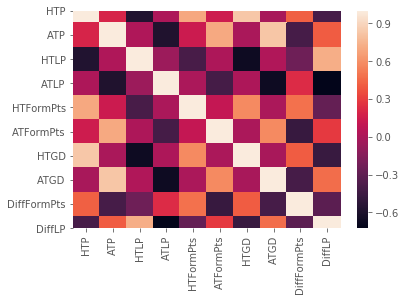

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.heatmap(playing_statistics.corr())
plt.show()

The heatmap verifies that we can use the selected features for our training phase since the correlation is mininmal to null between the features.

We can finally copy the final last ten rows of the traning dataframe: they correspond to the last match played by each of the teams in the 2018-2019 last season and are useful in order to create our testing set.

In [105]:
# Gets last season data from final dataframe
def filter_last_season(dataset):
    current_annual_data = dataset[dataset['Date'].dt.year == 2018]
    current_annual_data = current_annual_data[(current_annual_data['Date'].dt.month >= 8)]
    return current_annual_data

playing_statistics_2018_2019 = filter_last_season(playing_statistics).tail(10)

In [106]:
playing_statistics_2018_2019

,Date,HomeTeam,AwayTeam,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTLP,ATLP,HTFormPts,ATFormPts,HTGD,ATGD,DiffFormPts,DiffLP
5130,2018-12-29,Brighton,Everton,H,1.10,1.35,D,L,L,W,L,L,13.0,10.0,1,3,-0.30,0.10,-0.10,3.0
5131,2018-12-29,Fulham,Huddersfield,H,0.55,0.50,D,D,L,L,L,L,19.0,20.0,2,0,-1.30,-1.10,0.10,-1.0
5132,2018-12-29,Leicester,Cardiff,A,1.40,0.75,W,W,L,D,L,L,7.0,16.0,6,1,0.10,-1.00,0.25,-9.0
5133,2018-12-29,Liverpool,Arsenal,H,2.55,1.90,W,W,W,D,W,L,1.0,5.0,9,4,1.80,0.80,0.25,-4.0
5134,2018-12-29,Tottenham,Wolves,A,2.25,1.30,W,W,W,D,L,W,2.0,18.0,9,4,1.20,-0.10,0.25,-16.0
5135,2018-12-29,Watford,Newcastle,D,1.35,0.85,L,W,W,L,D,W,9.0,15.0,6,4,-0.05,-0.60,0.10,-6.0
5136,2018-12-30,Burnley,West Ham,H,0.60,1.35,L,L,L,W,L,W,18.0,11.0,0,6,-1.20,-0.05,-0.30,7.0
5137,2018-12-30,Crystal Palace,Chelsea,A,0.95,2.00,D,W,W,W,L,W,14.0,4.0,7,6,-0.40,1.05,0.05,10.0
5138,2018-12-30,Man United,Bournemouth,H,1.60,1.30,W,W,L,L,W,L,6.0,12.0,6,3,0.30,-0.30,0.15,-6.0
5139,2018-12-30,Southampton,Man City,A,0.75,2.20,L,W,W,L,L,W,17.0,3.0,6,3,-0.75,1.80,0.15,14.0


We now need to remove the last ten rows from the training dataframe since they will be used for testing as well as some non-necessary features.

In [107]:
playing_statistics.drop(playing_statistics.tail(10).index, inplace=True) # removing last ten rows since they are used for testing
playing_statistics.drop(['HomeTeam', 'AwayTeam', 'Date', 'HTLP', 'HTFormPts', 'ATLP', 'ATFormPts'],1, inplace=True)

Finally, we can export the training dataframe as a csv file in order to make sure that everything is all right.

In [108]:
# Export final training dataframe as csv
playing_statistics.to_csv("Data/epl-training-final.csv")

### Creating the prediction dataframe

After having finished building the training set, we can start building the testing dataframe by using the testing file provided (3 columns) and adding all the missing features as shown above.

In [109]:
import collections

We need to import the test file provided:

In [111]:
# Import test file with teams that play on the weekend of the 12th of Jan 2019
prediction_data = pd.read_csv("Data/epl-test.csv")

In [112]:
prediction_data

,Date,HomeTeam,AwayTeam
0,12 Jan 19,Brighton,Liverpool
1,12 Jan 19,Burnley,Fulham
2,12 Jan 19,Cardiff,Huddersfield
3,12 Jan 19,Chelsea,Newcastle
4,12 Jan 19,Crystal Palace,Watford
5,12 Jan 19,Everton,Bournemouth
6,12 Jan 19,Leicester,Southampton
7,12 Jan 19,Man City,Wolves
8,12 Jan 19,Tottenham,Man United
9,12 Jan 19,West Ham,Arsenal


We can see that this testing dataset lacks all the necessary features that we found to be useful in the data observation and training data building.

The first step is to find the List of the teams that are playing on the weekend of the 12th of January:

In [113]:
# Find teams list (teams that play on testing weekend)
teamList = prediction_data["HomeTeam"].tolist() + prediction_data["AwayTeam"].tolist()

In [114]:
teamList

['Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Man City',
 'Tottenham',
 'West Ham',
 'Liverpool',
 'Fulham',
 'Huddersfield',
 'Newcastle',
 'Watford',
 'Bournemouth',
 'Southampton',
 'Wolves',
 'Man United',
 'Arsenal']

We now need to transform dataframe data into desired features for testing:

The `extract_features` function extracts data from specific columns from the 2018-2019 playing statistics and returns them as a list.

In [115]:
def extract_features(dataset, team):
    # Iterating through rows of dataset
    for row in dataset.itertuples():
        if dataset.loc[row.Index, "HomeTeam"] == team:
            total_points = dataset.loc[row.Index, "HTP"]
            M1 = dataset.loc[row.Index, "HM1"]
            M2 = dataset.loc[row.Index, "HM2"]
            M3 = dataset.loc[row.Index, "HM3"]
            TGD = dataset.loc[row.Index, "HTGD"]
            form_points = dataset.loc[row.Index, "HTFormPts"]
            last_year_position = dataset.loc[row.Index, "HTLP"]

        if dataset.loc[row.Index, "AwayTeam"] == team:
            total_points = dataset.loc[row.Index, "ATP"]
            M1 = dataset.loc[row.Index, "AM1"]
            M2 = dataset.loc[row.Index, "AM2"]
            M3 = dataset.loc[row.Index, "AM3"]
            TGD = dataset.loc[row.Index, "ATGD"]
            form_points = dataset.loc[row.Index, "ATFormPts"]
            last_year_position = dataset.loc[row.Index, "ATLP"]

    return [total_points, M1, M2, M3, TGD, form_points, last_year_position]

We can now create a dictionary where all the extracted features (desired ones) are added for every team that is playing in the 2018-2019 season.

In [116]:
# Creates dictionary that stores features for each team
lst = lambda:list()
team_stats = collections.defaultdict(lst)
for team in teamList:
    team_vector = extract_features(playing_statistics_2018_2019, team)
    team_stats[team] = team_vector
team_stats

defaultdict(<function __main__.<lambda>()>,
            {'Brighton': [1.1, 'D', 'L', 'L', -0.3, 1, 13.0],
             'Burnley': [0.6, 'L', 'L', 'L', -1.2, 0, 18.0],
             'Cardiff': [0.75, 'D', 'L', 'L', -1.0, 1, 16.0],
             'Chelsea': [2.0, 'W', 'L', 'W', 1.05, 6, 4.0],
             'Crystal Palace': [0.95, 'D', 'W', 'W', -0.4, 7, 14.0],
             'Everton': [1.35, 'W', 'L', 'L', 0.1, 3, 10.0],
             'Leicester': [1.4, 'W', 'W', 'L', 0.1, 6, 7.0],
             'Man City': [2.2, 'L', 'L', 'W', 1.8, 3, 3.0],
             'Tottenham': [2.25, 'W', 'W', 'W', 1.2, 9, 2.0],
             'West Ham': [1.35, 'W', 'L', 'W', -0.05, 6, 11.0],
             'Liverpool': [2.55, 'W', 'W', 'W', 1.8, 9, 1.0],
             'Fulham': [0.55, 'D', 'D', 'L', -1.3, 2, 19.0],
             'Huddersfield': [0.5, 'L', 'L', 'L', -1.1, 0, 20.0],
             'Newcastle': [0.85, 'L', 'D', 'W', -0.6, 4, 15.0],
             'Watford': [1.35, 'L', 'W', 'W', -0.05, 6, 9.0],
             'Bourn

Having extracted all the desired information for every team, we can now fill the testing dataset: 

We first start by adding the missing features (total points, previous matches outcomes, total goals difference) for the home team:

In [117]:
# Fill test dataset
def add_home_missing_features(row):
    # Iterates through teams
    for team in team_stats:
        # Takes home team
        if row.HomeTeam == team:
            total_points = (team_stats[team])[0]
            match_1 = (team_stats[team])[1]
            match_2 = (team_stats[team])[2]
            match_3 = (team_stats[team])[3]
            total_goals_difference = (team_stats[team])[4]
            return [total_points, match_1, match_2, match_3, total_goals_difference]

Then for the away team:

In [118]:
def add_away_missing_features(row):
    # Iterates through teams
    for team in team_stats:
        # Takes away team
        if row.AwayTeam == team:
            total_points = (team_stats[team])[0]
            match_1 = (team_stats[team])[1]
            match_2 = (team_stats[team])[2]
            match_3 = (team_stats[team])[3]
            total_goals_difference = (team_stats[team])[4]
            return [total_points, match_1, match_2, match_3, total_goals_difference]

Finally, we can add the common missing features between the home and away teams (form points and last year positions difference) :

In [119]:
def add_common_missing_features(row):
    home_team = row.HomeTeam
    away_team = row.AwayTeam

    # Computes form points and last year positions difference
    diff_form_points = team_stats[home_team][5] - team_stats[away_team][5]
    diff_last_year_position = team_stats[home_team][6] - team_stats[away_team][6]

    return [diff_form_points, diff_last_year_position]

We can then fill our test dataframe provided (3 columns) with the extracted features that are important for testing (12 more features).

In [120]:
# Fills prediction dataset
prediction_data["HTP"] = prediction_data.apply(lambda row: (add_home_missing_features(row))[0],axis=1)
prediction_data["ATP"] = prediction_data.apply(lambda row: (add_away_missing_features(row))[0],axis=1)
prediction_data["HM1"] = prediction_data.apply(lambda row: (add_home_missing_features(row))[1],axis=1)
prediction_data["HM2"] = prediction_data.apply(lambda row: (add_home_missing_features(row))[2],axis=1)
prediction_data["HM3"] = prediction_data.apply(lambda row: (add_home_missing_features(row))[3],axis=1)
prediction_data["AM1"] = prediction_data.apply(lambda row: (add_away_missing_features(row))[1],axis=1)
prediction_data["AM2"] = prediction_data.apply(lambda row: (add_away_missing_features(row))[2],axis=1)
prediction_data["AM3"] = prediction_data.apply(lambda row: (add_away_missing_features(row))[3],axis=1)
prediction_data["HTGD"] = prediction_data.apply(lambda row: (add_home_missing_features(row))[4],axis=1)
prediction_data["ATGD"] = prediction_data.apply(lambda row: (add_away_missing_features(row))[4],axis=1)
prediction_data["DiffFormPts"] = prediction_data.apply(lambda row: (add_common_missing_features(row))[0],axis=1)
prediction_data["DiffLP"] = prediction_data.apply(lambda row: (add_common_missing_features(row))[1],axis=1)

We finally need to drop some features from this dataset (not useful).

In [121]:
prediction_data.drop(['HomeTeam', 'AwayTeam', 'Date'],1, inplace=True)

The final test dataset now looks like:

In [122]:
prediction_data

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,1.10,2.55,D,L,L,W,W,W,-0.30,1.80,-8,12.0
1,0.60,0.55,L,L,L,D,D,L,-1.20,-1.30,-2,-1.0
2,0.75,0.50,D,L,L,L,L,L,-1.00,-1.10,1,-4.0
3,2.00,0.85,W,L,W,L,D,W,1.05,-0.60,2,-11.0
4,0.95,1.35,D,W,W,L,W,W,-0.40,-0.05,1,5.0
5,1.35,1.30,W,L,L,L,W,L,0.10,-0.30,0,-2.0
6,1.40,0.75,W,W,L,L,W,W,0.10,-0.75,0,-10.0
7,2.20,1.30,L,L,W,D,L,W,1.80,-0.10,-1,-15.0
8,2.25,1.60,W,W,W,W,W,L,1.20,0.30,3,-4.0
9,1.35,1.90,W,L,W,D,W,L,-0.05,0.80,2,6.0


We can export this final testing dataset as csv for better visibility.

In [123]:
# Exports dataset as csv
prediction_data.to_csv("Data/epl-prediction-final.csv")

### _5. Model Training / Validation_
----------------------
The Model Training / Validation section involves scaling the training and testing data and converting its content into dummy variables that can be fed through the classifier. Then, three different models were tested (Logistic Regression, SVC, XGBoost) and cross-validation was used to find the optimal parameters.

We first need to import the necessary libraries that will be used for model training / validation:

In [124]:
# Import the necessary libraries.
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

We now have our training and testing data ready:

In [125]:
training_data = playing_statistics
training_data.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,D,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,4.0
1,A,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,1.0
2,D,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,1.0
3,D,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-9.0
4,D,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,2.0


In [126]:
prediction_data.head()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,1.10,2.55,D,L,L,W,W,W,-0.30,1.80,-8,12.0
1,0.60,0.55,L,L,L,D,D,L,-1.20,-1.30,-2,-1.0
2,0.75,0.50,D,L,L,L,L,L,-1.00,-1.10,1,-4.0
3,2.00,0.85,W,L,W,L,D,W,1.05,-0.60,2,-11.0
4,0.95,1.35,D,W,W,L,W,W,-0.40,-0.05,1,5.0


We can now separate our training data into a feature and target set. This means that we divide the features that we want to use to make a prediction from the feature that we want to predict ("FTR").

In [127]:
# Separate into feature set and target set for training
X_all = training_data.drop(['FTR'],1)
y_all = training_data['FTR']

In [128]:
X_all.head()

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,4.0
1,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,1.0
2,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,1.0
3,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-9.0
4,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,2.0


In [129]:
y_all.head()

0    D
1    A
2    D
3    D
4    D
Name: FTR, dtype: object

We can now standardise (scale) the data. This is useful so that the columns have the same format.

In [130]:
# Standardising the data.
from sklearn.preprocessing import scale

# Scaling columns for both datasets
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    prediction_data[col] = scale(prediction_data[col])

We can now convert previous matches types to string for features manipulation.

In [131]:
# Convert previous matches type to string
# Training set
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')
# Testing set
prediction_data.HM1 = prediction_data.HM1.astype('str')
prediction_data.HM2 = prediction_data.HM2.astype('str')
prediction_data.HM3 = prediction_data.HM3.astype('str')
prediction_data.AM1 = prediction_data.AM1.astype('str')
prediction_data.AM2 = prediction_data.AM2.astype('str')
prediction_data.AM3 = prediction_data.AM3.astype('str')

The `preprocess_features` functions converts catagorical variables into dummy variables for the previous matches results.

In [132]:
def preprocess_features(X):
    # Converts catagorical variables into dummy variables.
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        # If data type is categorical, convert to dummy variable
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

In [133]:
# Apply features processing to both sets
X_all = preprocess_features(X_all)
prediction_data = preprocess_features(prediction_data)

In [134]:
X_all.drop(["HM2_M", "AM3_M", "HM1_M", "HM3_M", "AM1_M", "AM2_M"] ,1, inplace=True)

In [135]:
# Since some weekly matches of testing dataset do not have draws
prediction_data['HM2_D'] = 0
prediction_data['HM3_D'] = 0
prediction_data['AM3_D'] = 0

In [136]:
prediction_data.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_L,HM2_W,HM3_L,HM3_W,AM1_D,...,AM2_W,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP,HM2_D,HM3_D,AM3_D
0,-0.531359,2.109607,1,0,0,1,0,1,0,0,...,1,0,1,-0.471249,2.195735,-8,1.813654,0,0,0
1,-1.431968,-1.173828,0,1,0,1,0,1,0,1,...,0,1,0,-1.457583,-1.331093,-2,0.176327,0,0,0
2,-1.161785,-1.255914,1,0,0,1,0,1,0,0,...,0,1,0,-1.238398,-1.103556,1,-0.201517,0,0,0
3,1.089736,-0.681313,0,0,1,1,0,0,1,0,...,0,0,1,1.008253,-0.534713,2,-1.083154,0,0,0
4,-0.801542,0.139546,1,0,0,0,1,0,1,0,...,1,0,1,-0.580842,0.091015,1,0.932017,0,0,0


We need to reorganise columns order for testing data to be similar to the traning data.

In [137]:
# Reorganise columns order for testing data
organised_columns = ['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']
prediction_data = prediction_data[organised_columns]

In [138]:
prediction_data.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
0,-0.531359,2.109607,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,-0.471249,2.195735,-8,1.813654
1,-1.431968,-1.173828,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,-1.457583,-1.331093,-2,0.176327
2,-1.161785,-1.255914,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,-1.238398,-1.103556,1,-0.201517
3,1.089736,-0.681313,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1.008253,-0.534713,2,-1.083154
4,-0.801542,0.139546,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,-0.580842,0.091015,1,0.932017


The two datasets are now of the same format with features that are scaled.

We can now jump to the training phase:

In [139]:
from sklearn.model_selection import train_test_split

We first use sklearn's popular `train_test_split` function in order to create a training and testing set. More about it can be seen with the documentation over at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [140]:
# Shuffle and split the training datasets into training and testing sets.
X_train, X_test_val, y_train, y_test_val = train_test_split(X_all, y_all,
                                                    test_size = 0.4,
                                                    random_state = 2)

We then use this function again in order to divide the data into testing and validation sets.

In [141]:
 # Shuffle and split the training datasets into training and validation sets.
X_test, X_validation, y_test, y_validation = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=2)

We can take a look at our training, validation and testing data:

In [142]:
X_train.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
2797,0.400885,-0.151785,0,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0.112635,0.079523,-0.142857,-0.493754
2542,-0.783954,0.062027,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,-0.901163,-0.069979,-0.185185,1.355839
2563,-0.818831,1.992708,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,-1.311644,1.929751,-0.275862,1.972370
4187,-2.199981,-2.251036,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.014525,-0.018929,0.000000,-0.740366
3327,-0.630493,-0.540870,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,-0.838012,-0.921976,0.000000,-0.123835


In [143]:
X_validation.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
57,0.227494,-1.026473,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0.472369,-0.708097,0.500000,-1.233591
2830,1.441232,-1.332614,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1.388058,-1.167542,0.222222,-2.096734
3696,0.856037,0.373028,0,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0.308854,-0.166608,-0.071429,-0.740366
1430,0.045433,1.728794,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0.106094,1.405350,0.000000,1.972370
4384,-0.899548,1.335184,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,-1.424414,1.425040,-0.190476,1.232533


In [144]:
X_test.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
1966,-0.899548,-0.939004,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,-2.143883,-0.609644,0.285714,0.122777
838,0.986080,-0.414192,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0.701292,0.153362,1.000000,-2.096734
3621,1.788014,0.110621,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1.649683,-0.412739,0.000000,-0.863672
3004,1.181145,-0.046823,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1.309570,-0.058310,0.142857,-0.617060
4168,-0.674608,-0.066680,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,-0.987782,-0.316948,-0.081081,-0.000529


Then, we import the f1 score. It is used to compute the accuracy of a certain prediction by using a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. More about it over at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [145]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve

The train_classifier function receives a classfier, X_train and Y_train data and fits this classifier to the data. This function is useful to train different classifiers. 

In [146]:
# Training of classifier
def train_classifier(clf, X_train, y_train):
    # Fits classifier to training data
    clf.fit(X_train, y_train)

The predict_labels functions is then used to make predictions based on the F1 score.

In [147]:
def predict_labels(clf, features, target):
    # Makes predictions based on F1 score
    y_pred = clf.predict(features)
    return f1_score(target, y_pred, average='micro'), sum(target == y_pred) / float(len(y_pred))

The `train_predict` function calls the train_classifier as well as the predict_labels one for a specific classifier. It outputs the F1 and accuracy scores for both training and validation sets.

In [148]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    # Trains and make predictions using a classifer based on F1 score

    # Trains the classifier
    train_classifier(clf, X_train, y_train)

    # Prints the results f1 and accuracy results of prediction

    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score: {:.4f} , {:.4f}.".format(f1 , acc))

Having the appropriate functions to train and test our models as well as way to assess their f1 score and accuracy, we can start by initialising three potential models to test. There models are taken from the powerful `sklearn` library.

The first model is a Logistic Regression Model. Logistic regression is found in discriminative classification and is a statistical model that utilises the logistic function. In the multiclass case, the sklearn function of logistic regression uses the one vs all approach to classify each outcome.

In [149]:
clf_A = LogisticRegression(solver='lbfgs', class_weight = 'balanced', multi_class = 'ovr')

The second model is a Support Vector Classifier Model (SVC). SVC is a classification algorithm which seeks to find linear separating hyperplanes such that the margin of the system is maximised. 

In `sklearn`, the SVC classifies multiple classes using the One-versus-All (OvA) approach by default.
By using the RBF kernel, we can allow the model to operate in infinite dimensional space and ensure that we will obtain separating hyperplanes.

In [150]:
clf_B = SVC(kernel='rbf', gamma='auto')

The third model is a XGBoost Classifier Model. XGBoost means extreme gradient boosting. XGBoost implements the gradient boosted decision tree algorithms. Its goal is to push  the limits on computational speed and model performance. Gradient boosting was first introduced by Friedman in the paper, Greedy Function Approximation: A Gradient Boosting Machine. https://statweb.stanford.edu/~jhf/ftp/trebst.pdf

In [151]:
clf_C = xgb.XGBClassifier()

We now run the `train_predict` function on each of these models for validation and test sets.

Logistic Regression on Validation set:

In [152]:
train_predict(clf_A, X_train, y_train, X_validation, y_validation)

F1 score and accuracy score: 0.5156 , 0.5156.


Logistic Regression on Test set:

In [153]:
train_predict(clf_A, X_train, y_train, X_test, y_test)

F1 score and accuracy score: 0.4971 , 0.4971.


For the Logistic Regression model, we obtain an F1 and accuracy score of 51.6% for the validation set and 49.7% for the test set.

SVC on Validation set:

In [154]:
train_predict(clf_B, X_train, y_train, X_validation, y_validation)

F1 score and accuracy score: 0.5448 , 0.5448.


SVC on Test set:

In [155]:
train_predict(clf_B, X_train, y_train, X_test, y_test)

F1 score and accuracy score: 0.5575 , 0.5575.


For the Support Vector Classifier model, we obtain an F1 and accuracy score of 54.5% for the validation set and 55.7% for the test set.

XGBoost on Validation set:

In [156]:
train_predict(clf_C, X_train, y_train, X_validation, y_validation)

F1 score and accuracy score: 0.5419 , 0.5419.


XGBoost on Test set:

In [157]:
train_predict(clf_C, X_train, y_train, X_test, y_test)

F1 score and accuracy score: 0.5419 , 0.5419.


Finally, for the XGBoost Classifier model, we obtain an F1 and accuracy score of 54.2% for the validation set and 54.2% for the test set.

### _6. Results_
----------------------
In this section, we compare the accuracies of the different models, choose the best model and use cross-validation (through GridSearch) to find the optimal parameters. We also make sure to avoid overfitting the training data as well as underfitting our model.

We can combine these results in a Bar Plot for better visualisation: 

Text(0.5, 1.0, 'Validation accuracy scores for different classifiers')

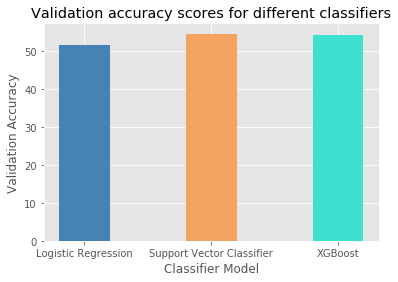

In [158]:
plt.bar(["Logistic Regression", "Support Vector Classifier", "XGBoost"], [51.56, 54.47, 54.19], width=0.4, color=['steelblue','sandybrown', 'turquoise'])
plt.xticks(rotation=0)
plt.ylabel('Validation Accuracy', size=12)
plt.xlabel('Classifier Model', size=12)
plt.title('Validation accuracy scores for different classifiers')

Text(0.5, 1.0, 'Test accuracy scores for different classifiers')

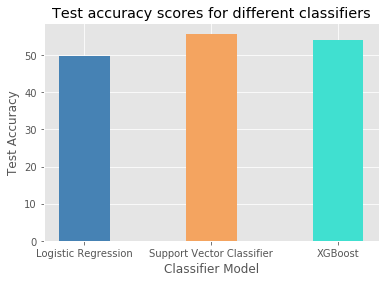

In [159]:
plt.bar(["Logistic Regression", "Support Vector Classifier", "XGBoost"], [49.71, 55.75, 54.19], width=0.4, color=['steelblue','sandybrown', 'turquoise'])
plt.xticks(rotation=0)
plt.ylabel('Test Accuracy', size=12)
plt.xlabel('Classifier Model', size=12)
plt.title('Test accuracy scores for different classifiers')

We can see that the two best performing models are the SVC and XGBoost models with an accuracy of over 54% on both validation and testing sets. 

These accuracy scores are close to the Bookies accuracy but our goal is to "Beat the bookies". That is why we need to use some sort of cross validation in order to boost our accuracy. 

This is done by importing `GridSearchCV`. GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter. 

`make_scorer` is a function wraps scoring functions for use in `GridSearchCV`. It takes a score function, such as `accuracy_score` and returns a callable that scores an estimator’s output.

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Now, we initialise the SVC and XGBoost classifiers again and run the `make_scorer` function on it. This function is used as a parameter to GridSearchCV.

In [161]:
# Initialize XGBoost classifier
clf_xgb = xgb.XGBClassifier()
clf_svc = SVC(kernel='rbf', gamma='auto')

# Make an f1 scoring function
f1_scorer = make_scorer(f1_score, average='micro')

We then use a parameters list for GridSearchCV:

In [162]:
# Parameters list for GridSearchCV
parameters = { 'learning_rate' : [0.03],
               'n_estimators' : [20],
               'max_depth': [5],
               'min_child_weight': [5],
               'gamma':[0.2],
               'subsample':[0.8],
               'colsample_bytree':[0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-2]
             }

And we perform grid search on the classifiers and fit these objects to our data to find the optimal parameters.

In [163]:
# Perform grid search on the classifiers using f1_scorer
grid_obj_xgb = GridSearchCV(clf_xgb,
                        scoring = f1_scorer,
                        param_grid = parameters,
                        cv=5)

grid_obj_svc = GridSearchCV(clf_svc,
                        scoring = f1_scorer,
                        param_grid = {'kernel': ['rbf']},
                        cv=5)

# Fit the grid search objects to the overall data and find the optimal parameters
grid_obj_xgb = grid_obj_xgb.fit(X_all,y_all)
grid_obj_svc = grid_obj_svc.fit(X_all,y_all)

We can now use the `best_estimator` feature of our Grid search object to automatically find the best parameters for the estimator. This attribute is an instance of the specified model type, which has the 'best' combination of given parameters from the `param_grid`. 

In [164]:
# Get the estimators
clf_xgb = grid_obj_xgb.best_estimator_
clf_svc = grid_obj_svc.best_estimator_

In [165]:
clf_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

As can be seen above, the best estimator is an XGBClassifier with the above parameters.

In [166]:
clf_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

And this is the best estimator for the SVC model.

We can finally run a these two newly obtained models on our validation and testing set and record the obtained f1 and accuracy scores:

XGB Best Estimator on Validation Set:

In [167]:
train_predict(clf_xgb, X_train, y_train, X_validation, y_validation)

F1 score and accuracy score: 0.5439 , 0.5439.


XGB Best Estimator on Test Set:

In [168]:
train_predict(clf_xgb, X_train, y_train, X_test, y_test)

F1 score and accuracy score: 0.5585 , 0.5585.


SVC Best Estimator on Validation Set:

In [169]:
train_predict(clf_svc, X_train, y_train, X_validation, y_validation)

F1 score and accuracy score: 0.5448 , 0.5448.


SVC Best Estimator on Test Set:

In [170]:
train_predict(clf_svc, X_train, y_train, X_test, y_test)

F1 score and accuracy score: 0.5575 , 0.5575.


We can now make a comparison between the accuracies on the test data between the models before and after GridSearchCV.

Text(0.5, 1.0, 'Test accuracy scores for different classifiers')

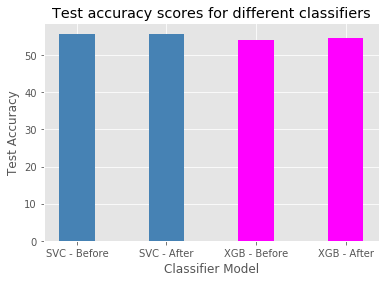

In [171]:
plt.bar(["SVC - Before", "SVC - After", "XGB - Before", "XGB - After"], [55.75, 55.75, 54.19 ,54.48], width=0.4, color=['steelblue','steelblue', 'magenta', 'magenta'])
plt.xticks(rotation=0)
plt.ylabel('Test Accuracy', size=12)
plt.xlabel('Classifier Model', size=12)
plt.title('Test accuracy scores for different classifiers')

We can see that we are able to boost accuracy of our XGBoos model from 54.19% to 54.48%. Our best performing model is thus our optimal SVC classifier with a test accuracy of 55.75% which represents a really good accuracy for the type of predictions we are trying to make. We can then safely say that we beat the bookies :)

### _7. Final predictions on prediction set_
----------------------
Having found the optimal prediction model, we can now make predictions on our testing data. This represents predictions on the matches of the weekend of the 12th of January 2019. We were able to "Beat the Bookie"!

In [172]:
# Makes final predictions using classifier
predictions = clf_svc.predict(prediction_data)

predictions

array(['A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A'], dtype=object)

We can now concatenate these results to the testing csv file: 

We start by importing the csv file again into a dataframe:

In [173]:
# Import submission file with matches list
EPL_test = pd.read_csv("Data/epl-test.csv")

We then create a new Full Time Result ("FTR") column to the dataframe with the predictions as data.

In [174]:
# Adds full time result prediction column
EPL_test["FTR"] = predictions
EPL_test

,Date,HomeTeam,AwayTeam,FTR
0,12 Jan 19,Brighton,Liverpool,A
1,12 Jan 19,Burnley,Fulham,H
2,12 Jan 19,Cardiff,Huddersfield,H
3,12 Jan 19,Chelsea,Newcastle,H
4,12 Jan 19,Crystal Palace,Watford,H
5,12 Jan 19,Everton,Bournemouth,H
6,12 Jan 19,Leicester,Southampton,H
7,12 Jan 19,Man City,Wolves,H
8,12 Jan 19,Tottenham,Man United,H
9,12 Jan 19,West Ham,Arsenal,A


We can finally export the obtained results to a csv file and start betting money on these matches :)

In [175]:
# Export test file with predictions to csv
EPL_test.to_csv("final-predictions.csv", index=False)

### _8. References_
----------------------
The references include all websites / documentations consulted.

- Football Data UK: http://www.football-data.co.uk/englandm.php
- Premier League: https://www.premierleague.com/
- Pandas documentation: http://pandas.pydata.org/
- Scikit Learn documentation: https://scikit-learn.org/stable/index.html
- Siraj Raval Github https://github.com/llSourcell/Predicting_Winning_Teams